# <font color='#197D75'> PARTE I </font>

## <font color='#197D75'>  Consigna </font>

Tienes un compañero de MD004 que afirma que puede predecir la nota final de la asignatura en función del tiempo que pasa jugando a videojuegos. Decides ponerlo a prueba y le preguntas por la ecuación de regresión que usaría para hacer la predicción. Te responde inmediatamente que un modelo de regresión lineal simple. Ahora, ¿Cómo comprobarías si realmente comprende el modelo poniendo a prueba su conocimiento sobre regresión lineal simple? (1pt)

Finalmente desafías a tu compañero a mejorar su modelo y le pides que considere agregar otra variable predictora: "la cantidad de horas dedicadas al estudio". ¿Qué argumentos en contra o a favor te podría dar? ¿Cómo podrías evaluar si la nueva variable realmente mejora la capacidad predictiva del modelo? (1pt)

## <font color='#197D75'>  Ejercicio Parte I </font>

Lo primero que le diria es si conoce el dominio de su base de datos, cual es la distribucion de su variable dependiente y de su variable independiente, si la misma es simetrica o asimetrica, si tiene una buena registracion en los datos, es decir, si hay presencia de variables NULLS y si hay presencia de outsiders.

Luego, le preguntaria es si conoce si existe una relacion lineal entre ambas variables. Si me responde que no sabe le diria que debe hacer un analisis de correlacion en conjunto con el test de Pearson. Luego de eso le explicaria respecto lo dificil que una variable pueda predecir de manera exacta el comportamiento de otra, generalmente, las variables que determinan la nota final en el curso suelen ser muchos mas que la cantidad de horas que uno se pasa jugando videojuegos. Por ejemplo, en mi caso, no juego videojuegos, con lo cual en principio si observa mis notas y mis horas jugadas no encontrara ningun tipo de relacion entre ambas variables. Yo puedo no ser representativo para toda una poblacion, obviamente, pero ya soy un caso donde esta relacion puede no darse.S upongamos que yo no soy representativo de la sociedad en general, mi companero consigue una base de datos amplia y variada, y si tiene un tipo de correlacion entre ambas variables. 

Luego de realizar el analisis de correlacion, le diria que corra el modelo y se fije cual es el nivel de significatividad de su estimador para ver si puede continuar con su analisis o su hipotesis queda descartada de entrada.

Ademas, le comentaria respecto a las fuentes de sesgo y de impresision que puede tener un indicador de MCO

**<font color='#197D75'>  Fuente de sesgo: </font>** Omision de variables relevantes para nuestro modelo puede sesgar los estimadores incluidos. Esto depende de dos parametros δ21≠0 y β2≠0. Es decir, que haya un impacto de la variable omitida sobre la variable dependiente (β2≠0), y que haya una correlacion entre la variable omitida y alguna de las variables independientes incluidas en nuestro modelo (δ21≠0). Con lo cual, excluir variables relevantes representa un sesgo potencial de nuestros estimadores, el mismo sera efectivo si δ21≠0 y β2≠0. Basta con que al menos una de estas dos condiciones no se cumplan para que no representen un sesgo efectivo en nuestros estimadores (δ21=0 o β2=0). 

**<font color='#197D75'>  Fuente de impresision: </font>** La inclusion de variables irrelevantes o con bajo nivel de relevancia en el modelo nos pueden aportar una fuente de impresision en la varianza del estimador, volviendo mas impresiso el mismo.

Con lo cual debemos llevar a cabo un analisis minusios que nos permita incluir todas las variables relevantes para el modelo sin caer en el error de incluir todas las variables, ya que esto aporta un sesgo en la varianza de nuestro estimador, es decir, su precision. Con lo cual, primero vamos a realizar un analisis de correlaciones entre variable dependiente y todas las variables independientes, para analizar cuales tienen un poder explicativo sobre nuestra variable independiente, y luego un analisis de covarianzas que nos termine identificando cual de estas variables podemos excluir de nuestro modelo para que nuestros estimadores sean insesgados. Luego haremos un analisis de correlacion entre variables independientes incluidas y variables independientes excluidas para analizar la eficiencia de nuestros estimadores, ya que agregar luego una variable previamente no incluida por estar libre de sesgo nos puede aportar una mayor eficiencia sin repercutir en la precision de nuestro estimador.


Supongamos que el estimador de su variable independiente es significativo e insesgado, si quiere predecir la nota le diria que debe hacer varias cosas antes. En primer lugar debe dividir su BBDD en dos, una parte para entrenar el modelo y otra parte para testearlo. Debe correr el modelo lineal con su variable dependiente e independiente. Debe comprobar que los supuestos clasicos respecto a su residuo se cumplan (normalidad, autocorrelacion y homocedasticidad), y por fin, podra obtener un resultado estadisticamente confiable respecto a su hipotesis inicial de que las horas de videojuego pueden predecir las notas finales del curso. Esto lo hara mirando su R2, el RMAE y el MAE. El R2, es el coeficiente de determinacion de nuestro modelo, y nos dira la capacidad que tiene el mismo en predecir la variable dependiente en base a datos observados de la variable independiente, con lo cual intentaremos que este sea lo mas cercano a 1 posible. El RMSE es el error cuadratico medio de nuestro modelo, el objetivo es minimizar su valor para mejorar la precision del modelo. El MAE nos sirve para obtener la presicion ante la presencia de outsiders en nuestra base de datos, tambien apunta a la presicion de nuestro modelo, tambien buscaremos que este valor sea lo menor posible.

# <font color='#197D75'>  PARTE II </font>

## <font color='#197D75'>  INTRODUCCION </font>

Se dispone de un dataset que contiene en formato csv datos de la población de Estados Unidos con el objetivo de generar un modelo de regresión lineal simple para predecir las tasas de mortalidad por cáncer (target_deathrate) en los condados de los Estados Unidos

Data: 202311_04_cancer_reg.cside:

## <font color='#197D75'>  1. CARGA DE DATOS </font>

1. Exploración de los datos: análisis descriptivos de los datos y graficación comentando los resultados obtenidos(3pts)
2. Análisis descriptivo de la variable objetivo (métricas+gráficos) comentando los resultados
3. Análisis descriptivo de las variables explicativas (métricas+gráficos) comentando los resultados
4. Análisis bivariante entre la variable objetivo vs variable explicativa, escoged las 2 variables que a priori se observe que mejor ajustarían en un modelo de regresión lineal y justificad el porqué

### <font color='#197D75'>  CARGAMOS LAS LIBRERIAS </font>

In [72]:
library(olsrr)
library(tidyverse)
library(caret)
library(gridExtra)
library(broom)
library(dplyr)
library(Metrics)
library(ggplot2)
library(reshape2)
library(corrplot)
library(patchwork)
library(lmtest)

### <font color='#197D75'>  CARGAMOS LOS DATOS </font>

In [2]:
data = read.csv(file='202311_04_cancer_reg.csv', header=TRUE, sep=',', dec='.')
str(data)

'data.frame':	3047 obs. of  33 variables:
 $ avganncount            : num  1397 173 102 427 57 ...
 $ avgdeathsperyear       : int  469 70 50 202 26 152 97 71 36 1380 ...
 $ target_deathrate       : num  165 161 175 195 144 ...
 $ incidencerate          : num  490 412 350 430 350 ...
 $ medincome              : int  61898 48127 49348 44243 49955 52313 37782 40189 42579 60397 ...
 $ popest2015             : int  260131 43269 21026 75882 10321 61023 41516 20848 13088 843954 ...
 $ povertypercent         : num  11.2 18.6 14.6 17.1 12.5 15.6 23.2 17.8 22.3 13.1 ...
 $ studypercap            : num  499.7 23.1 47.6 342.6 0 ...
 $ binnedinc              : chr  "(61494.5, 125635]" "(48021.6, 51046.4]" "(48021.6, 51046.4]" "(42724.4, 45201]" ...
 $ medianage              : num  39.3 33 45 42.8 48.3 45.4 42.6 51.7 49.3 35.8 ...
 $ medianagemale          : num  36.9 32.2 44 42.2 47.8 43.5 42.2 50.8 48.4 34.7 ...
 $ medianagefemale        : num  41.7 33.7 45.8 43.4 48.9 48 43.5 52.5 49.8 37 ...
 $

### <font color='#197D75'>  Analisis de dominio </font>
En primer lugar necesitamos tener un estudio general de que representa nuestro modelo, observar con que variables contamos y que queremos construir con ellas. Es por esta razon, que un buen entendimiento del dominio nos va a guiar a un correcto modelado. En nuestro dataset tenemos 32 variables, de las cuales 2 son variables categoricas. Estas dos variables nos van a permitir generar, como maximo, n^2 modelos de estimacion distintos. La primer variable categorica que observamos es "geography", la cual nos indica el nombre del condado al cual pertenece dicha observacion. La segunda variable categorica es "binnedinc", la cual representa la media de la renta per cápita agrupada por decil. Con lo cual, tenemos 3.047 condados con 10 deciles de ingresos por cada uno, como maximo obtendremos la posibilidad de estimar 30.470 modelos distintos (no por condado, uno por decil). El resto de las 30 variables nos ayudaran a estimar cada modelo. Obviamente, podriamos obviar ambas variables, o al menos una de ellas, para achicar nuestra estimacion y realizarla de manera global para toda la poblacion de Estados Unidos. Para poder hacer esto, debemos ver como se comporta cada variable dentro de cada sub-grupo. En funcion de simplificar nuestro modelo, vamos a utilizar unicamente las variables no categoricas para dicho analisis. Al ser un grupo tan diverso, que puede comportarse de diferentes maneras dentro de cada combinacion, vamos a buscar como es su distribucion y cuales son sus outliers. Ahora si podemos pasar a hacer un analisis de dominio:

In [3]:
data2 <- subset(data, select = c(!colnames(data) %in% c("geography", "binnedinc")))
summary(data2)

  avganncount      avgdeathsperyear target_deathrate incidencerate   
 Min.   :    6.0   Min.   :    3    Min.   : 59.7    Min.   : 201.3  
 1st Qu.:   76.0   1st Qu.:   28    1st Qu.:161.2    1st Qu.: 420.3  
 Median :  171.0   Median :   61    Median :178.1    Median : 453.5  
 Mean   :  606.3   Mean   :  186    Mean   :178.7    Mean   : 448.3  
 3rd Qu.:  518.0   3rd Qu.:  149    3rd Qu.:195.2    3rd Qu.: 480.9  
 Max.   :38150.0   Max.   :14010    Max.   :362.8    Max.   :1206.9  
                                                                     
   medincome        popest2015       povertypercent   studypercap     
 Min.   : 22640   Min.   :     827   Min.   : 3.20   Min.   :   0.00  
 1st Qu.: 38883   1st Qu.:   11684   1st Qu.:12.15   1st Qu.:   0.00  
 Median : 45207   Median :   26643   Median :15.90   Median :   0.00  
 Mean   : 47063   Mean   :  102637   Mean   :16.88   Mean   : 155.40  
 3rd Qu.: 52492   3rd Qu.:   68671   3rd Qu.:20.40   3rd Qu.:  83.65  
 Max.   :12563

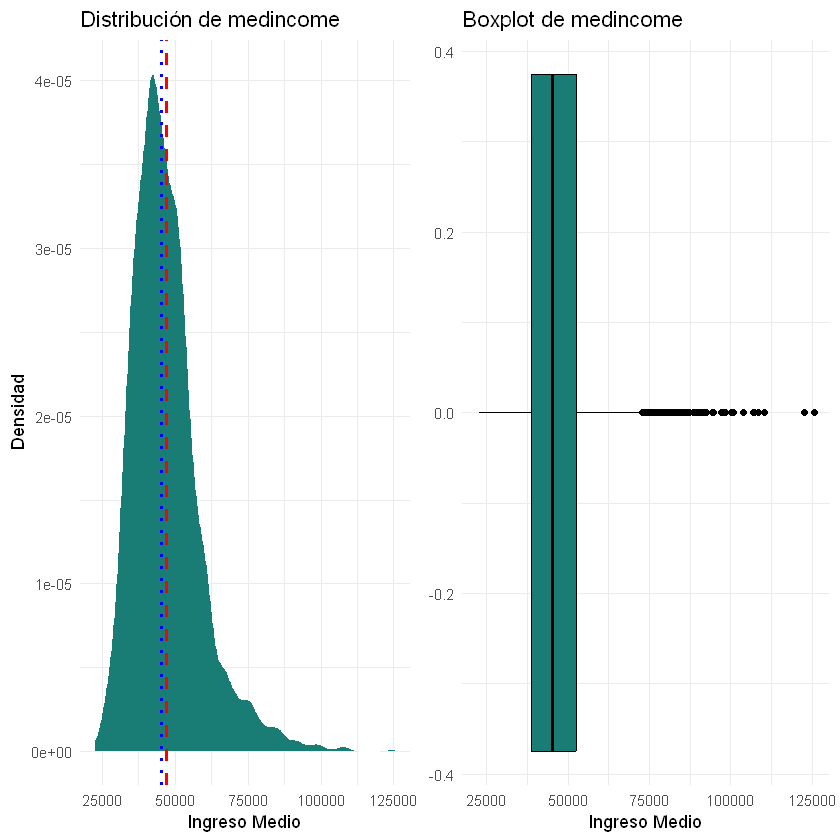

In [8]:
# Calcular la media y la mediana
media <- mean(data2$medincome)
mediana <- median(data2$medincome)

# Crear un gráfico de densidad de la variable 'medincome'
a = ggplot(data2, aes(x = medincome)) +
  geom_density(fill = "#197D75", color = "white") +
  geom_vline(xintercept = media, linetype = "dashed", color = "red", size = 1) +
  geom_vline(xintercept = mediana, linetype = "dotted", color = "blue", size = 1) +
  labs(x = "Ingreso Medio", y = "Densidad", title = "Distribución de medincome") +
  theme_minimal()

b = ggplot(data2, aes(x = medincome)) +
  geom_boxplot(fill = "#197D75", color = "black") +
  labs(x = "Ingreso Medio", title = "Boxplot de medincome") +
  theme_minimal()

grid.arrange(a, b, ncol = 2)

### <font color='#197D75'>  Analisis estadistico descriptivo </font>

De este analisis obtendremos unicamente informacion estadistica respecto a nuestras variables, viendo si tienen NULLS y que forma toma su distribucion. Luego continuaremos con el analisis del diseno de nuestro modelo, el cual nos indicara cual variable debe formar parte y cual no.

In [3]:
data2 <- subset(data, select = c(!colnames(data) %in% c("geography", "binnedinc")))
summary(data2)
colnames(data2)

  avganncount      avgdeathsperyear target_deathrate incidencerate   
 Min.   :    6.0   Min.   :    3    Min.   : 59.7    Min.   : 201.3  
 1st Qu.:   76.0   1st Qu.:   28    1st Qu.:161.2    1st Qu.: 420.3  
 Median :  171.0   Median :   61    Median :178.1    Median : 453.5  
 Mean   :  606.3   Mean   :  186    Mean   :178.7    Mean   : 448.3  
 3rd Qu.:  518.0   3rd Qu.:  149    3rd Qu.:195.2    3rd Qu.: 480.9  
 Max.   :38150.0   Max.   :14010    Max.   :362.8    Max.   :1206.9  
                                                                     
   medincome        popest2015       povertypercent   studypercap     
 Min.   : 22640   Min.   :     827   Min.   : 3.20   Min.   :   0.00  
 1st Qu.: 38883   1st Qu.:   11684   1st Qu.:12.15   1st Qu.:   0.00  
 Median : 45207   Median :   26643   Median :15.90   Median :   0.00  
 Mean   : 47063   Mean   :  102637   Mean   :16.88   Mean   : 155.40  
 3rd Qu.: 52492   3rd Qu.:   68671   3rd Qu.:20.40   3rd Qu.:  83.65  
 Max.   :12563

[1] "avganncount"             "avgdeathsperyear"       
 [3] "target_deathrate"        "incidencerate"          
 [5] "medincome"               "popest2015"             
 [7] "povertypercent"          "studypercap"            
 [9] "medianage"               "medianagemale"          
[11] "medianagefemale"         "percentmarried"         
[13] "pctnohs18_24"            "pcths18_24"             
[15] "pctsomecol18_24"         "pctbachdeg18_24"        
[17] "pcths25_over"            "pctbachdeg25_over"      
[19] "pctemployed16_over"      "pctunemployed16_over"   
[21] "pctprivatecoverage"      "pctprivatecoveragealone"
[23] "pctempprivcoverage"      "pctpubliccoverage"      
[25] "pctpubliccoveragealone"  "pctwhite"               
[27] "pctblack"                "pctasian"               
[29] "pctotherrace"            "pctmarriedhouseholds"   
[31] "birthrate"

### <font color='#197D75'>  Variable dependiente </font>

El ejercicio pide utiizar al target_deathrate como variable explicada,. Hagamos un analisis grafico de esta variable.

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


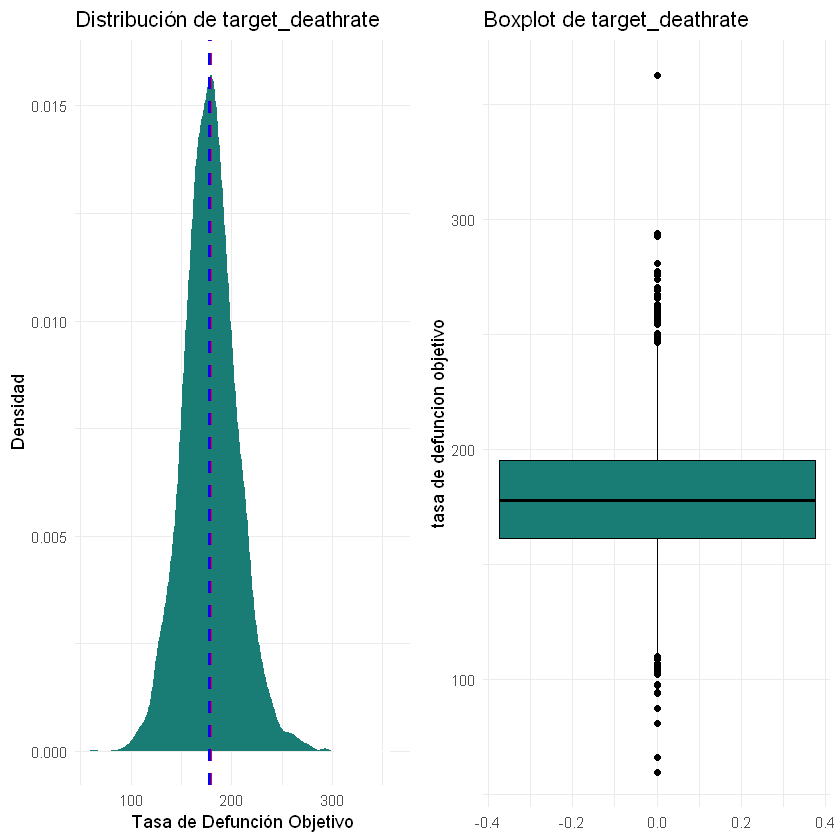

In [4]:
# Calcular la media y la mediana de target_deathrate
media <- mean(data2$target_deathrate)
mediana <- median(data2$target_deathrate)

# Analisis de target_deathrate
plot1 <- ggplot(data2, aes(x = target_deathrate)) +
  geom_density(fill = "#197D75", color = "white") +
  geom_vline(xintercept = media, linetype = "dashed", color = "red", size = 1) +  # Línea para la media
  geom_vline(xintercept = mediana, linetype = "dashed", color = "blue", size = 1) +  # Línea para la mediana
  labs(x = "Tasa de Defunción Objetivo", y = "Densidad", title = "Distribución de target_deathrate") +
  theme_minimal()

plot2 <- ggplot(data2, aes(x = target_deathrate)) +
  geom_boxplot(fill = "#197D75", color = "black") +
  labs(x = "tasa de defuncion objetivo", title = "Boxplot de target_deathrate") +
  theme_minimal() +
  coord_flip()

# Imprimir los gráficos en paralelo
grid.arrange(plot1, plot2, ncol = 2)

####

Lo que estamos observando es una distribución de datos bastante similar a una distribución normal. Como esperábamos, notamos una densidad de datos muy alta en el segundo y tercer cuartil. Sin embargo, al analizar el boxplot, podemos identificar la presencia de numerosos valores atípicos. Si observamos detenidamente, notaremos muchos puntos fuera de la caja central del gráfico, que el sistema predeterminado identifica como valores atípicos.

### <font color='#197D75'>  Variables independientes </font>

De este analisis descriptivo obtendremos variables candidatas a incluir en el modelo.

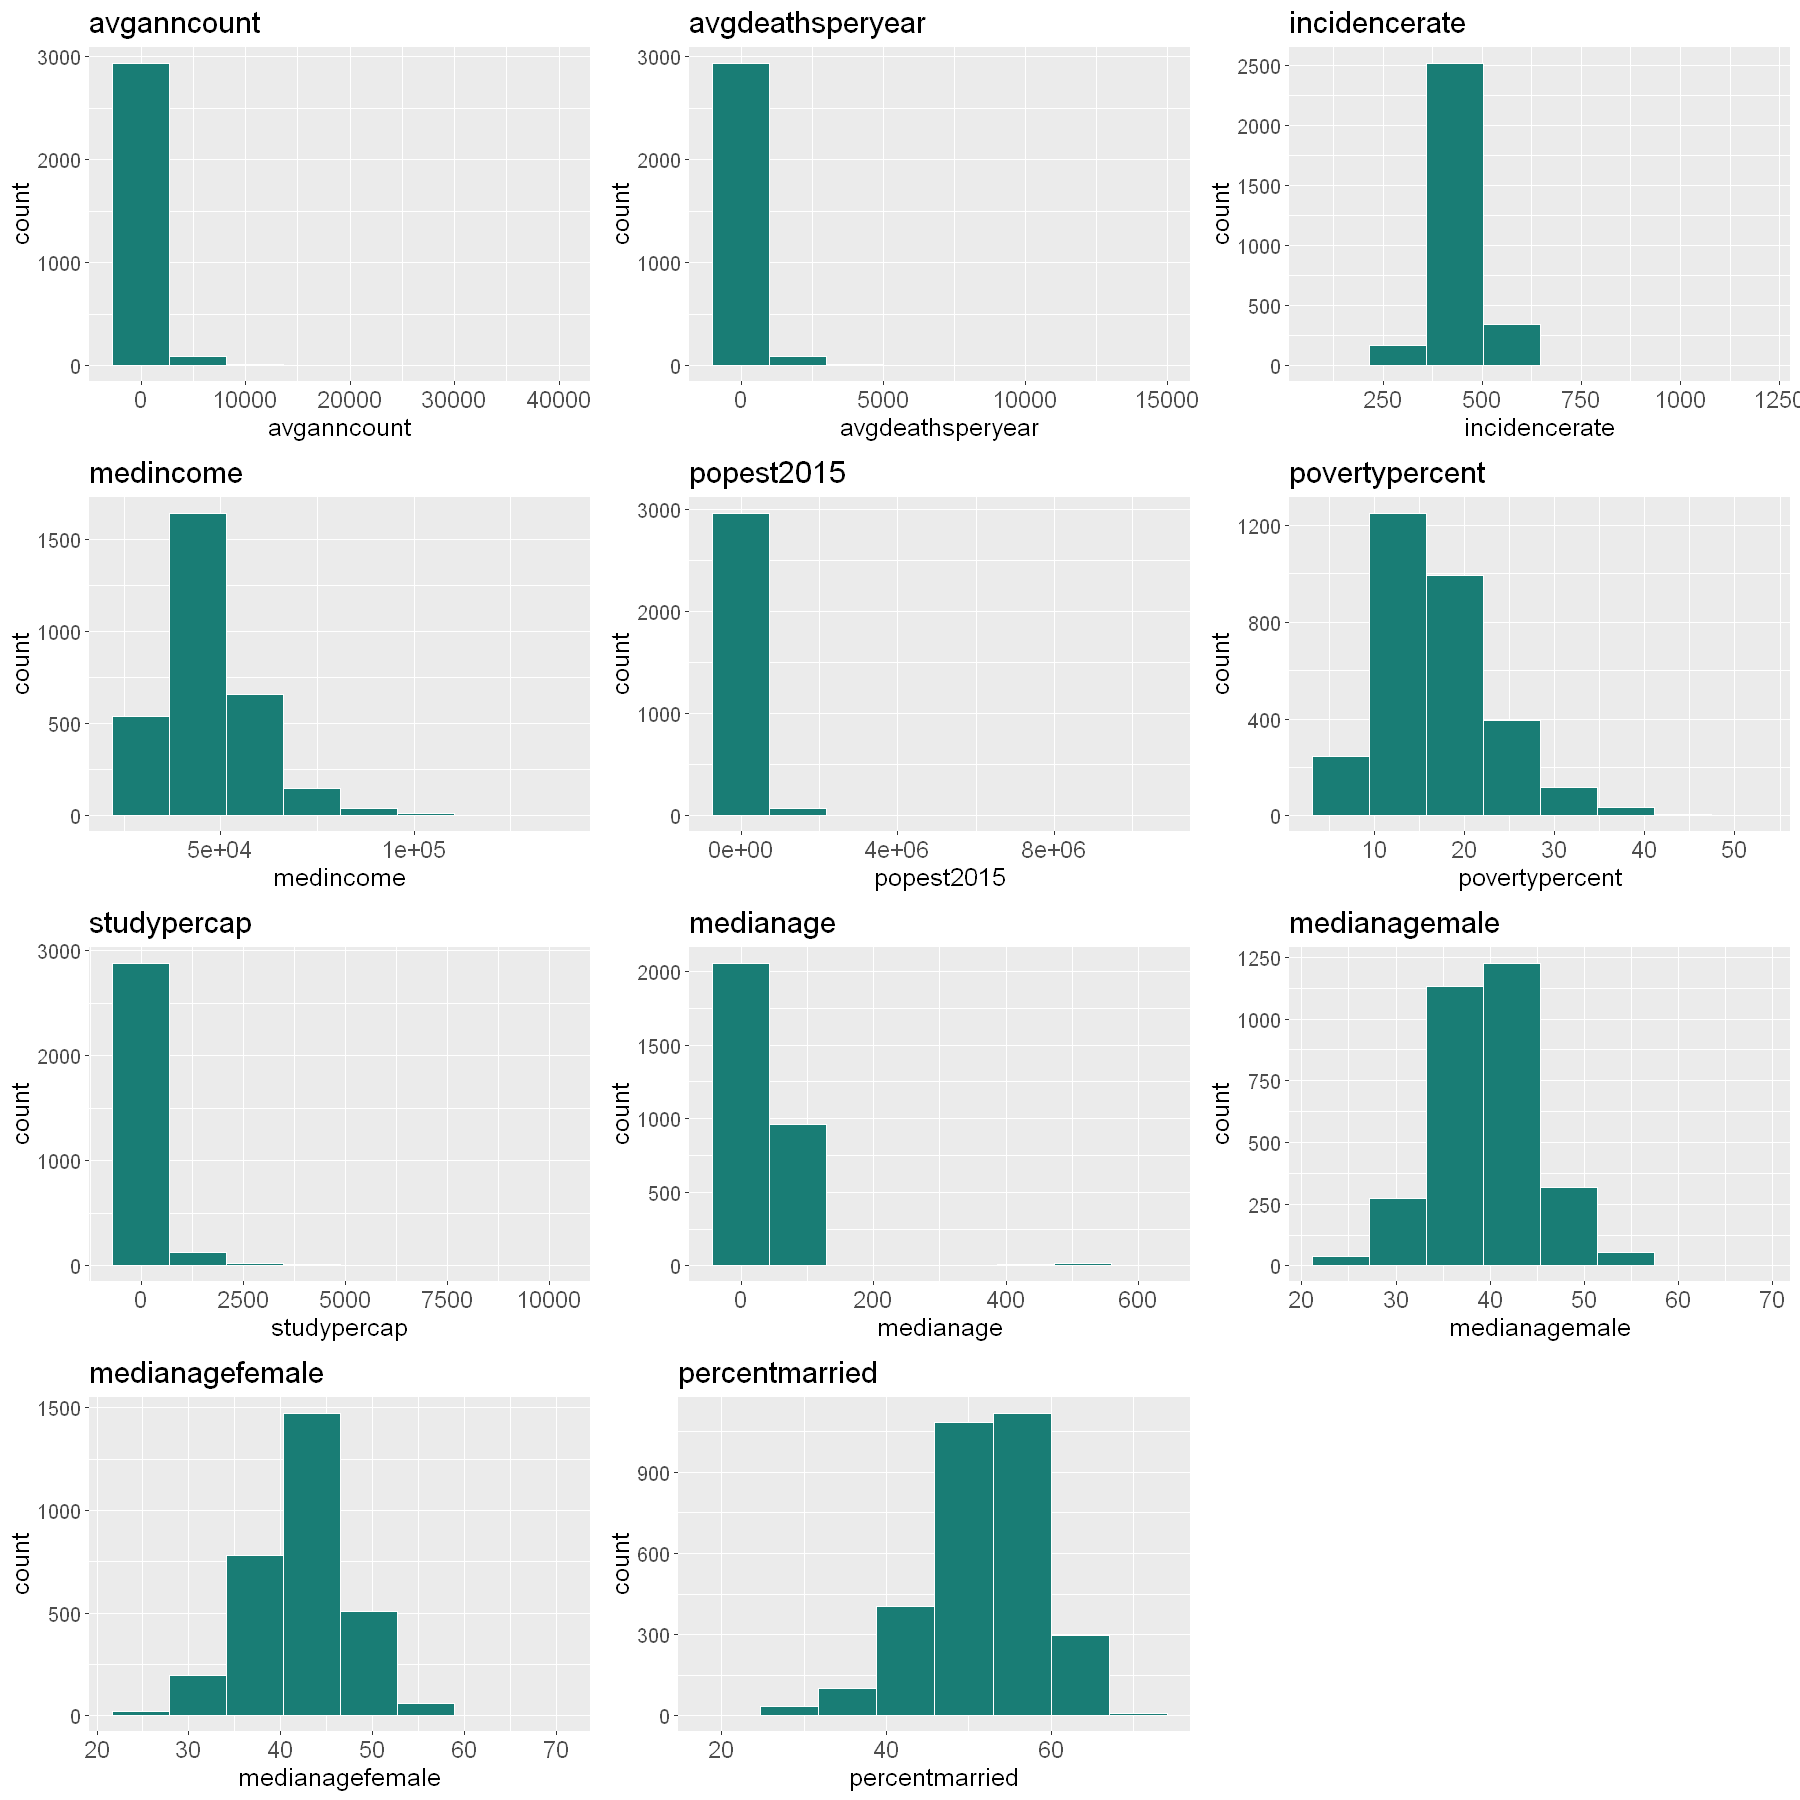

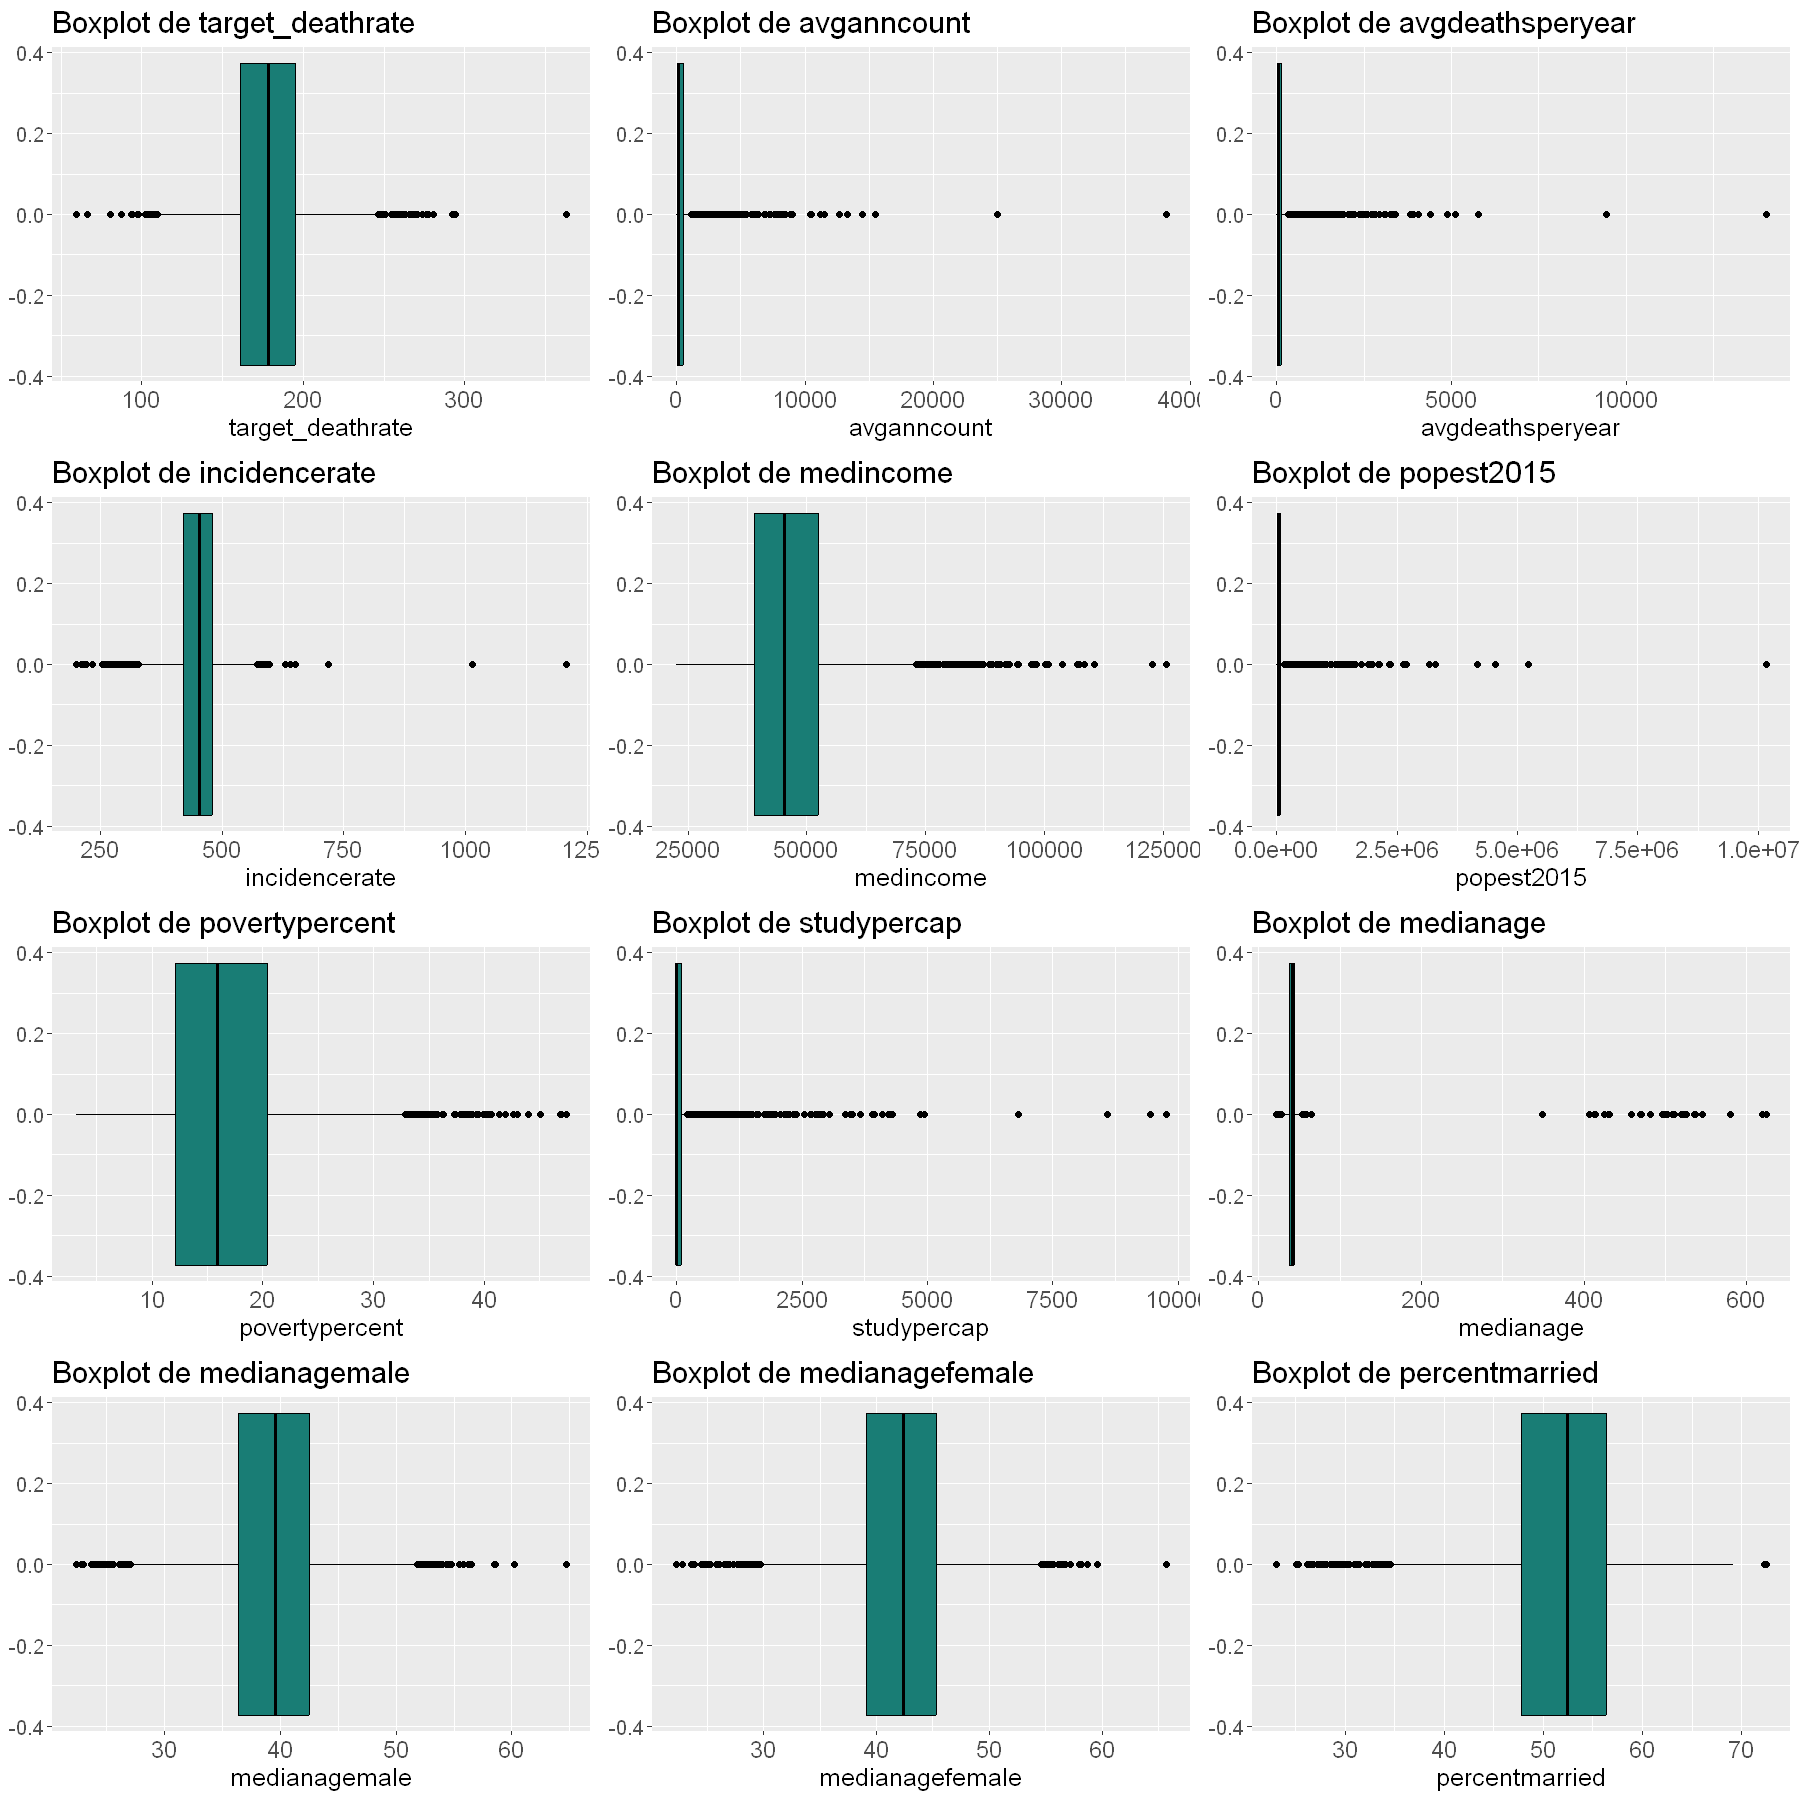

In [7]:
graficos_histograma = list()
variables <- c('avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome', 'popest2015', 'povertypercent', 'studypercap', 'medianage', 'medianagemale', 'medianagefemale', 'percentmarried')
subconjunto_data2 <- data2[, variables, drop = FALSE]

for (variable in names(subconjunto_data2)) {
  grafico = ggplot(subconjunto_data2) +
    aes_string(x = variable) +
    geom_histogram(bins = 8, fill = '#197D75', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste(variable))
  
  graficos_histograma[[length(graficos_histograma) + 1]] <- grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 15  
)

# Mostrar los histogramas en un grid
do.call('grid.arrange', c(graficos_histograma, ncol = 3))

graficos_boxplot = list()
variables <- c('target_deathrate', 'avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome', 'popest2015', 'povertypercent', 'studypercap', 'medianage', 'medianagemale', 'medianagefemale', 'percentmarried')
subconjunto_data2 <- data2[, variables, drop = FALSE]

for (variable in names(subconjunto_data2)) {
  grafico = ggplot(subconjunto_data2) +
    aes_string(y = variable) +
    geom_boxplot(fill = '#197D75', color = 'black') +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste("Boxplot de", variable))+
    coord_flip()
  
  graficos_boxplot[[length(graficos_boxplot) + 1]] <- grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 15  
)

# Mostrar los boxplots en un grid
do.call('grid.arrange', c(graficos_boxplot, ncol = 3))

Warning message:
"Removed 2285 rows containing non-finite values (`stat_boxplot()`)."
Warning message:
"Removed 152 rows containing non-finite values (`stat_boxplot()`)."
Warning message:
"Removed 609 rows containing non-finite values (`stat_boxplot()`)."


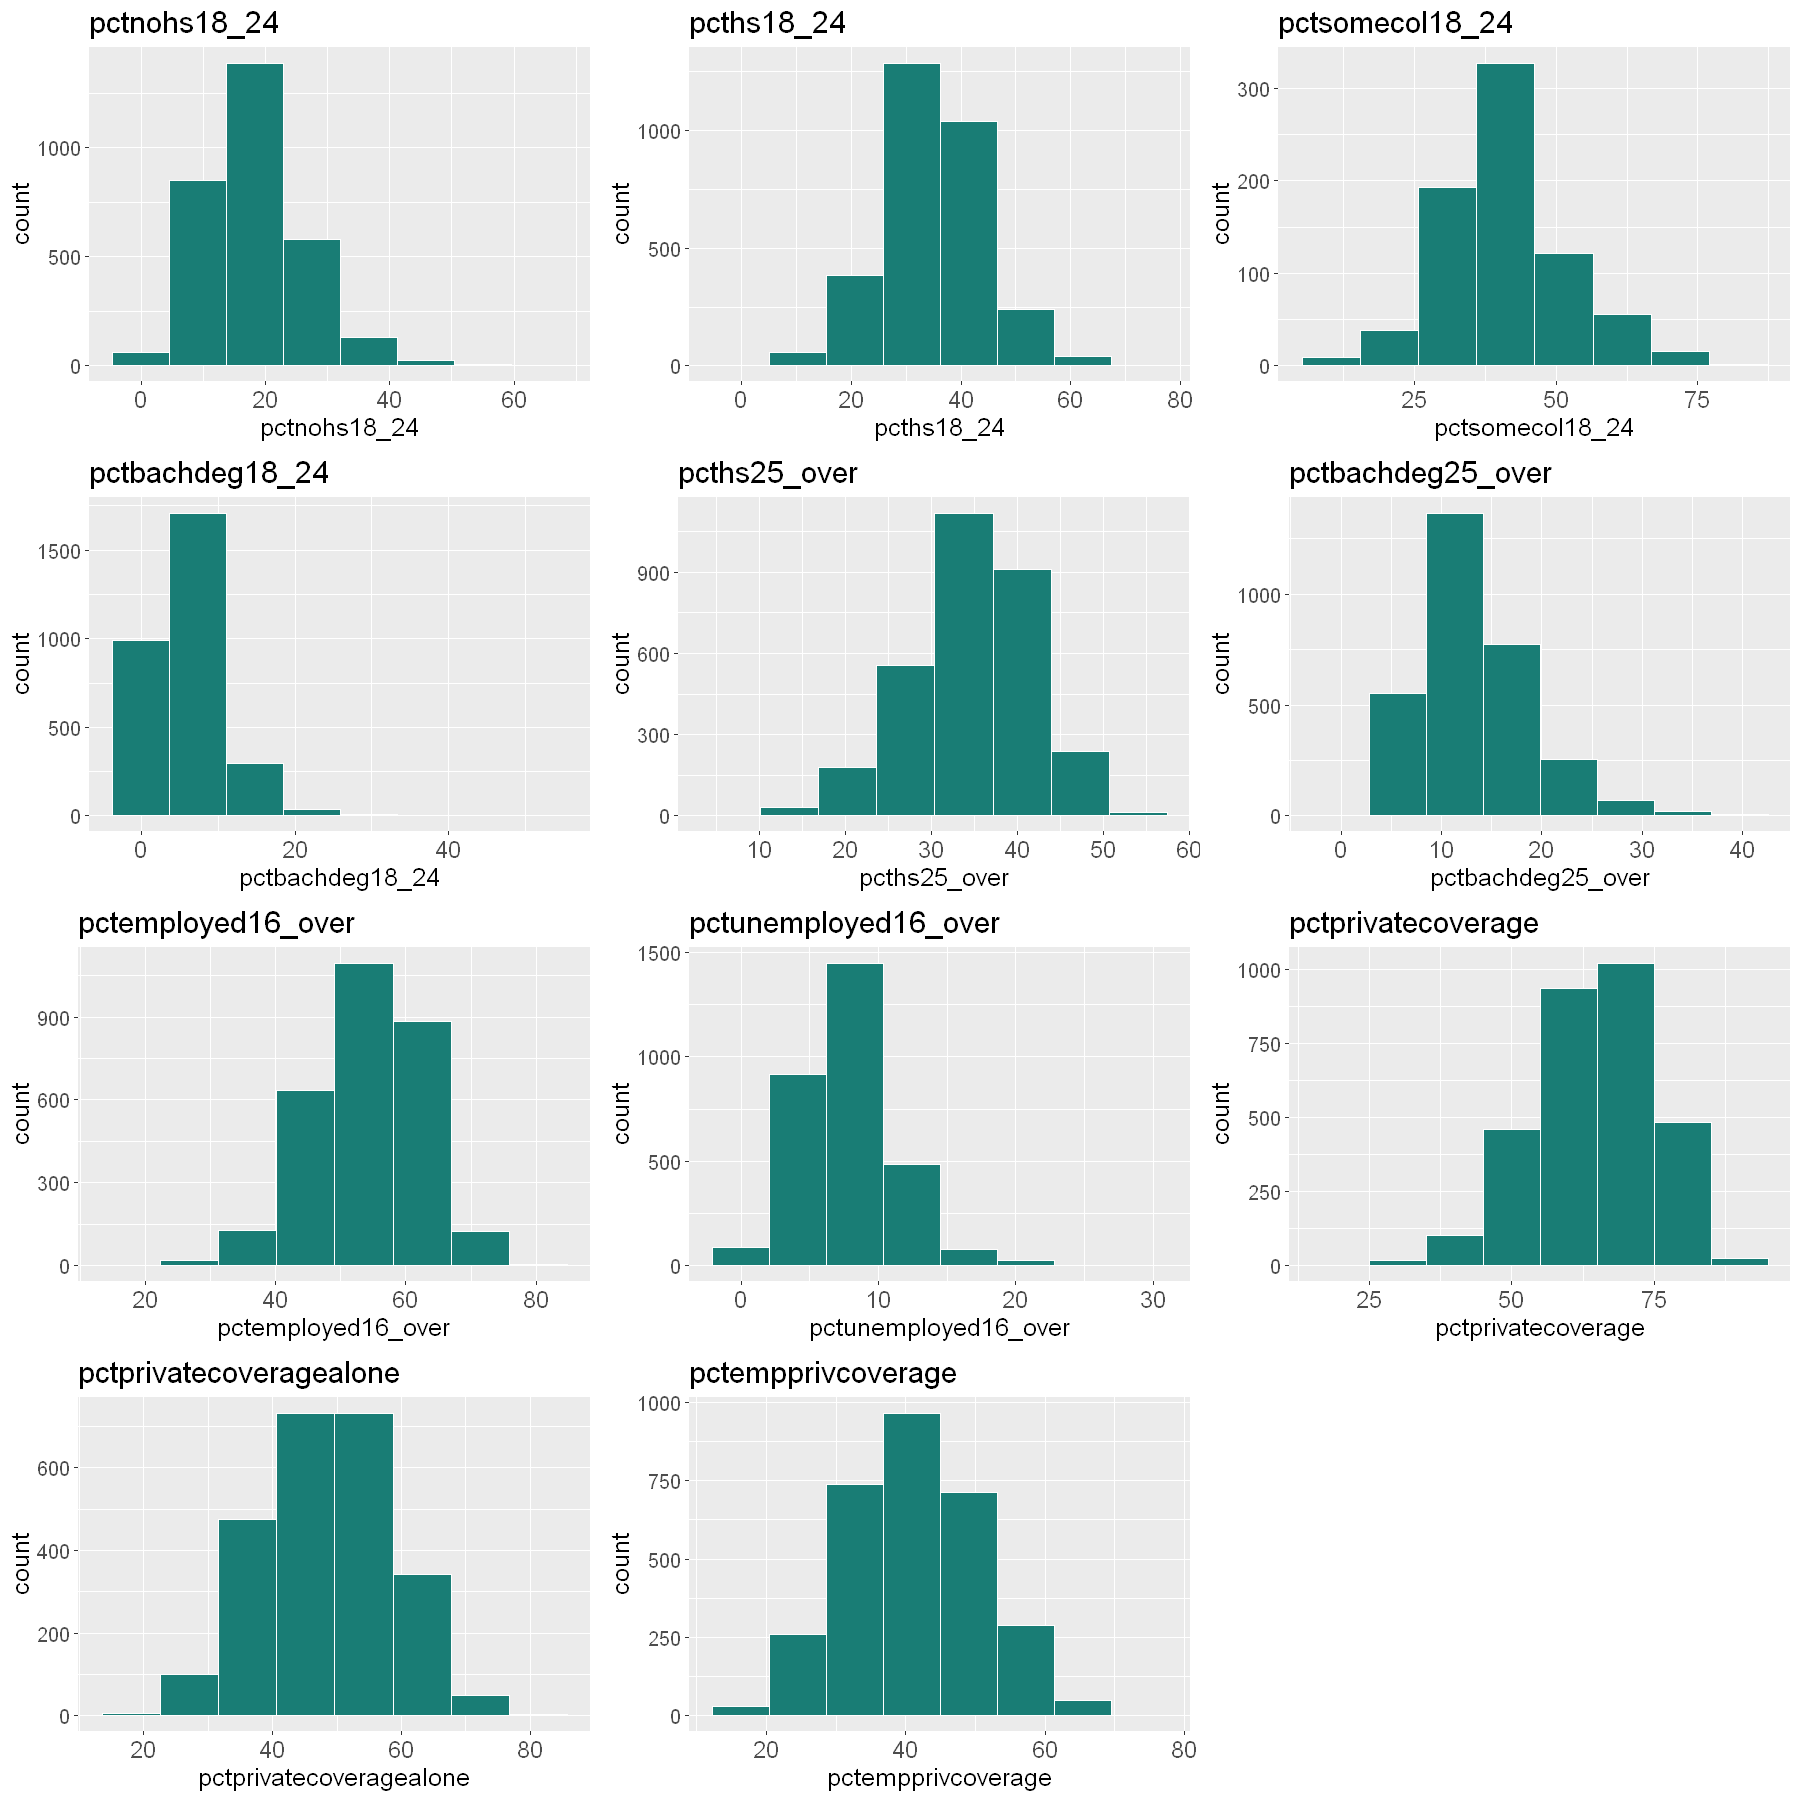

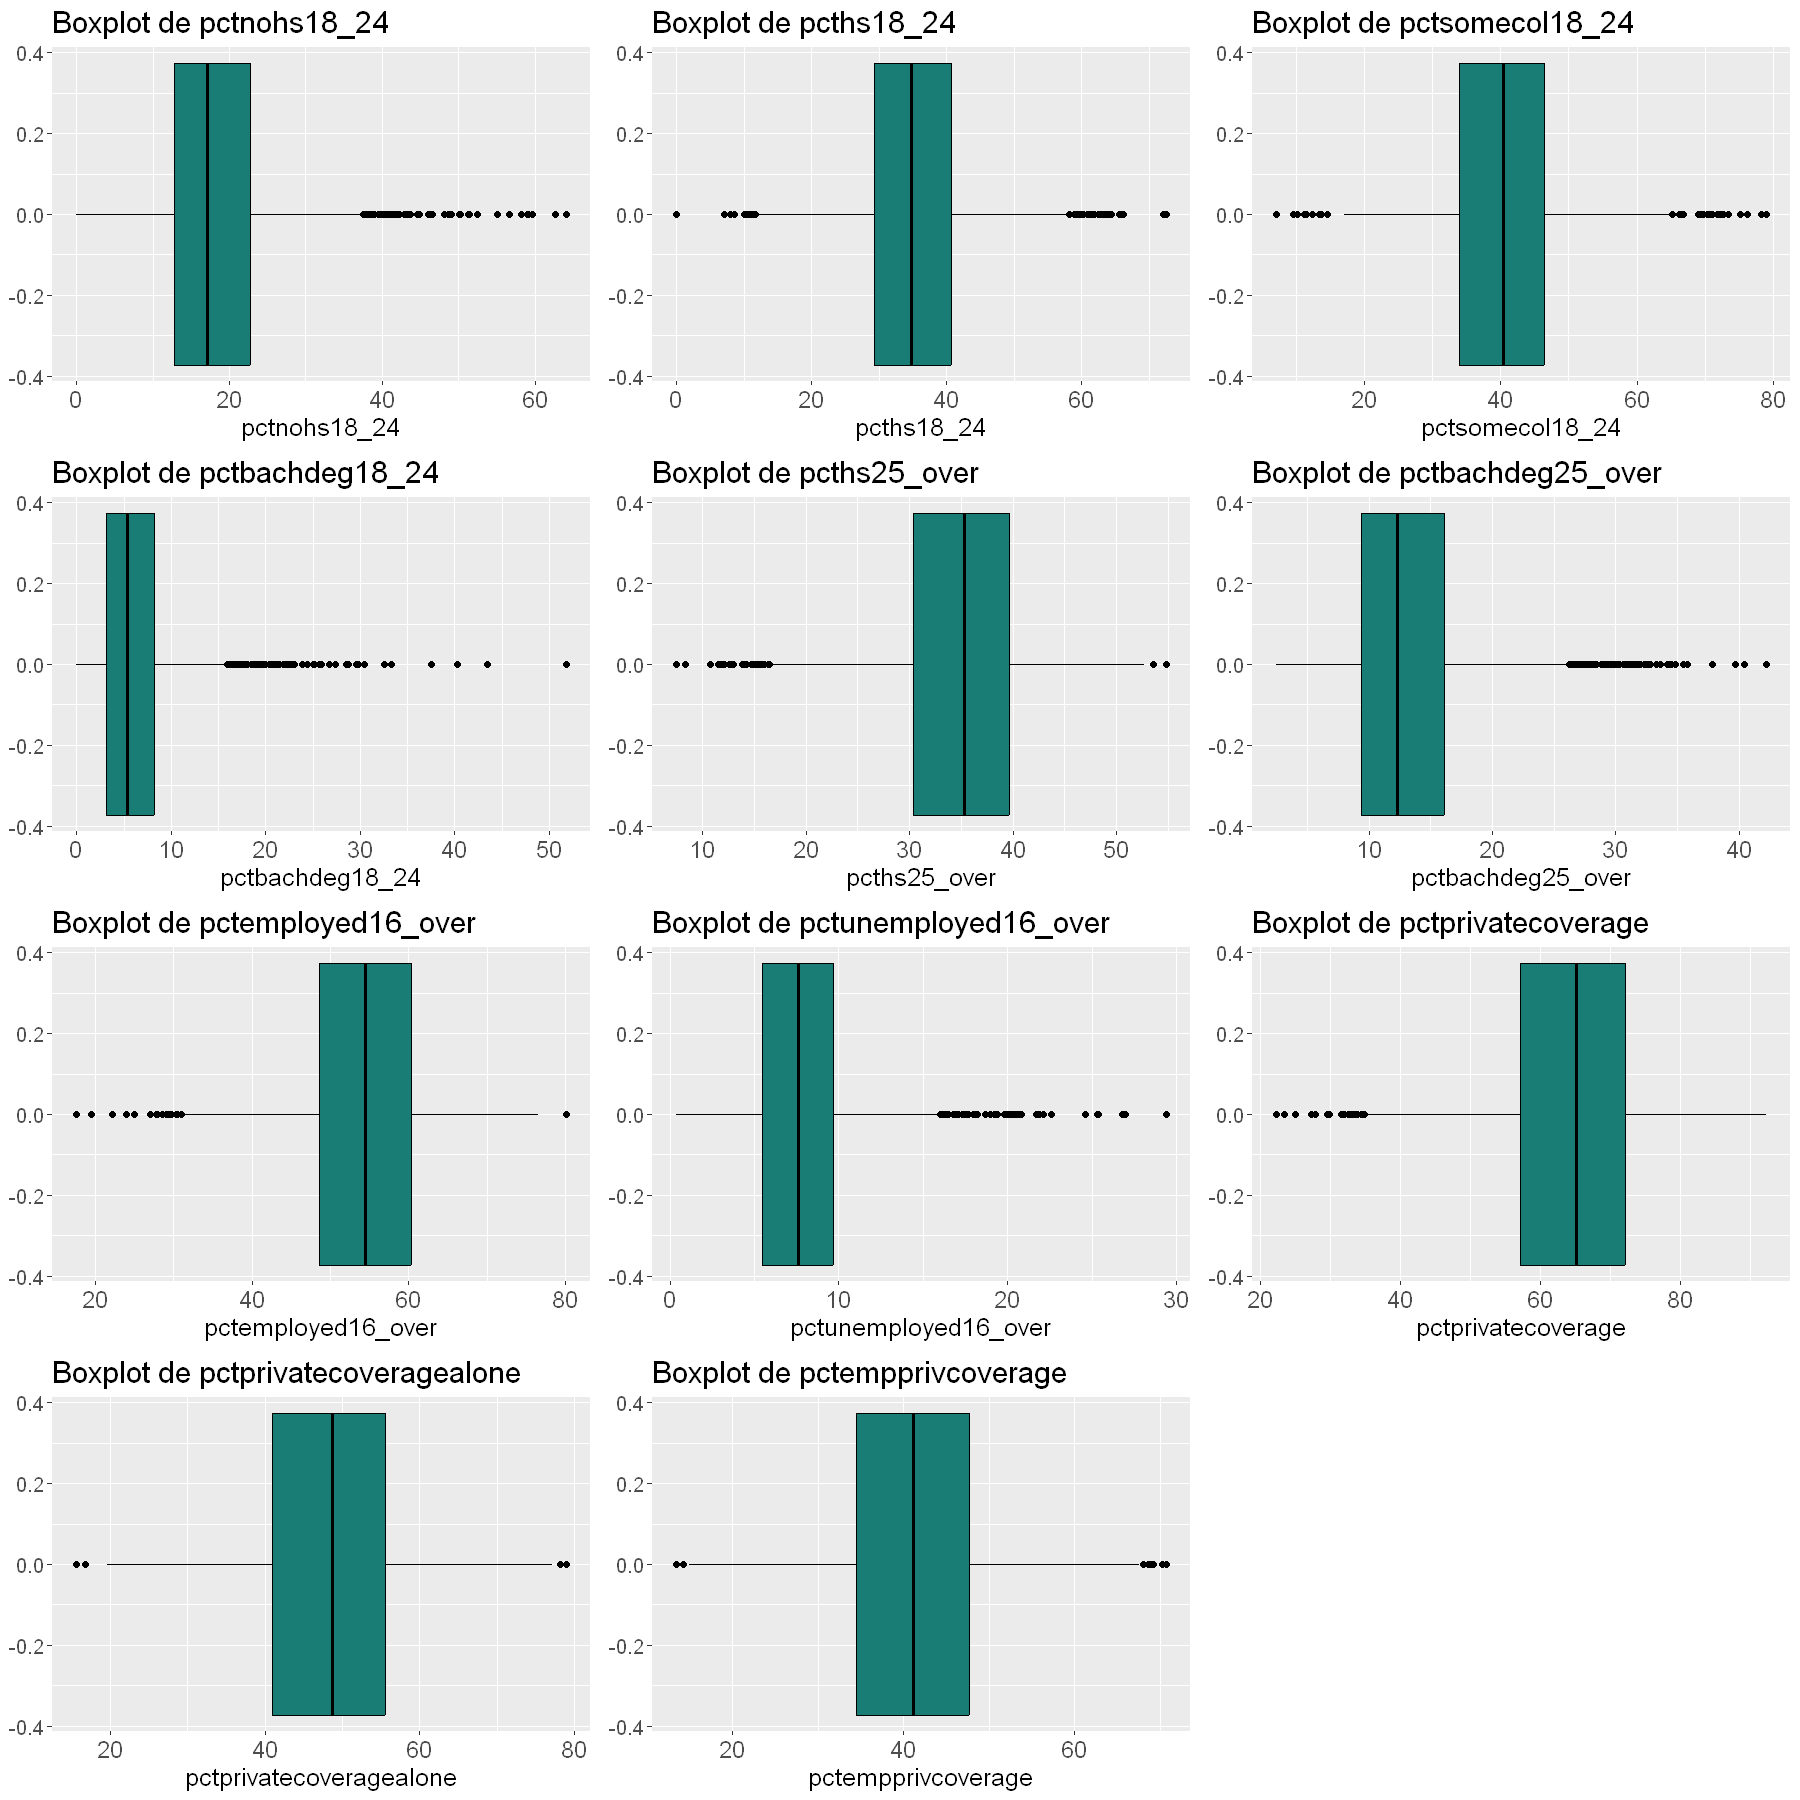

In [73]:
graficos_histograma = list()
variables <- c('pctnohs18_24', 'pcths18_24', 'pctsomecol18_24', 'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over', 'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage', 'pctprivatecoveragealone', 'pctempprivcoverage')
subconjunto_data2 <- data2[, variables, drop = FALSE]

for (variable in names(subconjunto_data2)) {
  grafico = ggplot(subconjunto_data2) +
    aes_string(x = variable) +
    geom_histogram(bins = 8, fill = '#197D75', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste(variable))
  
  graficos_histograma[[length(graficos_histograma) + 1]] <- grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 15  
)

# Mostrar los histogramas en un grid
do.call('grid.arrange', c(graficos_histograma, ncol = 3))

graficos_boxplot = list()
variables <- c('pctnohs18_24', 'pcths18_24', 'pctsomecol18_24', 'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over', 'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage', 'pctprivatecoveragealone', 'pctempprivcoverage')
subconjunto_data2 <- data2[, variables, drop = FALSE]

for (variable in names(subconjunto_data2)) {
  grafico = ggplot(subconjunto_data2) +
    aes_string(y = variable) +
    geom_boxplot(fill = '#197D75', color = 'black') +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste("Boxplot de", variable))+
    coord_flip()
  
  graficos_boxplot[[length(graficos_boxplot) + 1]] <- grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 15  
)

# Mostrar los boxplots en un grid
do.call('grid.arrange', c(graficos_boxplot, ncol = 3))

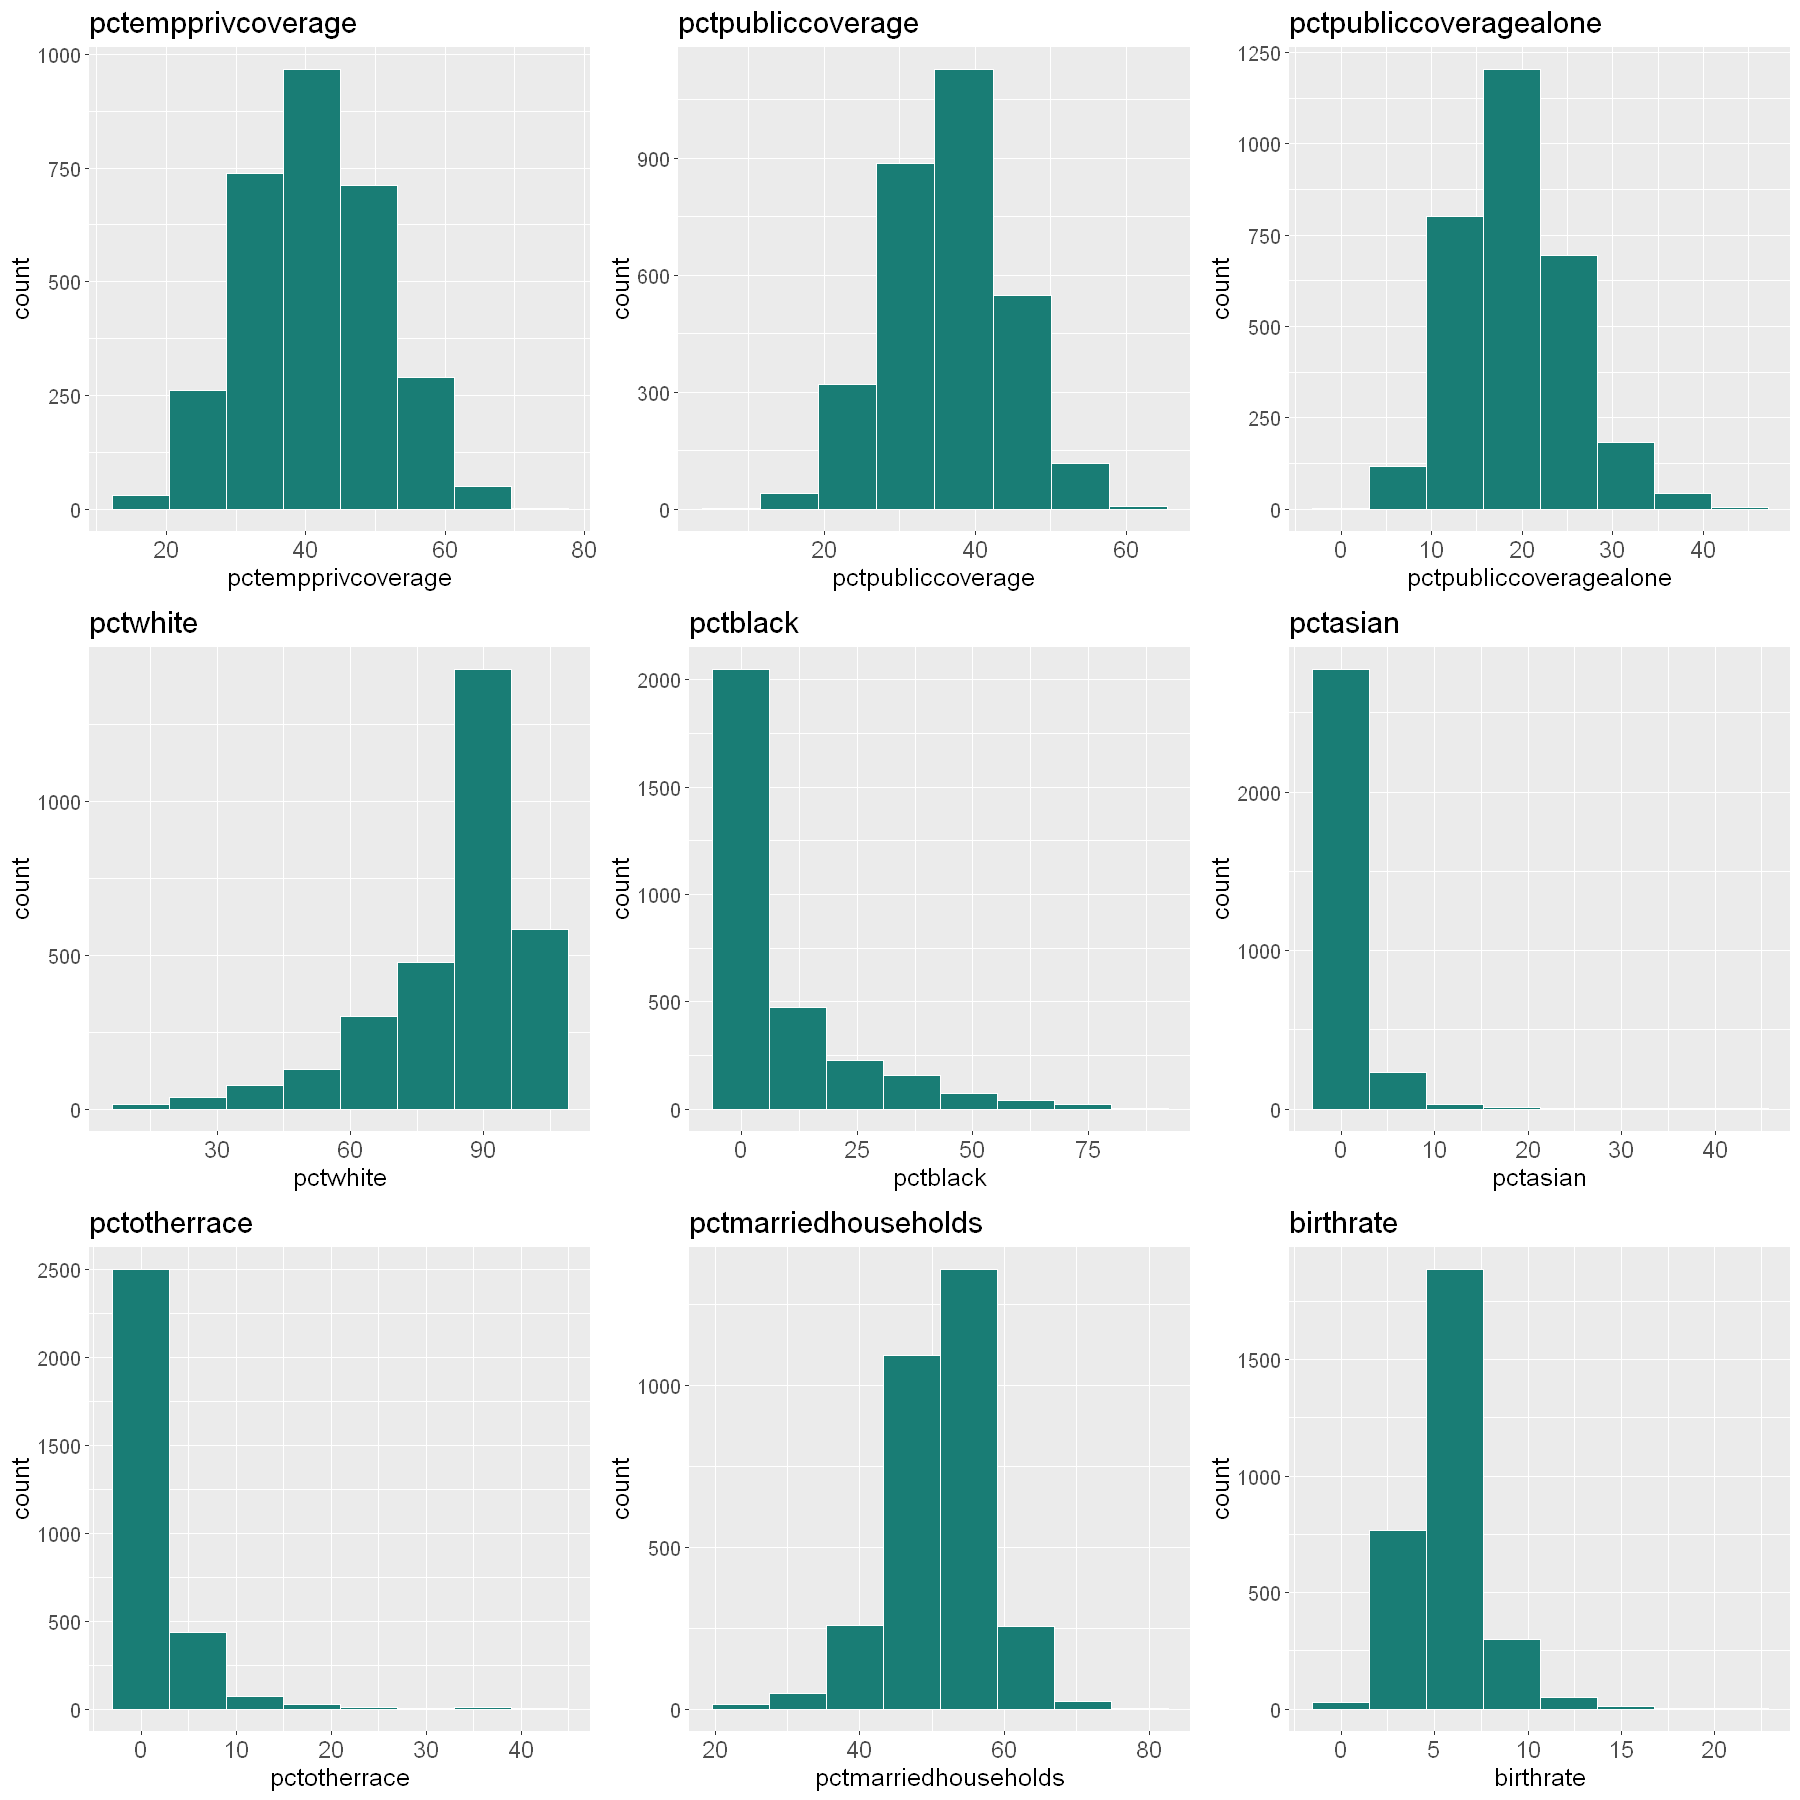

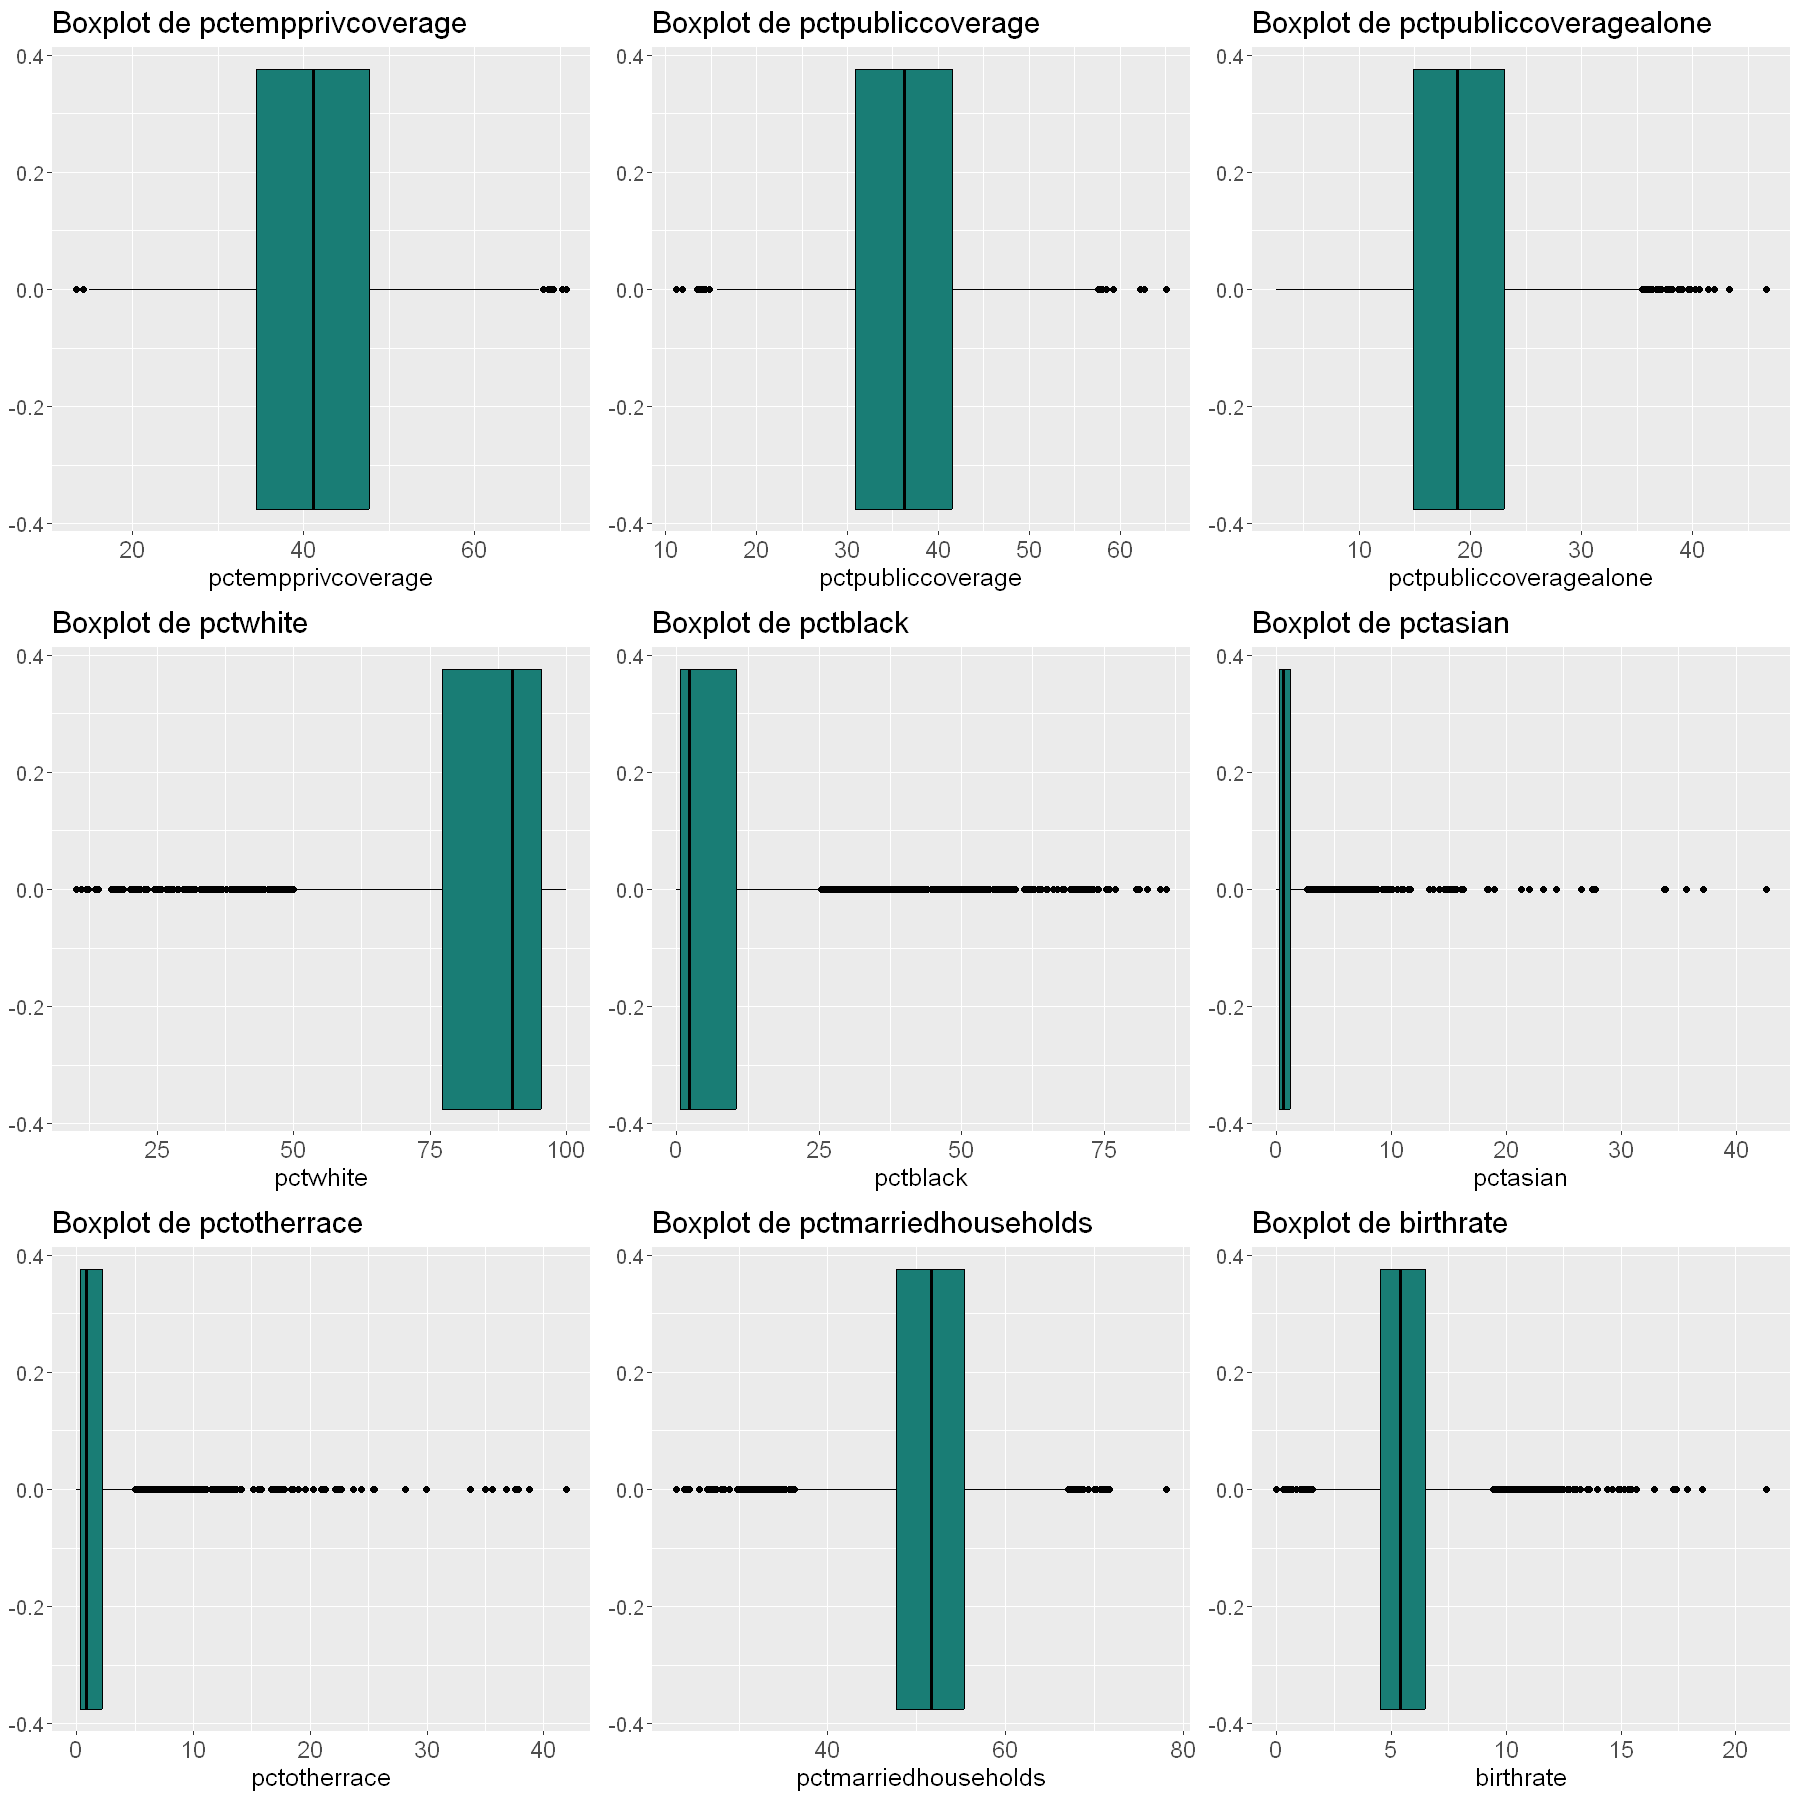

In [8]:
graficos_histograma = list()
variables <- c('pctempprivcoverage', 'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate')
subconjunto_data2 <- data2[, variables, drop = FALSE]

for (variable in names(subconjunto_data2)) {
  grafico = ggplot(subconjunto_data2) +
    aes_string(x = variable) +
    geom_histogram(bins = 8, fill = '#197D75', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste(variable))
  
  graficos_histograma[[length(graficos_histograma) + 1]] <- grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 15  
)

# Mostrar los histogramas en un grid
do.call('grid.arrange', c(graficos_histograma, ncol = 3))

graficos_boxplot = list()
variables <- c('pctempprivcoverage', 'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate')
subconjunto_data2 <- data2[, variables, drop = FALSE]

for (variable in names(subconjunto_data2)) {
  grafico = ggplot(subconjunto_data2) +
    aes_string(y = variable) +
    geom_boxplot(fill = '#197D75', color = 'black') +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste("Boxplot de", variable))+
    coord_flip()
  
  graficos_boxplot[[length(graficos_boxplot) + 1]] <- grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 15  
)

# Mostrar los boxplots en un grid
do.call('grid.arrange', c(graficos_boxplot, ncol = 3))

### <font color='#197D75'>  Descripcion de las metricas </font>

Vamos a realizar una descripcion de cada metrica evaluada luego de ver los estadisticos y sus graficos.

#### <font color='#197D75'>A. Variable objetivo/dependiente</font>
<font color='#197D75'> **1. target_deathrate** </font>: Esta variable representa la tasa de mortalidad objetivo en las regiones estudiadas. Los valores varían desde un mínimo de 59.7 hasta un máximo de 362.8, con una media de 178.7. La mediana está en 178.1, lo que sugiere que la distribución podría estar relativamente centrada.

#### <font color='#197D75'>B. Variables explicativas/independientes</font>
<font color='#197D75'> **2. Medincome** </font>: Representa el ingreso medio en las regiones estudiadas. Los valores varían desde 22640 hasta 125635, con una media de 47063. La mediana está en 45207, lo que indica que la mitad de las regiones tienen un ingreso medio inferior a este valor.

<font color='#197D75'> **3. popest2015** </font>: Indica la estimación de la población en 2015 para las diferentes regiones. La población varía desde 827 hasta 10170292, con una media significativamente alta de 102637. La mediana se sitúa en 26643. Esta variable nos aporta mucho ruido a nuestro modelo, ya que tiene un rango muy grande, con una mediana muy por debajo de la media, lo que nos aporta muchos outliers. Es potencial a excluir.

<font color='#197D75'> **4. povertypercent** </font>: Refleja el porcentaje de población en situación de pobreza en las regiones. Los valores varían desde un mínimo del 3.20 hasta un máximo del 47.40, con una media de 16.88. La mediana se encuentra en 15.90, sugiriendo que la mitad de las regiones tienen un porcentaje de población en situación de pobreza inferior a este valor.

<font color='#197D75'> **5. studypercap** </font>: La variable `studypercap` representa el gasto de investigación per cápita en las diferentes regiones. Los valores varían desde un mínimo de 0.00 hasta un máximo de 9762.31, con una media de 155.40. La mediana es 0.00, lo que indica que la mitad de las regiones tienen un gasto de investigación per cápita igual o inferior a este valor. Esta variable es potencial a ser modificada, ya que la mediana es cero y la media es de 155,40. Si bien el rango es amplio, haremos una variable binaria en donde 0 indica que no hay inversion per capita en ese condado y 1 indica que si.

<font color='#197D75'> **6. medianage** </font>: Representa la mediana de la edad de la población en las diferentes regiones. Los valores varían desde 22.30 hasta 624.00, con una media de 45.27. La mediana se encuentra en 41.00, lo que sugiere que la mitad de las regiones tienen una mediana de edad inferior a este valor. Esta variable debe ser observada con mayor intensidad, ya que puede estar aportando muchos outliers.

<font color='#197D75'> **7. medianagemale** </font>: Indica la mediana de la edad de los hombres en las diferentes regiones. Los valores varían desde 22.40 hasta 64.70, con una media de 39.57. La mediana es 39.60, lo que sugiere que la mitad de las regiones tienen una mediana de edad de los hombres inferior a este valor. 

<font color='#197D75'> **8. medianagefemale** </font>: Refleja la mediana de la edad de las mujeres en las diferentes regiones. Los valores varían desde 22.30 hasta 65.70, con una media de 42.15. La mediana está en 42.40, indicando que la mitad de las regiones tienen una mediana de edad de las mujeres inferior a este valor. Luego de ver los valores de medianage, medianagemale y medianagefemale, procederemos a construir una unica variable en cosnideracion: (medianagemale + medianagefemale) / 2

<font color='#197D75'> **9. percentmarried** </font>: La variable `percentmarried` representa el porcentaje de la población casada en diferentes regiones. Los valores oscilan entre 23.10 y 72.50, con una media de 51.77. La mediana se encuentra en 52.40, indicando que la mitad de las regiones tienen un porcentaje de población casada inferior a este valor.

<font color='#197D75'> **10. pctnohs18_24** </font>: Indica el porcentaje de personas de 18 a 24 años sin diploma de escuela secundaria en diferentes regiones. Los valores oscilan entre 0.00 y 64.10, con una media de 18.22. Es importante notar que hay 2285 valores faltantes (NA). Vamos a excluir esta variable de nuestro modelo por aportar muchos NULLS.

<font color='#197D75'> **11. pcths18_24** </font>: Representa el porcentaje de residentes del condado entre 18 y 24 años con un diploma de escuela secundaria. Los valores oscilan entre 0.0 y 72.5, con una media de 35.0. La mediana está en 34.7, indicando que la mitad de las regiones tienen un porcentaje de residentes con diploma de escuela secundaria inferior a este valor. El rango de esta variable es raro, que el minimo sea 0 indica que posiblemente este mal registrado, este es un posible outlier a limpiar.

<font color='#197D75'> **12. pctsomecol18_24** </font>: Indica el porcentaje de residentes del condado entre 18 y 24 años con algún nivel de educación superior sin haber obtenido un título universitario. Los valores varían desde 7.10 hasta 79.00, con una media de 40.98. La mediana está en 40.40, lo que sugiere que la mitad de las regiones tienen un porcentaje de residentes con educación superior sin título universitario inferior a este valor.

<font color='#197D75'> **13. pctbachdeg18_24** </font>: La variable `pctbachdeg18_24` indica el porcentaje de personas de 18 a 24 años con título universitario en diferentes regiones. Los valores oscilan desde 0.000 hasta 51.800, con una media de 6.158. La mediana se encuentra en 5.400, lo que sugiere que la mitad de las regiones tienen un porcentaje de residentes con título universitario inferior a este valor. El rango de esta variable es raro, que el minimo sea 0 indica que posiblemente este mal registrado, posibles outliers a limpiar.

<font color='#197D75'> **14. pcths25_over** </font>: Indica el porcentaje de residentes del condado mayores de 25 años con diploma de escuela secundaria. Los valores oscilan desde 7.50 hasta 54.80, con una media de 34.80. La mediana está en 35.30, indicando que la mitad de las regiones tienen un porcentaje de residentes mayores de 25 años con diploma de escuela secundaria inferior a este valor.

<font color='#197D75'> **15. pctbachdeg25_over** </font>: Representa el porcentaje de residentes del condado mayores de 25 años con título universitario. Los valores varían desde 2.50 hasta 42.20, con una media de 13.28. La mediana está en 12.30, indicando que la mitad de las regiones tienen un porcentaje de residentes mayores de 25 años con título universitario inferior a este valor.

<font color='#197D75'> **16. pctemployed16_over** </font>: Indica el porcentaje de empleo para personas mayores de 16 años en diferentes regiones. Los valores oscilan desde 17.60 hasta 80.10, con una media de 54.15. Es importante notar que hay 152 valores faltantes (NA). Eliminaremos esta variable, ya que nos quedaremos con la nro 17, que no posee nulos y es exactamente la inversa de la misma. 

<font color='#197D75'> **17. pctunemployed16_over** </font>: La variable representa el porcentaje de personas desempleadas mayores de 16 años en diferentes regiones. Los valores oscilan desde 0.400 hasta 29.400, con una media de 7.852. La mediana se encuentra en 7.600, lo que indica que la mitad de las regiones tienen un porcentaje de desempleo inferior a este valor.

<font color='#197D75'> **18. pctprivatecoverage** </font>: Indica el porcentaje de cobertura de seguro privado en diferentes regiones. Los valores varían desde 22.30 hasta 92.30, con una media de 64.35. La mediana está en 65.10, sugiriendo que la mitad de las regiones tienen un porcentaje de cobertura de seguro privado inferior a este valor.

<font color='#197D75'> **19. pctprivatecoveragealone** </font>: Representa el porcentaje de residentes del condado que tienen solo cobertura de salud privada (sin asistencia pública). Los valores oscilan desde 15.70 hasta 78.90, con una media de 48.45. Es importante notar que hay 609 valores faltantes (NA).

<font color='#197D75'> **20. pctempprivcoverage** </font>: La variable indica el porcentaje de empleados con cobertura de seguro privado en diferentes regiones. Los valores oscilan desde 13.5 hasta 70.7, con una media de 41.2. La mediana se encuentra en 41.1, indicando que la mitad de las regiones tienen un porcentaje de empleados con cobertura de seguro privado inferior a este valor. No tomaremos esta variable ya que suponemos que todos los trabajadores empleados son formales y cuentan con una cobertura sanitaria privada.

<font color='#197D75'> **21. pctpubliccoverage** </font>: Indica el porcentaje de cobertura de seguro público en diferentes regiones. Los valores varían desde 11.20 hasta 65.10, con una media de 36.25. La mediana está en 36.30, sugiriendo que la mitad de las regiones tienen un porcentaje de cobertura de seguro público inferior a este valor.

<font color='#197D75'> **22. pctpubliccoveragealone** </font>: Representa el porcentaje de residentes del condado que tienen solo cobertura de seguro público (sin asistencia privada). Los valores oscilan desde 2.60 hasta 46.60, con una media de 19.24. 

<font color='#197D75'> **23. pctwhite** </font>: Indica el porcentaje de población blanca en diferentes regiones. Los valores varían desde 10.20 hasta 100.00, con una media de 83.65. La mediana está en 90.06, sugiriendo que la mitad de las regiones tienen un porcentaje de población blanca inferior a este valor.

<font color='#197D75'> **24. pctblack** </font>: La variable indica el porcentaje de población negra en diferentes regiones. Los valores oscilan desde 0.0000 hasta 85.9478, con una media de 9.1080. La mediana se encuentra en 2.2476, indicando que la mitad de las regiones tienen un porcentaje de población negra inferior a este valor.

<font color='#197D75'>**25. pctasian**</font>: Representa el porcentaje de población asiática en diferentes regiones. Los valores varían desde 0.0000 hasta 42.6194, con una media de 1.2540. La mediana está en 0.5498, sugiriendo que la mitad de las regiones tienen un porcentaje de población asiática inferior a este valor.

<font color='#197D75'>**26. pctotherrace**</font>: Indica el porcentaje de población de otras razas en diferentes regiones. Los valores oscilan desde 0.0000 hasta 41.9303, con una media de 1.9835. Excluiremos esta variable.

<font color='#197D75'>**27. pctmarriedhouseholds**</font>: Indica el porcentaje de hogares casados en diferentes regiones. Los valores varían desde 22.99 hasta 78.08, con una media de 51.24. La mediana está en 51.67, sugiriendo que la mitad de las regiones tienen un porcentaje de hogares casados inferior a este valor.

<font color='#197D75'>**28. birthrate**</font>: Representa la tasa de natalidad en diferentes regiones. Los valores oscilan desde 0.000 hasta 21.326, con una media de 5.640. La mediana está en 5.381, indicando que la mitad de las regiones tienen una tasa de natalidad inferior a este valor. Eliminaremos esta variable por no verla significativa para nuestra variable objetivo.

#### <font color='#197D75'> Limpiamos la base y transformamos </font>

In [9]:
#CREAMOS LAS VARIABLES QUE VEMOS NECESARIAS
data2$studypercap2 <- ifelse(data2$studypercap == 0, 0, 1)
data2$medianage2 <- (data2$medianagemale + data2$medianagefemale)/2

`geom_smooth()` using formula = 'y ~ x'


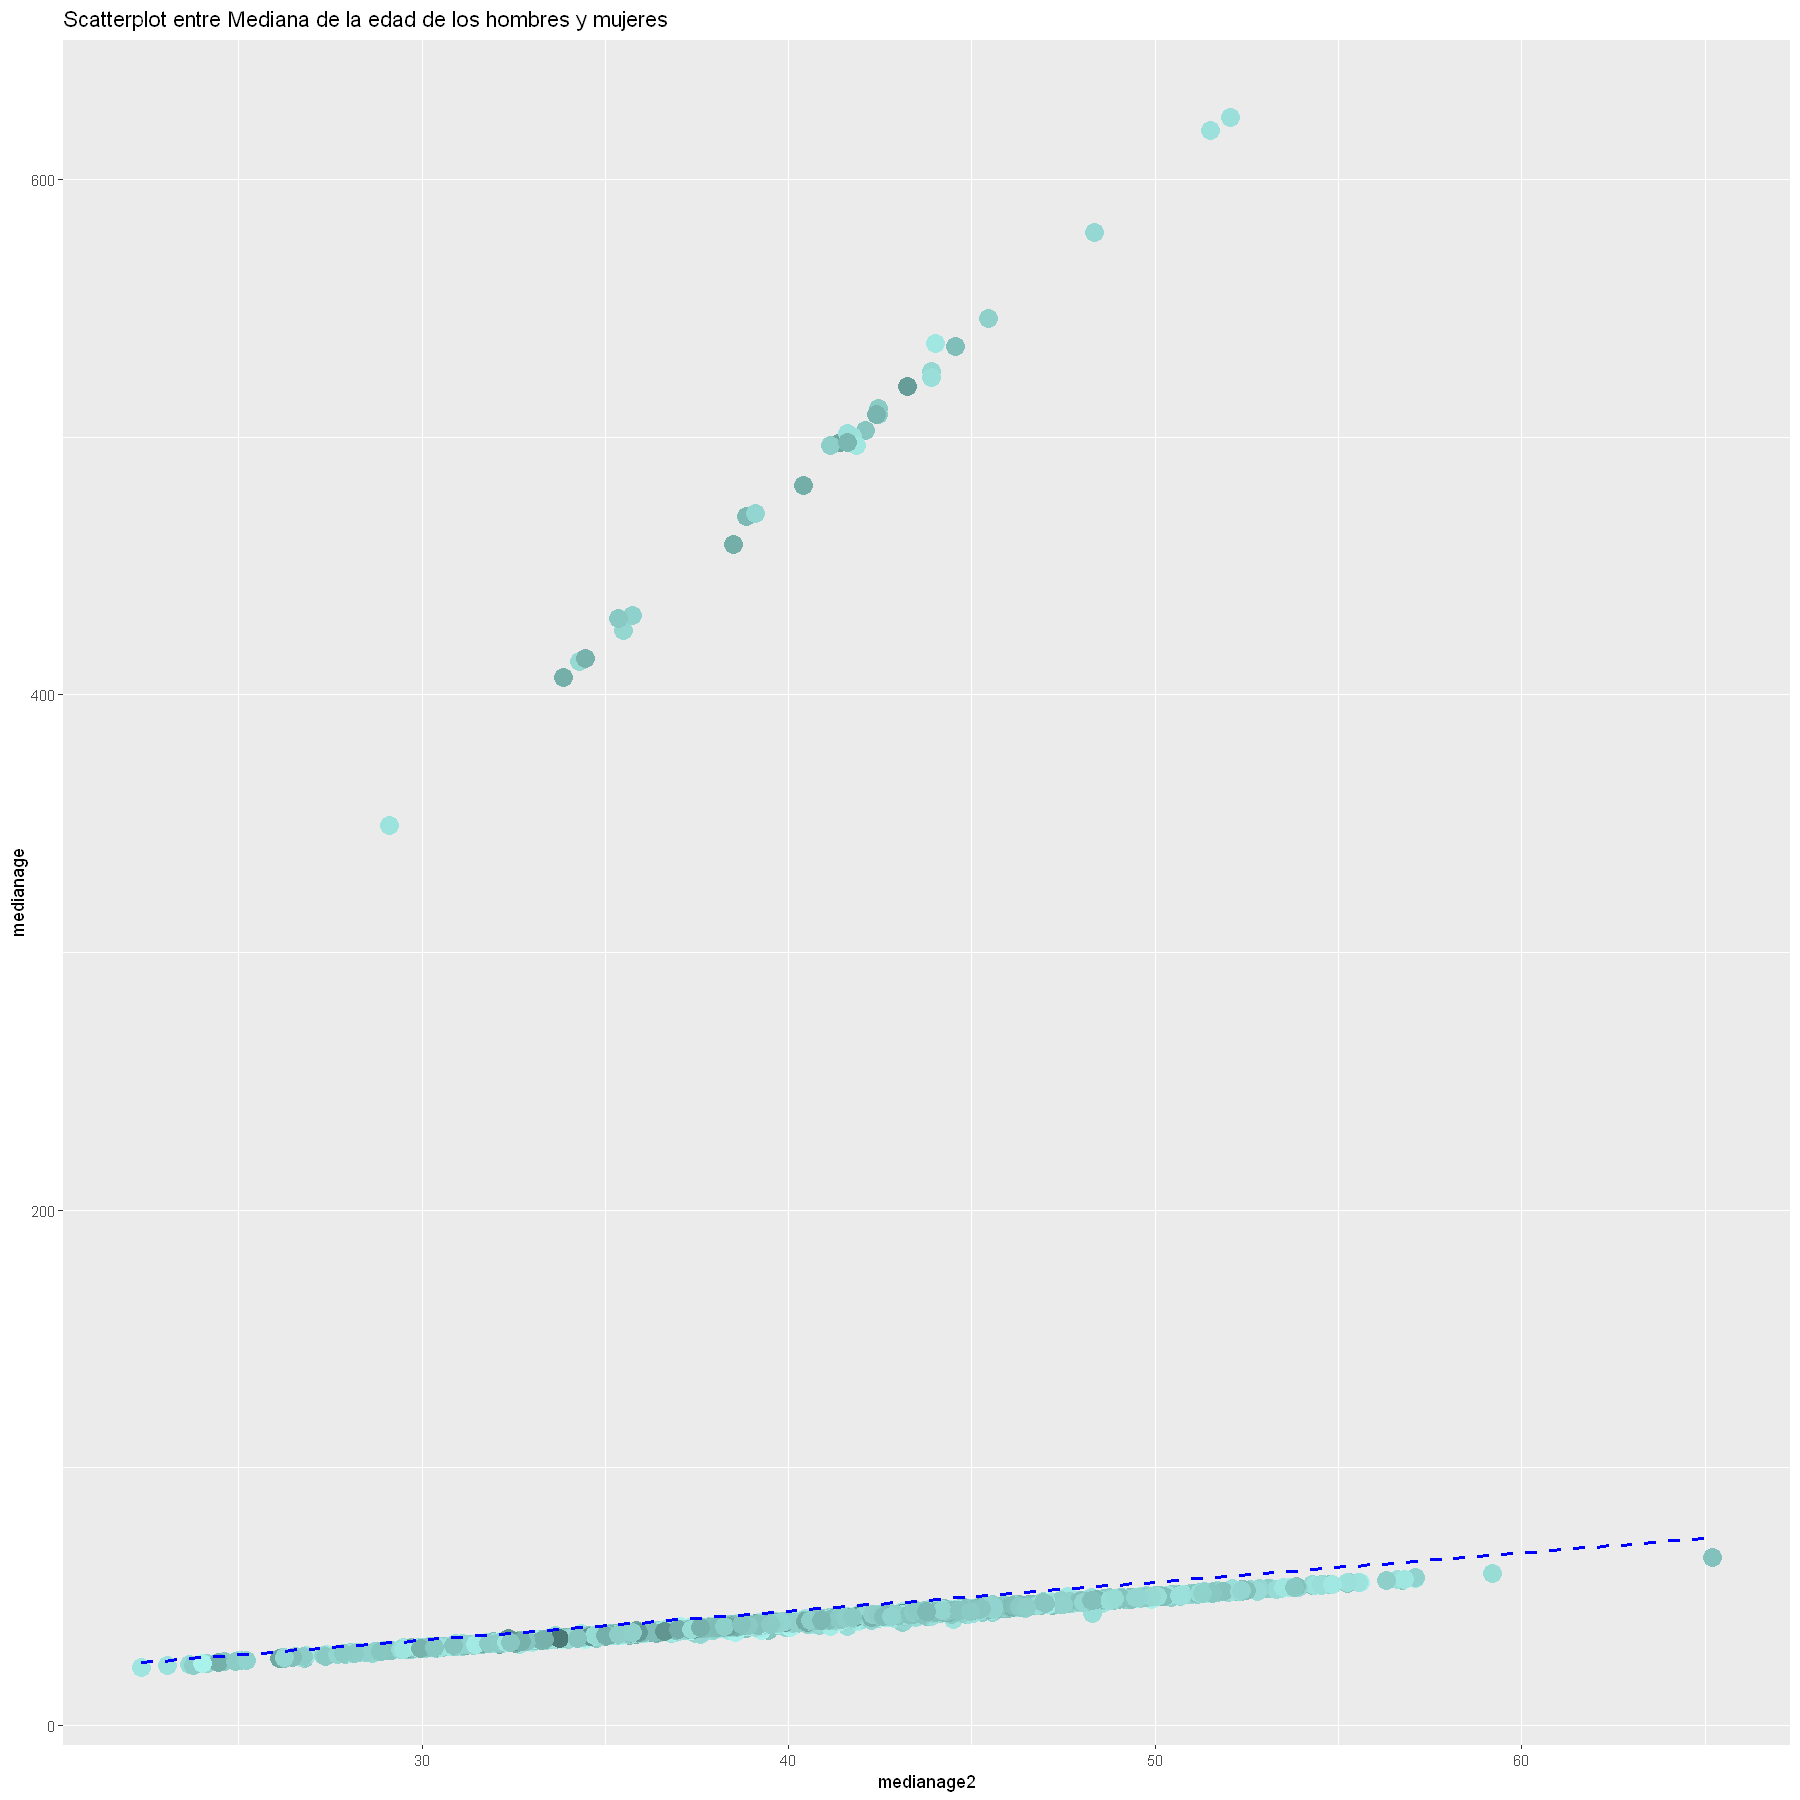

In [10]:
ggplot(data2) +
  aes(x = medianage2
      ,y = medianage
      ,color = medincome) +
   geom_point(size = 5
             ,show.legend = FALSE) +
geom_smooth(method = "lm", se = FALSE, color = "blue", linetype = "dashed") +  # Añadimos la línea de tendencia
   scale_color_gradient(low = "#B1FCF6", high = "#1C3D3A") +
   labs(title = "Scatterplot entre Mediana de la edad de los hombres y mujeres" )

#####
Aca podemos observar mejor los valores outsider de nuestra variable medianage, y como medianage2 corrige esto

In [11]:
# Crear data3 manteniendo todas las variables excepto las eliminadas
data3 <- data2[, !(names(data2) %in% c('popest2015', 'medianage', 'pctnohs18_24', 'pctemployed16_over', 'pcttotherrace', 'studypercap', 'medianagemale', 'medianagefemale', 'pctprivatecoverage', 'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage'))]
colnames(data3)
summary(data3)

[1] "avganncount"            "avgdeathsperyear"       "target_deathrate"      
 [4] "incidencerate"          "medincome"              "povertypercent"        
 [7] "percentmarried"         "pcths18_24"             "pctsomecol18_24"       
[10] "pctbachdeg18_24"        "pcths25_over"           "pctbachdeg25_over"     
[13] "pctunemployed16_over"   "pctpubliccoveragealone" "pctwhite"              
[16] "pctblack"               "pctasian"               "pctotherrace"          
[19] "pctmarriedhouseholds"   "birthrate"              "studypercap2"          
[22] "medianage2"

  avganncount      avgdeathsperyear target_deathrate incidencerate   
 Min.   :    6.0   Min.   :    3    Min.   : 59.7    Min.   : 201.3  
 1st Qu.:   76.0   1st Qu.:   28    1st Qu.:161.2    1st Qu.: 420.3  
 Median :  171.0   Median :   61    Median :178.1    Median : 453.5  
 Mean   :  606.3   Mean   :  186    Mean   :178.7    Mean   : 448.3  
 3rd Qu.:  518.0   3rd Qu.:  149    3rd Qu.:195.2    3rd Qu.: 480.9  
 Max.   :38150.0   Max.   :14010    Max.   :362.8    Max.   :1206.9  
                                                                     
   medincome      povertypercent  percentmarried    pcths18_24  
 Min.   : 22640   Min.   : 3.20   Min.   :23.10   Min.   : 0.0  
 1st Qu.: 38883   1st Qu.:12.15   1st Qu.:47.75   1st Qu.:29.2  
 Median : 45207   Median :15.90   Median :52.40   Median :34.7  
 Mean   : 47063   Mean   :16.88   Mean   :51.77   Mean   :35.0  
 3rd Qu.: 52492   3rd Qu.:20.40   3rd Qu.:56.40   3rd Qu.:40.7  
 Max.   :125635   Max.   :47.40   Max.   :72.50   

####
Excluiremos de nuestra base a pctsomecol18_24 dado que tiene un alto nivel de NULLS

### <font color='#197D75'>  Analizamos la relacion entre nuestra variable dependiente y las independientes </font>

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


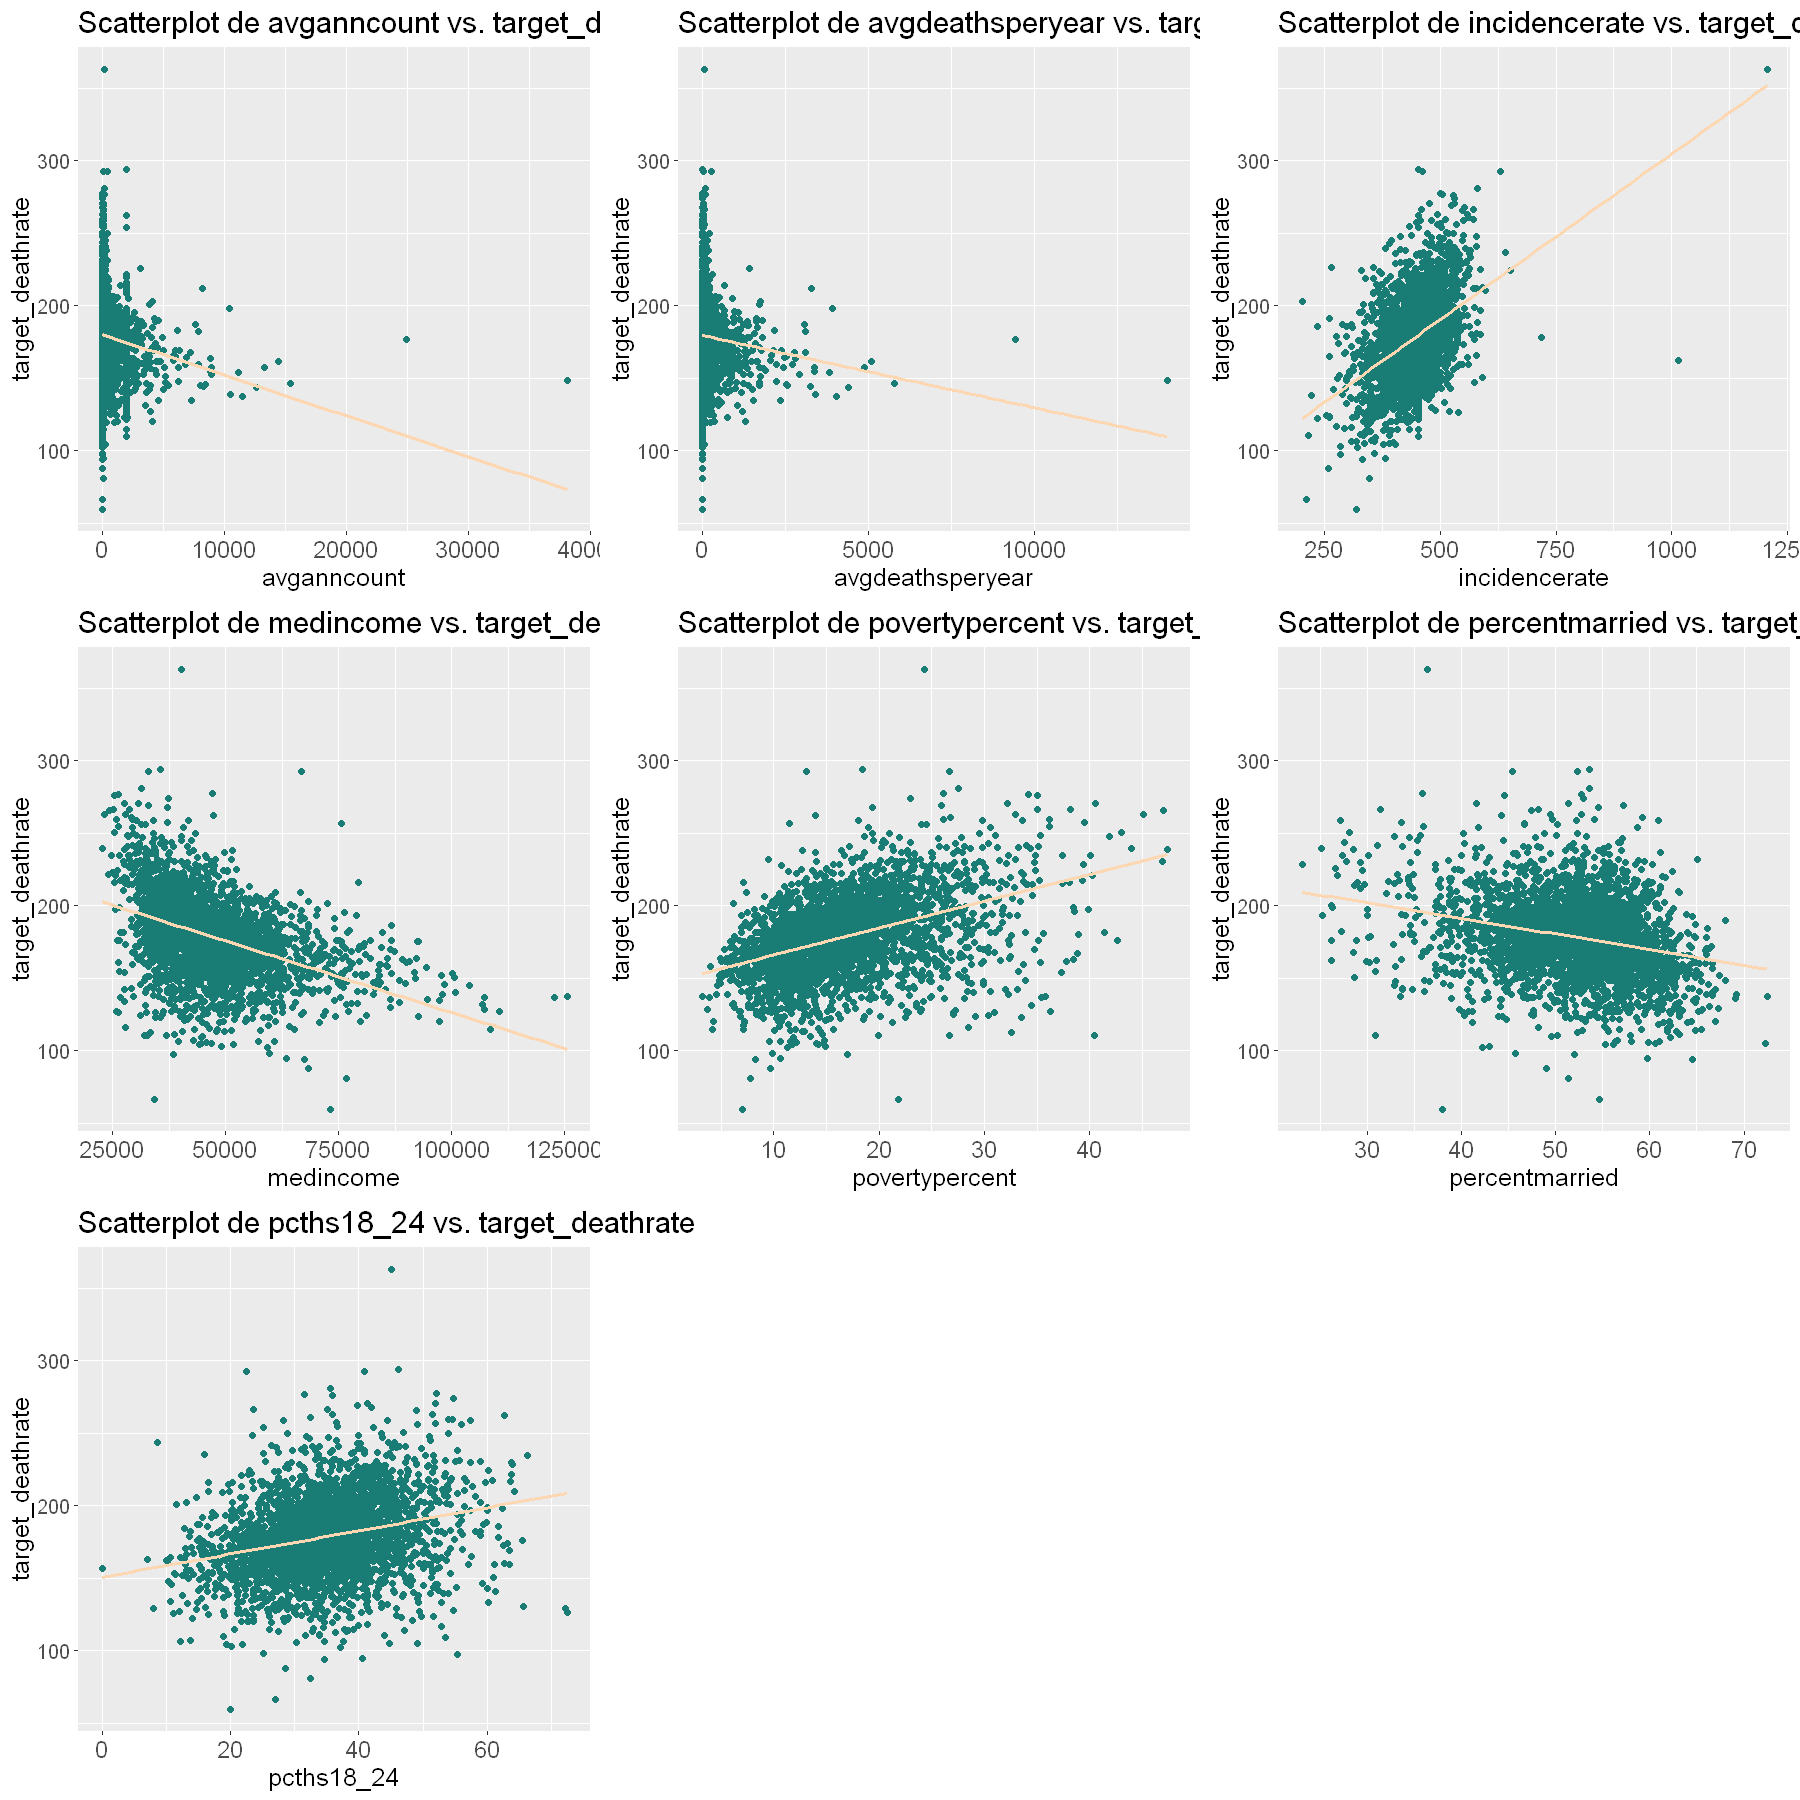

In [12]:
graficos_scatterplot = list()
variables <- c('avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome', 'povertypercent', 'percentmarried', 'pcths18_24')
subconjunto_data2 <- data3[, c(variables, 'target_deathrate'), drop = FALSE]

for (variable in variables) {
  grafico = ggplot(subconjunto_data2) +
    aes_string(x = variable, y = 'target_deathrate') +
    geom_point(color = '#197D75') +
    geom_smooth(method = 'lm', se = FALSE, color = '#FCD7B1') +  # Línea de regresión lineal en rojo
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) +
    labs(title = paste("Scatterplot de", variable, "vs. target_deathrate"))
  
  graficos_scatterplot[[length(graficos_scatterplot) + 1]] <- grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 15  
)

# Mostrar los scatter plots en un grid
grid.arrange(grobs = graficos_scatterplot, ncol = 3)


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 2285 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 2285 rows containing missing values (`geom_point()`)."
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


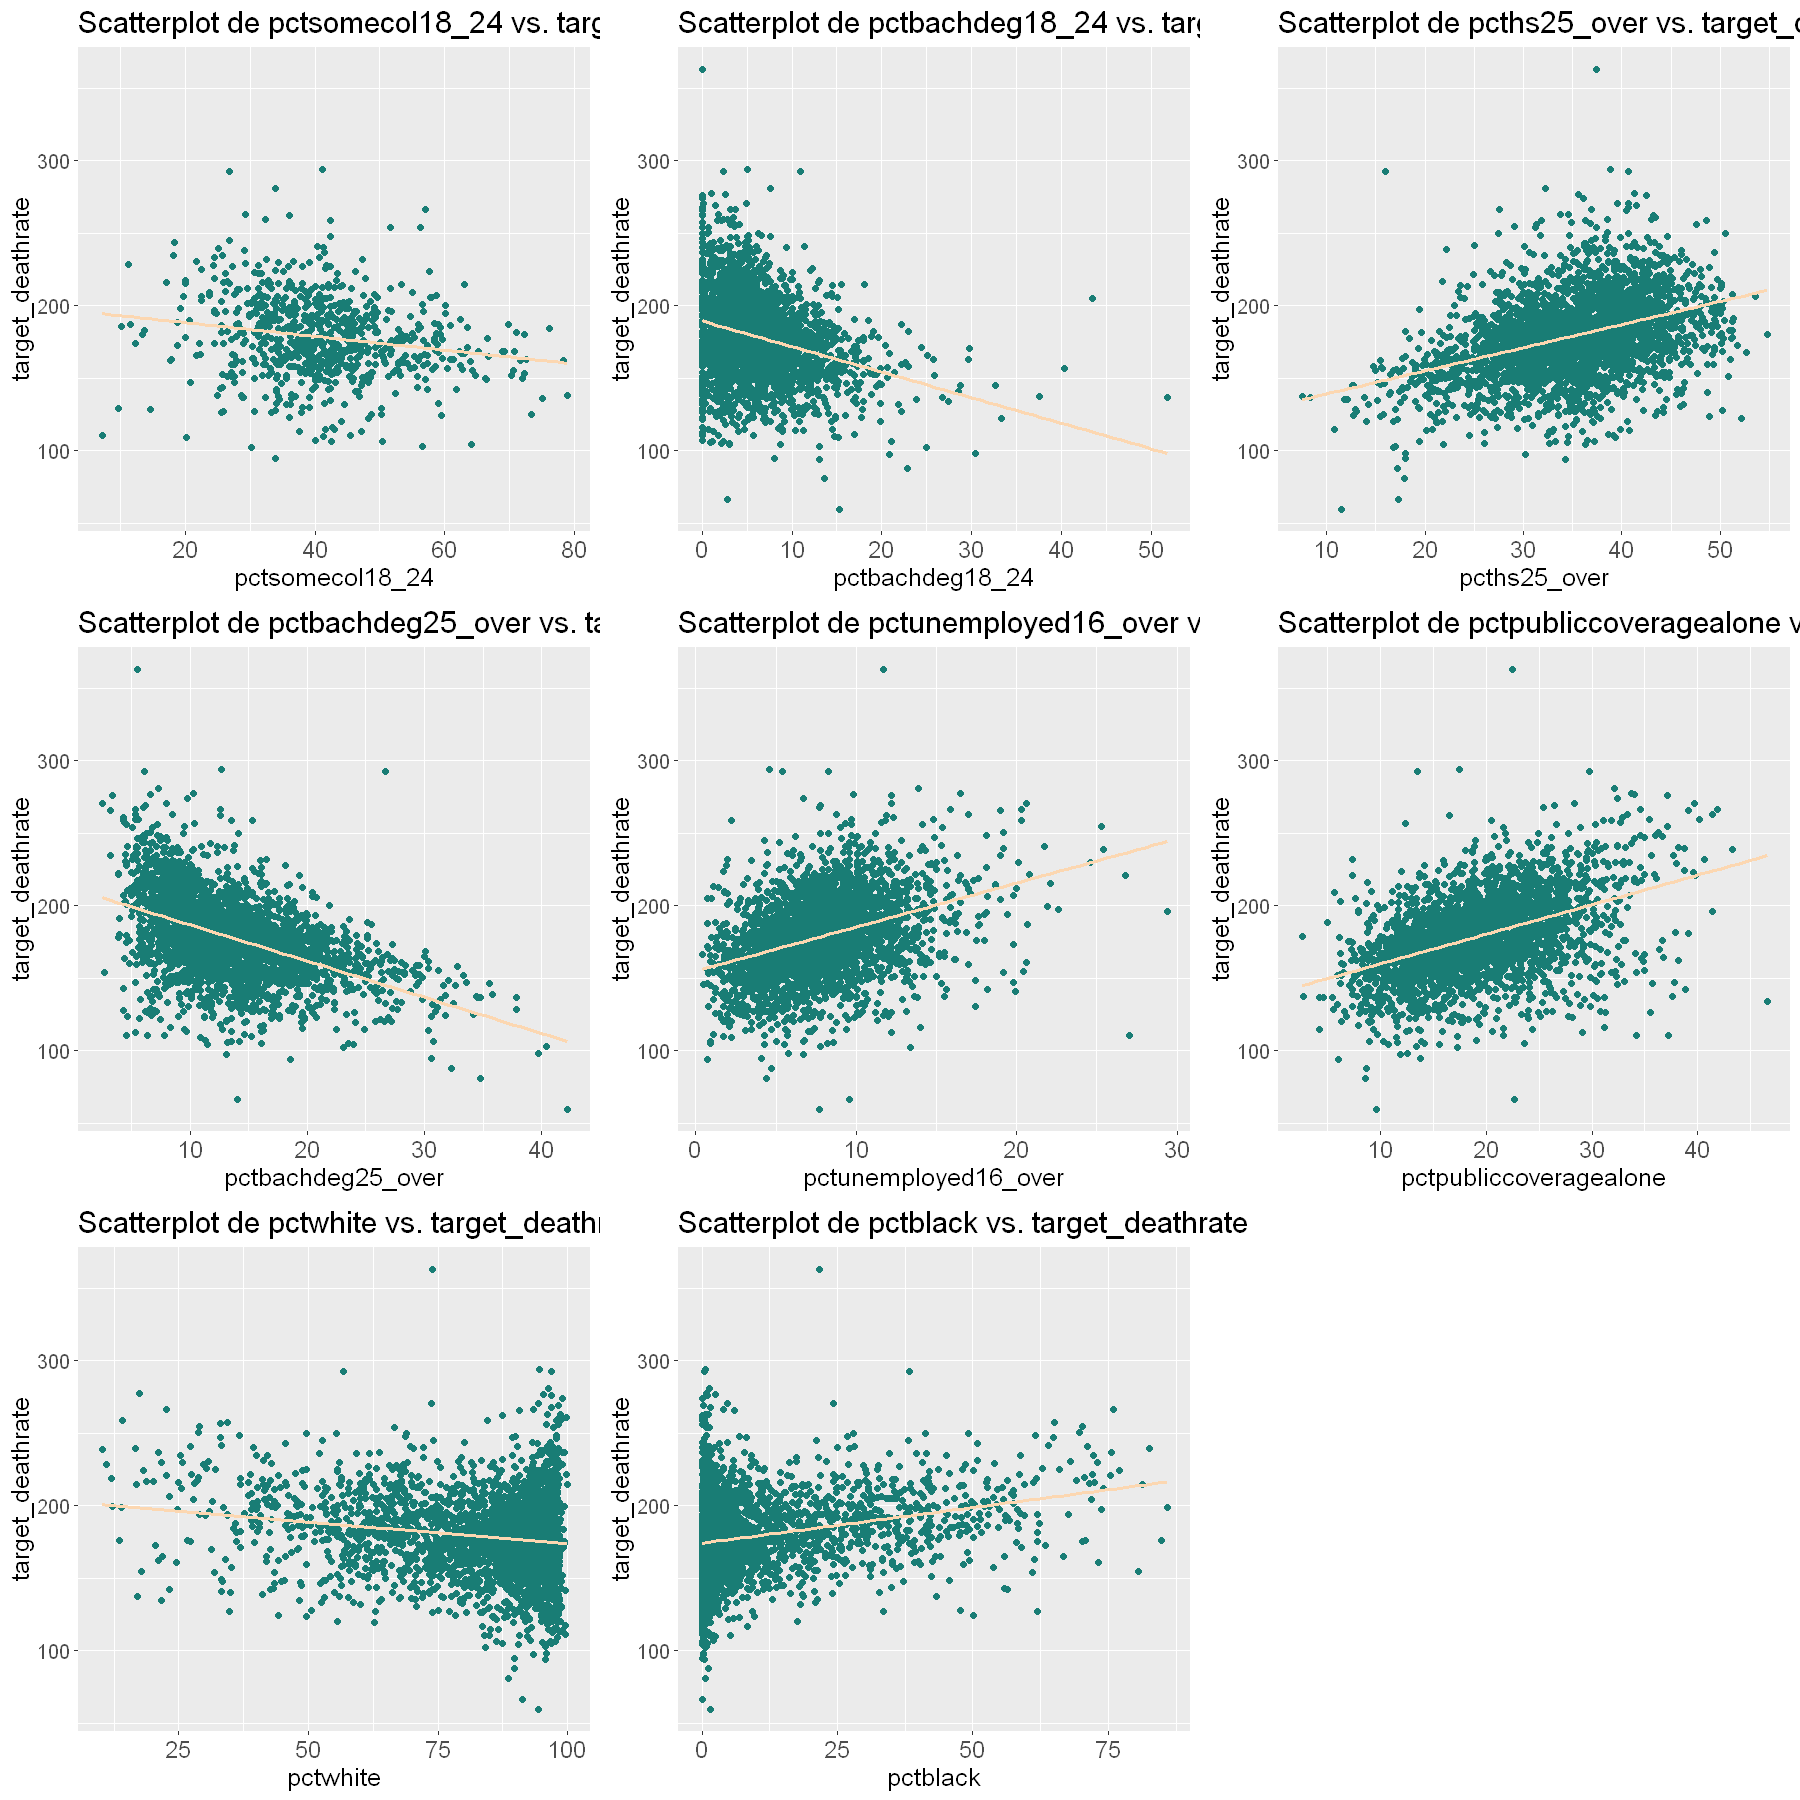

In [13]:
graficos_scatterplot = list()
variables <- c('pctsomecol18_24', 'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over', 'pctunemployed16_over', 'pctpubliccoveragealone', 'pctwhite', 'pctblack')
subconjunto_data2 <- data3[, c(variables, 'target_deathrate'), drop = FALSE]

for (variable in variables) {
  grafico = ggplot(subconjunto_data2) +
    aes_string(x = variable, y = 'target_deathrate') +
    geom_point(color = '#197D75') +
    geom_smooth(method = 'lm', se = FALSE, color = '#FCD7B1') +  # Línea de regresión lineal en rojo
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) +
    labs(title = paste("Scatterplot de", variable, "vs. target_deathrate"))
  
  graficos_scatterplot[[length(graficos_scatterplot) + 1]] <- grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 15  
)

# Mostrar los scatter plots en un grid
grid.arrange(grobs = graficos_scatterplot, ncol = 3)


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


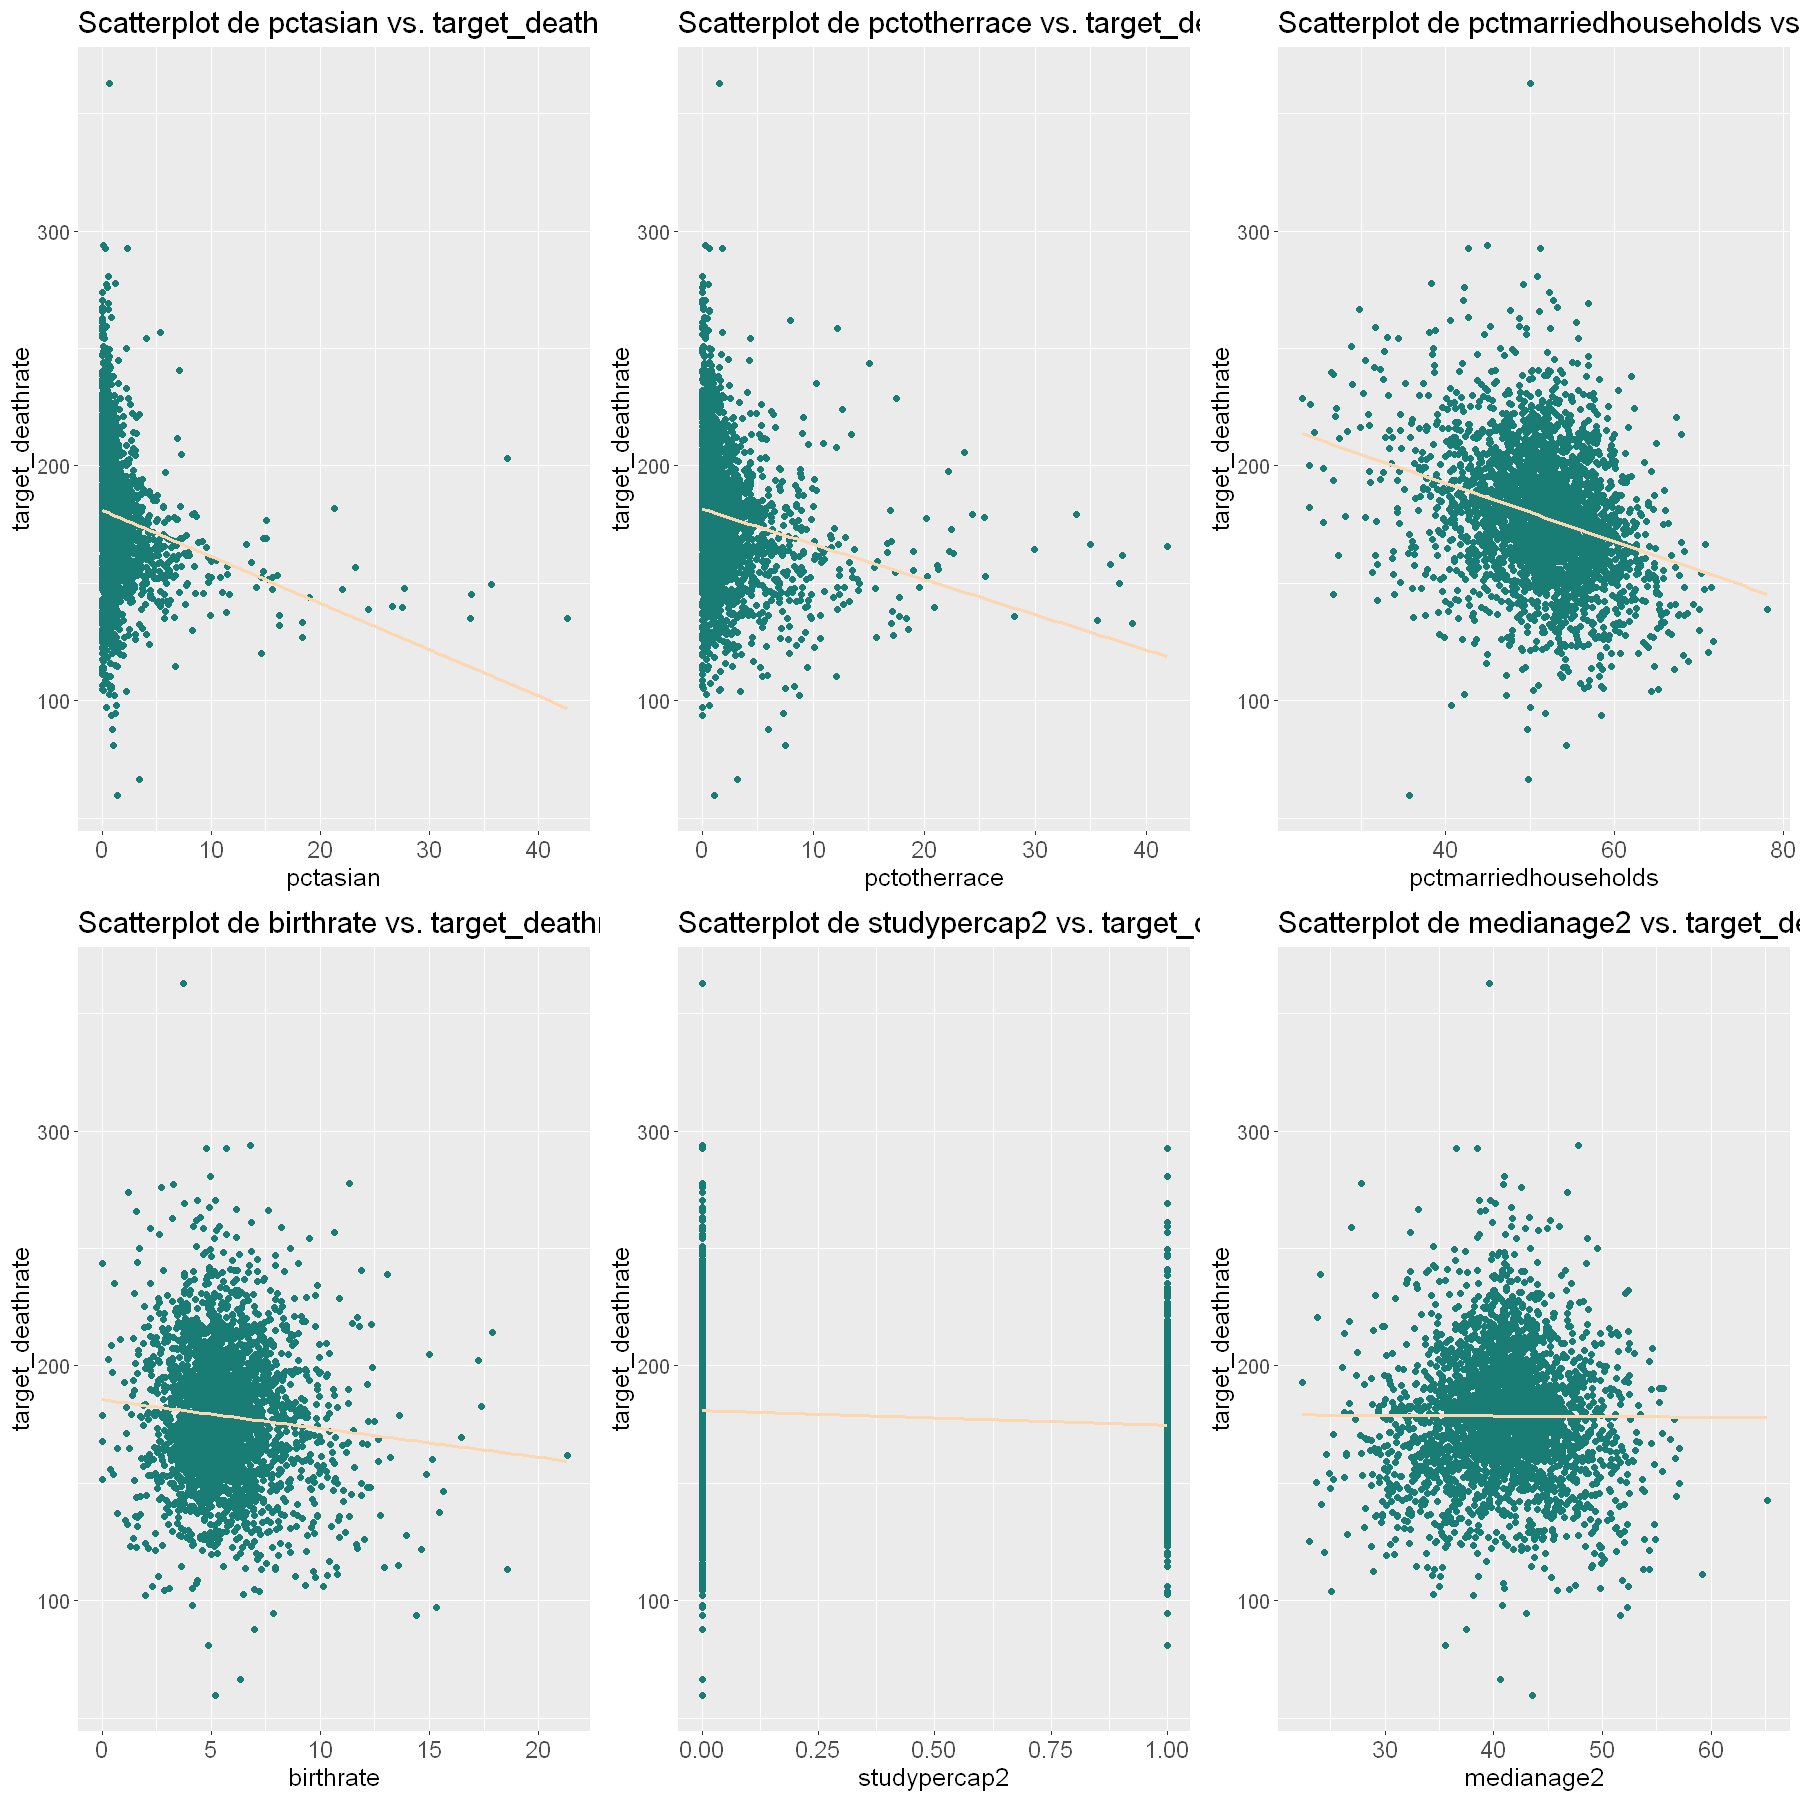

In [14]:
graficos_scatterplot = list()
variables <- c('pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate', 'studypercap2', 'medianage2')
subconjunto_data2 <- data3[, c(variables, 'target_deathrate'), drop = FALSE]

for (variable in variables) {
  grafico = ggplot(subconjunto_data2) +
    aes_string(x = variable, y = 'target_deathrate') +
    geom_point(color = '#197D75') +
    geom_smooth(method = 'lm', se = FALSE, color = '#FCD7B1') +  # Línea de regresión lineal en rojo
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) +
    labs(title = paste("Scatterplot de", variable, "vs. target_deathrate"))
  
  graficos_scatterplot[[length(graficos_scatterplot) + 1]] <- grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 15  
)

# Mostrar los scatter plots en un grid
grid.arrange(grobs = graficos_scatterplot, ncol = 3)


####
Observamos que todas las variables podrian presentar una cierta correlacion con target_deathrate, menos medianage2 que parece no tener una relacion definida. Por otro lado, vemos como la variable studypercap2, al ser una binomial, concentra valores unicamente entre 0 y 1. Ademas, obvervamos que hay variables que tienen NULLS, esto ya lo vimos arriba a la hora de hacer el summary, no las quitamos y continuan dentro. Para quedarnos con dos variables que a priori podrian tener mayor significatividad a la hora de explicar nuestra variable objetivo deberian tener una correlacion distinta de cero y particularmente, en el scatterplot, debemos ver la nube de puntos de manera concentrada y distribuida de manera pareja, es decir, que tenga una varianza minima con la suma de errores cercana a cero. A simple vista podemos ver pctpubliccoveragealone e incidencerate, aunque tampoco cumplen a la perfeccion estas condiciones. Son dos posibles canidatos. 

Haremos una matriz de las regresiones de cada variable respecto a la variable dependiente para ver como son los coeficientes, y sobre todo, para ver cual es su nivel de significativad y el coeficiente de determinacion. El modelo ideal seria aque cuyo nivel de significatividad (pvalue), sea cercano a cero (siempre menor que 0,05), y el coeficiente de determinacion (R2) sea lo mas cercano a 1 posible. Veamos la matriz:

In [15]:
# Variables de interés
variables <- c('avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome', 'povertypercent', 'percentmarried', 'pcths18_24', 'pctsomecol18_24', 'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over', 'pctunemployed16_over', 'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate', 'studypercap2', 'medianage2')

# Inicializar la tabla de regresiones
regresiones <- data.frame(variable = character(), coeficiente = numeric(), pvalor = numeric(), R2 = numeric(), stringsAsFactors = FALSE)

# Realizar regresiones y almacenar resultados
for (variable in variables) {
  formula <- paste("target_deathrate ~ ", variable)
  modelo_lm <- lm(as.formula(formula), data = data3)
  resultados <- summary(modelo_lm)$coefficients[2, c("Estimate", "Pr(>|t|)")]
  
  # Redondear el p-valor a dos decimales
  pvalor <- as.numeric(round(resultados["Pr(>|t|)"], 2))
  
  # Extraer R cuadrado y multiplicar por 100
  r_cuadrado <- summary(modelo_lm)$r.squared * 100
  
  # Agregar resultados a la tabla
  regresiones <- rbind(regresiones, data.frame(variable = variable, coeficiente = resultados["Estimate"], pvalor = pvalor, R2 = r_cuadrado))
}

# Mostrar la tabla de regresiones
print(regresiones)

                         variable   coeficiente pvalor           R2
Estimate              avganncount -0.0028123005   0.00  2.060132585
Estimate1        avgdeathsperyear -0.0049936750   0.00  0.822924025
Estimate2           incidencerate  0.2285967988   0.00 20.198885077
Estimate3               medincome -0.0009879254   0.00 18.371075571
Estimate4          povertypercent  1.8592653432   0.00 18.437489637
Estimate5          percentmarried -1.0736187675   0.00  7.119315977
Estimate6              pcths18_24  0.8015932999   0.00  6.863139329
Estimate7         pctsomecol18_24 -0.4733327478   0.00  3.560303577
Estimate8         pctbachdeg18_24 -1.7635820826   0.00  8.283886160
Estimate9            pcths25_over  1.5960312195   0.00 16.369232024
Estimate10      pctbachdeg25_over -2.4973750759   0.00 23.568822638
Estimate11   pctunemployed16_over  3.0418277287   0.00 14.319597637
Estimate12 pctpubliccoveragealone  2.0399588115   0.00 20.192223092
Estimate13               pctwhite -0.3005561647 

<font color='#197D75'> **avganncount:** </font> Presenta un coeficiente negativo significativo, lo que sugiere que un mayor número de anuncios está asociado con una disminución en el `target_deathrate`.

<font color='#197D75'> **avgdeathsperyear:** </font> También tiene un coeficiente negativo significativo, indicando que un mayor número de muertes por año está asociado con una disminución en el `target_deathrate`.

<font color='#197D75'> **incidencerate:** </font> Tiene un coeficiente positivo significativo, lo que sugiere que un mayor índice de incidencia de cáncer está asociado con un aumento en el `target_deathrate`.

<font color='#197D75'> **medincome:** </font> Presenta un coeficiente negativo significativo, indicando que un mayor ingreso medio está asociado con una disminución en el `target_deathrate`.

<font color='#197D75'> **povertypercent:** </font> Tiene un coeficiente positivo significativo, lo que sugiere que un mayor porcentaje de pobreza está asociado con un aumento en el `target_deathrate`.

<font color='#197D75'> **percentmarried:** </font> Muestra un coeficiente negativo significativo, indicando que un mayor porcentaje de personas casadas está asociado con una disminución en el `target_deathrate`.

<font color='#197D75'> **pcths18_24:** </font> Tiene un coeficiente positivo significativo, indicando que un mayor porcentaje de personas con educación secundaria (18-24 años) está asociado con un aumento en el `target_deathrate`.

<font color='#197D75'> **pctsomecol18_24:** </font> Presenta un coeficiente negativo significativo, lo que sugiere que un mayor porcentaje de personas con algún nivel de educación universitaria (18-24 años) está asociado con una disminución en el `target_deathrate`.

<font color='#197D75'> **pctbachdeg18_24:** </font> Muestra un coeficiente negativo significativo, indicando que un mayor porcentaje de personas con título universitario (18-24 años) está asociado con una disminución en el `target_deathrate`.

<font color='#197D75'> **pcths25_over:** </font> Tiene un coeficiente positivo significativo, indicando que un mayor porcentaje de personas con educación secundaria (25 años y más) está asociado con un aumento en el `target_deathrate`.

<font color='#197D75'> **pctbachdeg25_over:** </font> Presenta un coeficiente negativo significativo, sugiriendo que un mayor porcentaje de personas con título universitario (25 años y más) está asociado con una disminución en el `target_deathrate`.

<font color='#197D75'> **pctunemployed16_over:** </font> Muestra un coeficiente positivo significativo, indicando que un mayor porcentaje de desempleo (16 años y más) está asociado con un aumento en el `target_deathrate`.

#### <font color='#197D75'> Conclusion de los modelos </font>
Observamos que todas las variables que tienen una relacion definida tienen un nivel de significatividad muy alto. Tambien vemos como la variable medianage2 no solo no tiene una relacion definida sino que no es significativa. Pero ningun modelo tiene un coeficiente de determinación elevado. Es decir, ningun modelo per se tiene la capacidad de explicar unicamente el comportamiento de nuestra variable dependiente target_deathrate. Es sumamente importante considerar la naturaleza de los datos y del fenómeno que estamos modelando. Es de esperar que ninguna de estas variables aisladas puedan explicar a la perfeccion el target_deathrate. Con lo cual debemos seguir profundizando en nuestro analisis y volver mas complejo el modelo. Esto volvera mas complejo nuestras reglas estadisticas. Repasemos un poco lo que se deberia hacer:

### <font color='#197D75'> **2. Desarrollo del mejor modelo (3pts)** </font>

- generad un modelo de regresión lineal simple para cada una de las variables escogidas ¿qué modelo ajusta mejor?
- validad los diferentes supuestos que deben cumplir comentados en clase (¿hay alguna variable que no cumpla el criterio de homocedasticidad? ¿has detectado outliers?)
- escoge un modelo para su validación y justifica por qué?

#### <font color='#197D75'>  Armamos un modelo de regresión lineal simple para cada una de las variables escogidas </font>

Armamos una tabla donde nos guardamos los datos relevantes de cada regresion: coeficiente estimado, pvalue y coeficiente de determinacion.

#### <font color='#197D75'> 2.1 Antes de armar el modelo: </font>

Antes de armar el modelo siempre debemos hacer dos cosas. La primera de ellas es comprobar la existencia de linealidad entre nuestra variable predictora y nuestra variable objetivo. Como en cada modelo tenemos tan solo un predictor, podemos realizar dos tipos de regresiones: Regresion Lineal o Regresion Polinomial. Es por ellos que para escoger uno de los dos tipos de modelados, debemos llevar a cabo el test de relacion lineal entre la variable predicha y el predictor. En segundo lugar, hacer una division del dataset que nos permita tener un subset que suaremos de entrenamiento del modelo, y otro subset que utilizaremos para testear el mismo. 

Tal como lo concluimos previamente, elegimos los dos modelos simples con mayores niveles de significatividad y de mayor coeficiente de determinacion

#### <font color='#197D75'> 2.1.1 Comprobaremos Linealidad </font>

Ya vimos arriba que existe la linealidad de estas variables con respecto a la variable objetivo sin embargo hacemos el test de Pearson para confirmarlo.

In [41]:
cor.test(data3$pctbachdeg25_over , data3$target_deathrate)
cor.test(data3$incidencerate , data3$target_deathrate)


	Pearson's product-moment correlation

data:  data3$pctbachdeg25_over and data3$target_deathrate
t = -30.643, df = 3045, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5121576 -0.4578610
sample estimates:
       cor 
-0.4854773 



	Pearson's product-moment correlation

data:  data3$incidencerate and data3$target_deathrate
t = 27.762, df = 3045, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4206352 0.4773235
sample estimates:
      cor 
0.4494317 


##### <font color='#197D75'> Conclusion 2.1.1 </font>
Con el pvalue menor a 0,05 podemos confirmar la existencia de una correlacion significativa de ambas variables. Podemos realizar en ambos casos un modelo de regresion lineal simple.

#### <font color='#197D75'> 2.2 Dividimos entre data test y data train </font>

Luego de evaluar la existencia de la relacion lineal entre los predictores y la variable a predecir, podemos dividir nuestro base de datos en dos partes un subset que usaremos de entrenamiento del modelo, y otro subset que utilizaremos para testear el mismo. Esto lo haremos para los dos modelos planteados (pctbachdeg25_over, incidencerate).

In [42]:
set.seed(21) 
data_modelo_1 <- data3[, c("pctbachdeg25_over", "target_deathrate")]
data_modelo_2 <- data3[, c("incidencerate", "target_deathrate")]

# Creamos el data partition de la función caret con un 60 - 40 split
inTrain1 = createDataPartition(y = data_modelo_1$target_deathrate
                              ,p = 0.7
                              , list = FALSE
                              , times = 1)

data_train1  = data_modelo_1[inTrain1, ]
data_test1 = data_modelo_1[-inTrain1, ]

# Creamos el data partition de la función caret con un 60 - 40 split
inTrain2 = createDataPartition(y = data_modelo_2$target_deathrate
                              ,p = 0.6
                              , list = FALSE
                              , times = 1)

data_train2  = data_modelo_2[inTrain2, ]
data_test2 = data_modelo_2[-inTrain2, ]

In [43]:
str(data_train1)
str(data_train2)

'data.frame':	2135 obs. of  2 variables:
 $ pctbachdeg25_over: num  19.6 22.7 16 9.3 15 11.9 11.9 11.3 12 16.2 ...
 $ target_deathrate : num  165 161 175 195 144 ...
'data.frame':	1830 obs. of  2 variables:
 $ incidencerate   : num  350 430 350 404 459 ...
 $ target_deathrate: num  175 195 144 184 190 ...


### <font color='#197D75'>  **2. Generamos el modelo** </font>

Comprobaremos las siguientes suposiciones sobre los errores de nuestros modelos:
- <font color='#197D75'>**Normalidad**:</font> los errores deben distribuirse normalmente
- <font color='#197D75'>**Homocedasticidad**::</font> los errores deben tener varianza constante
- <font color='#197D75'>**Autocorrelación**:</font> los errores deben no estar correlacionados (los errores deben ser independientes)
- Los errores deben tener una <font color='#197D75'>**media de cero**</font>

#### <font color='#197D75'>  Generamos los modelos </font>

In [44]:
modelo_lm1 <- lm(target_deathrate ~ pctbachdeg25_over, data = data_modelo_1)
modelo_lm2 <- lm(target_deathrate ~ incidencerate, data = data_modelo_2)

In [47]:
summary(modelo_lm1)
summary(modelo_lm2)


Call:
lm(formula = target_deathrate ~ pctbachdeg25_over, data = data_modelo_1)

Residuals:
     Min       1Q   Median       3Q      Max 
-110.571  -14.414    1.114   14.509  164.701 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       211.8342     1.1683  181.31   <2e-16 ***
pctbachdeg25_over  -2.4974     0.0815  -30.64   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.27 on 3045 degrees of freedom
Multiple R-squared:  0.2357,	Adjusted R-squared:  0.2354 
F-statistic:   939 on 1 and 3045 DF,  p-value: < 2.2e-16



Call:
lm(formula = target_deathrate ~ incidencerate, data = data_modelo_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-145.934  -16.773   -1.551   15.553  114.029 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   76.191299   3.718329   20.49   <2e-16 ***
incidencerate  0.228597   0.008234   27.76   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.79 on 3045 degrees of freedom
Multiple R-squared:  0.202,	Adjusted R-squared:  0.2017 
F-statistic: 770.7 on 1 and 3045 DF,  p-value: < 2.2e-16


#### <font color='#197D75'>  2.1 Analizamos la distribucion de nuestros errores - Test de normalidad de errores </font>


Que nuestros residuos sigan una distribucion normal significa que los estimadores calculados mediante MCO tienen propiedades estadísticas deseables, como ser insesgados y eficientes.

- Visualización: Q-Q Plot de residuos.
- Prueba estadística: la prueba de Shapiro-wilk sobre los residuos (muestras con pocas observaciones).

H0: La variable presenta una distribución normal
<br>
H1: La variable presenta una distribución no normal


Sig(p valor) > 0.05: No rechazar H0 (normal)
<br>
Sig(p valor) < 0.05: Rechazar H0


	Shapiro-Wilk normality test

data:  modelo_lm1$residuals
W = 0.9823, p-value < 2.2e-16


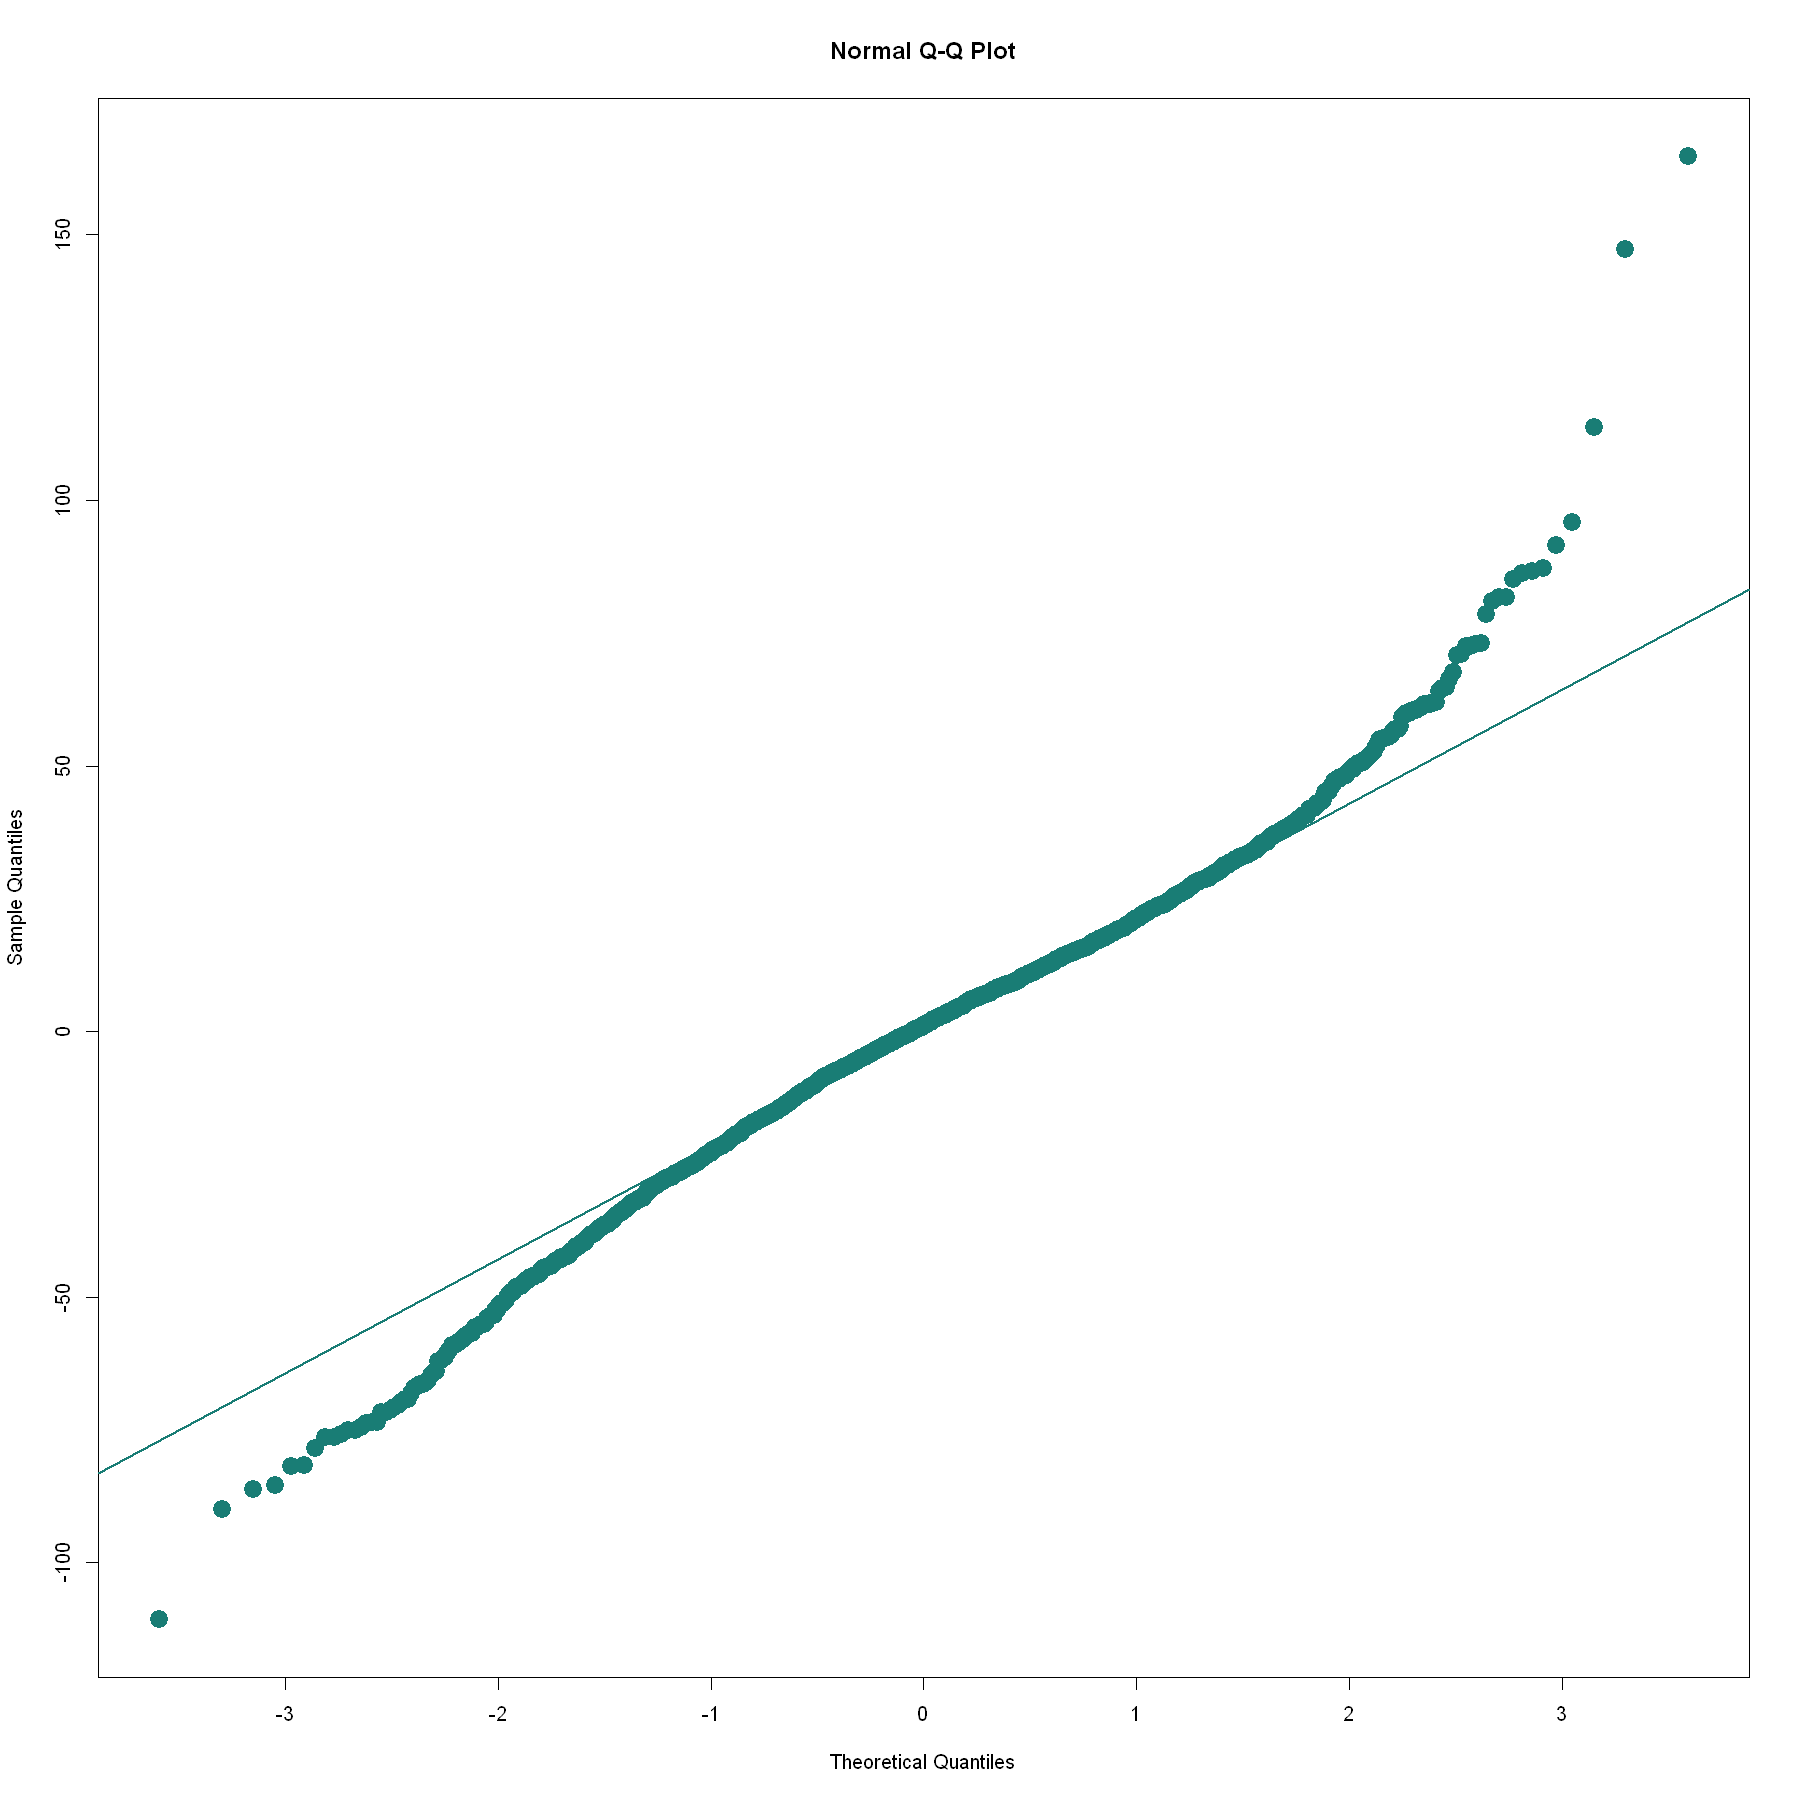

In [53]:
# Visualization
qqnorm(modelo_lm1$residuals,pch =19,col ="#197D75", cex=2)
qqline(modelo_lm1$residuals , col = "#197D75", lwd = 2 )  

# Statistical Test
shapiro.test(modelo_lm1$residuals)



	Shapiro-Wilk normality test

data:  modelo_lm2$residuals
W = 0.99127, p-value = 1.116e-12


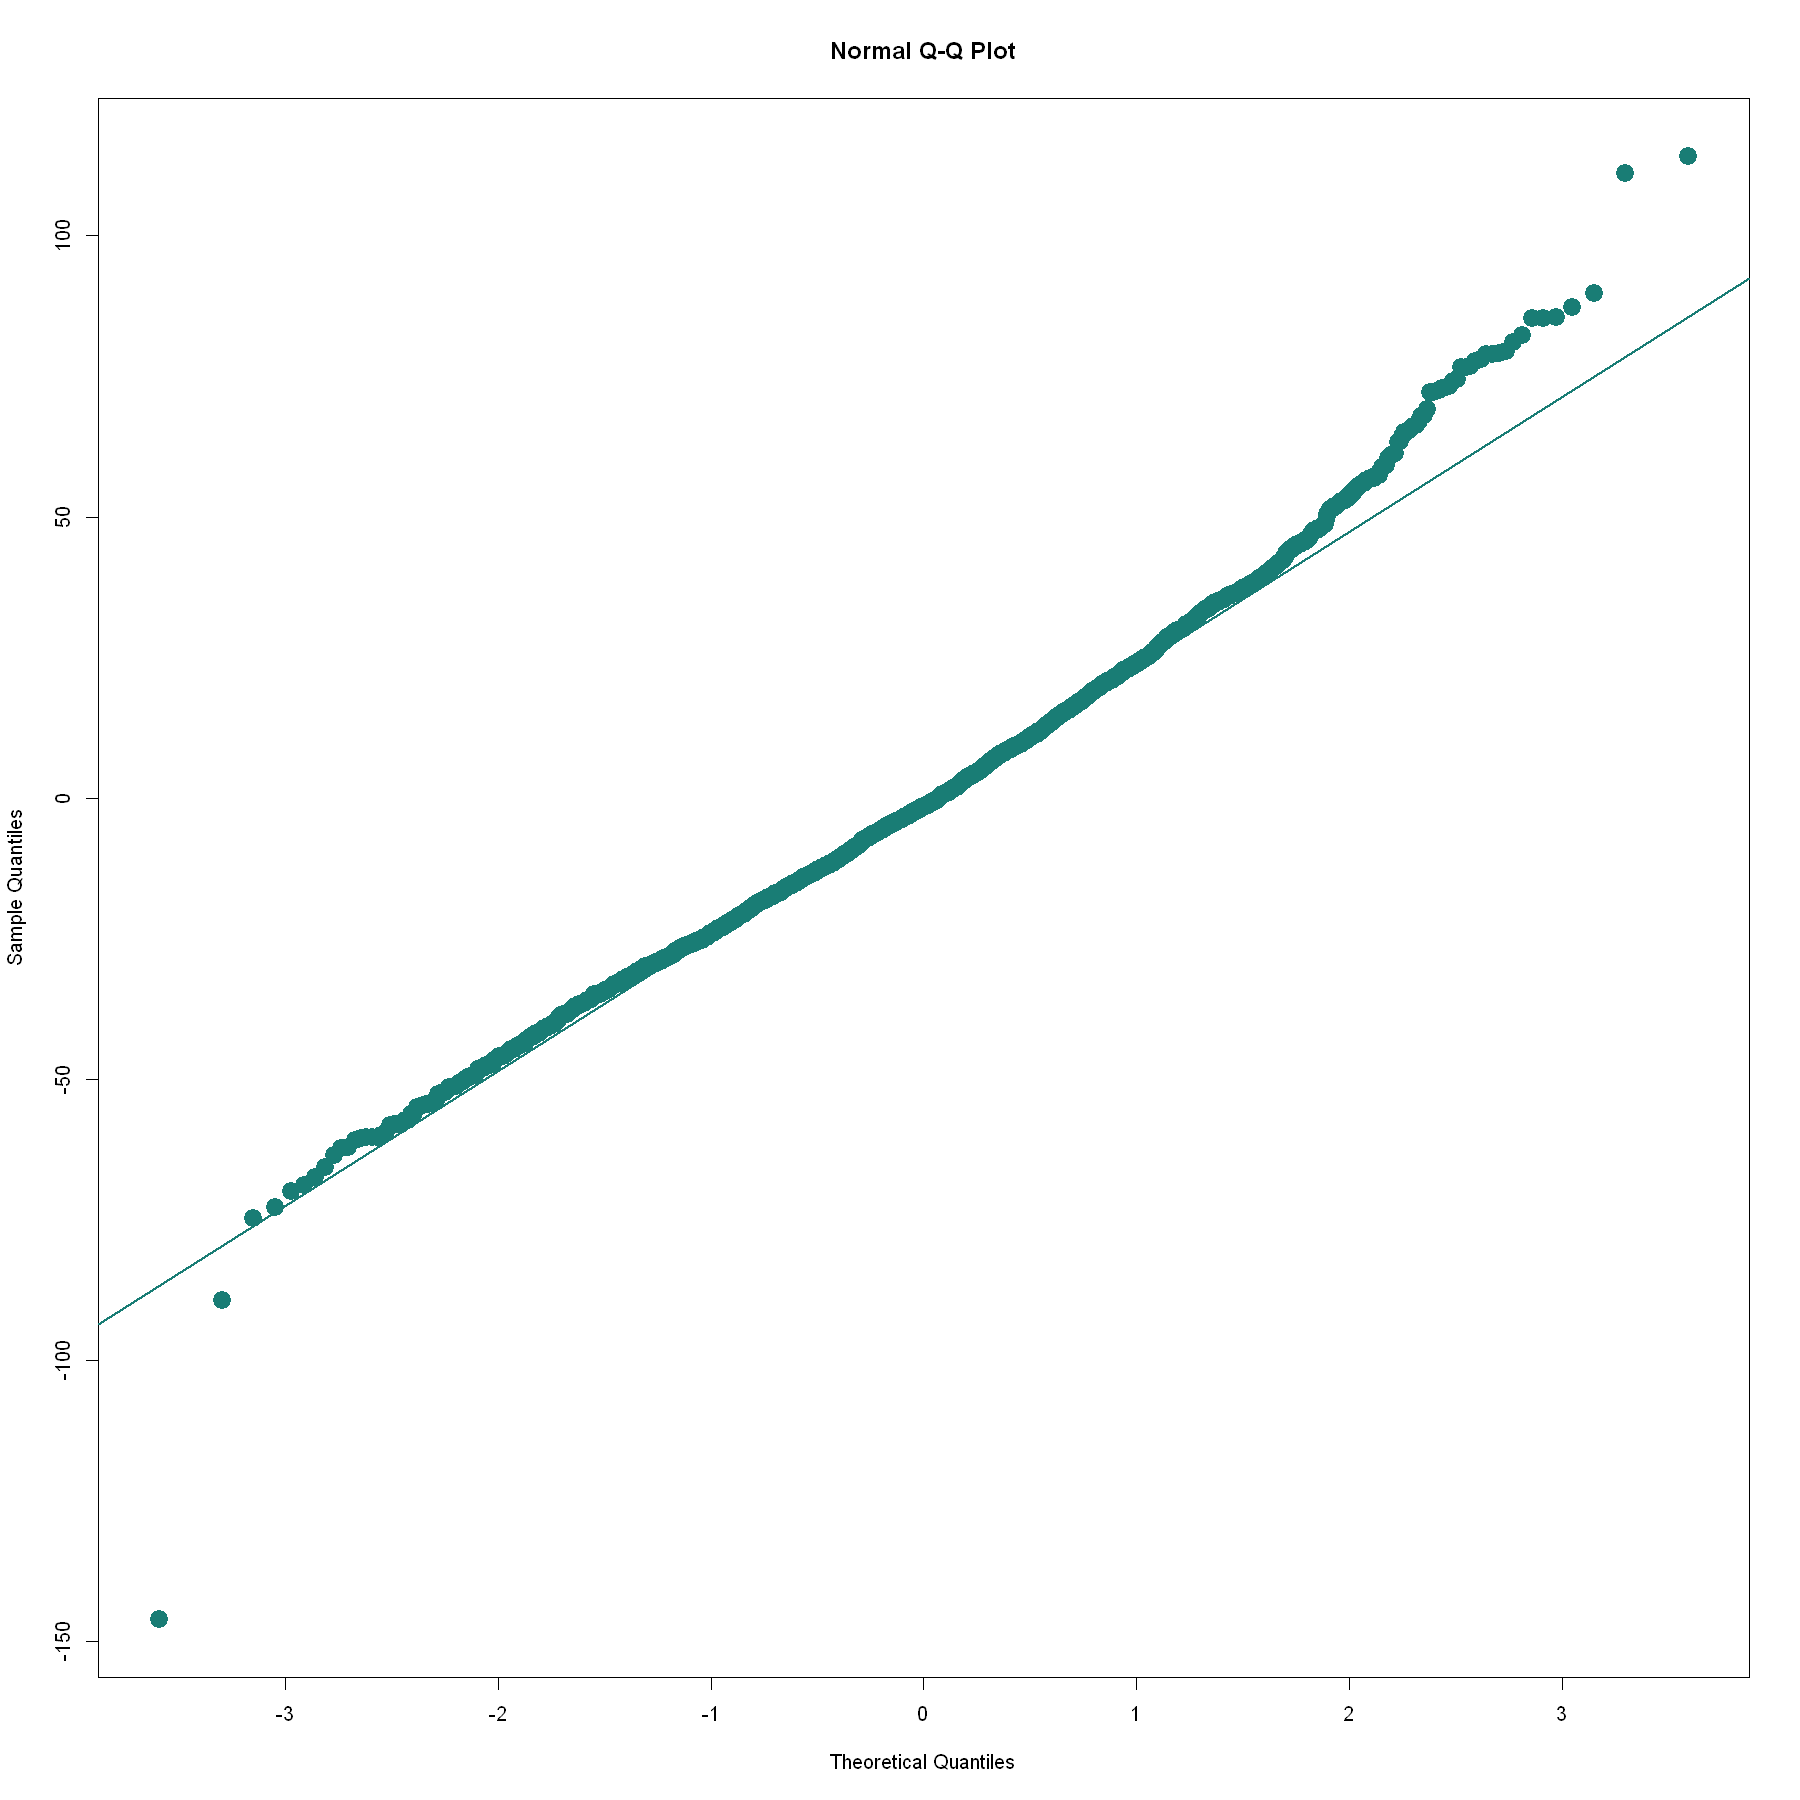

In [54]:
# Visualization
qqnorm(modelo_lm2$residuals,pch =19,col ="#197D75", cex=2)
qqline(modelo_lm2$residuals , col = "#197D75", lwd = 2 )  

# Statistical Test
shapiro.test(modelo_lm2$residuals)

#####
En ambos casos podemos confirmar que nuestros terminos de error siguen una distribucion normal. 

#### <font color='#197D75'>  2.2 Analisis de homocedasticidad </font>


La homocedasticidad es una propiedad que deseamos en nuestros modelos estadísticos, especialmente en los modelos de regresión. En términos sencillos, significa que la varianza de los errores del modelo debe ser constante a medida que cambian las variables que estamos estudiando. Para comprobar la homocedasticidad haremos dos cosas. La primera, generaremos una visualizacion de los residuos en comparacion con los valores ajustados. En segundo lugar, haremos un test estadistico llamado prueba de Breusch Pagan, quien nos confiramara la presencia o no de homocedasticidad en los errores de cada modelo.



	studentized Breusch-Pagan test

data:  modelo_lm1
BP = 46.849, df = 1, p-value = 7.668e-12


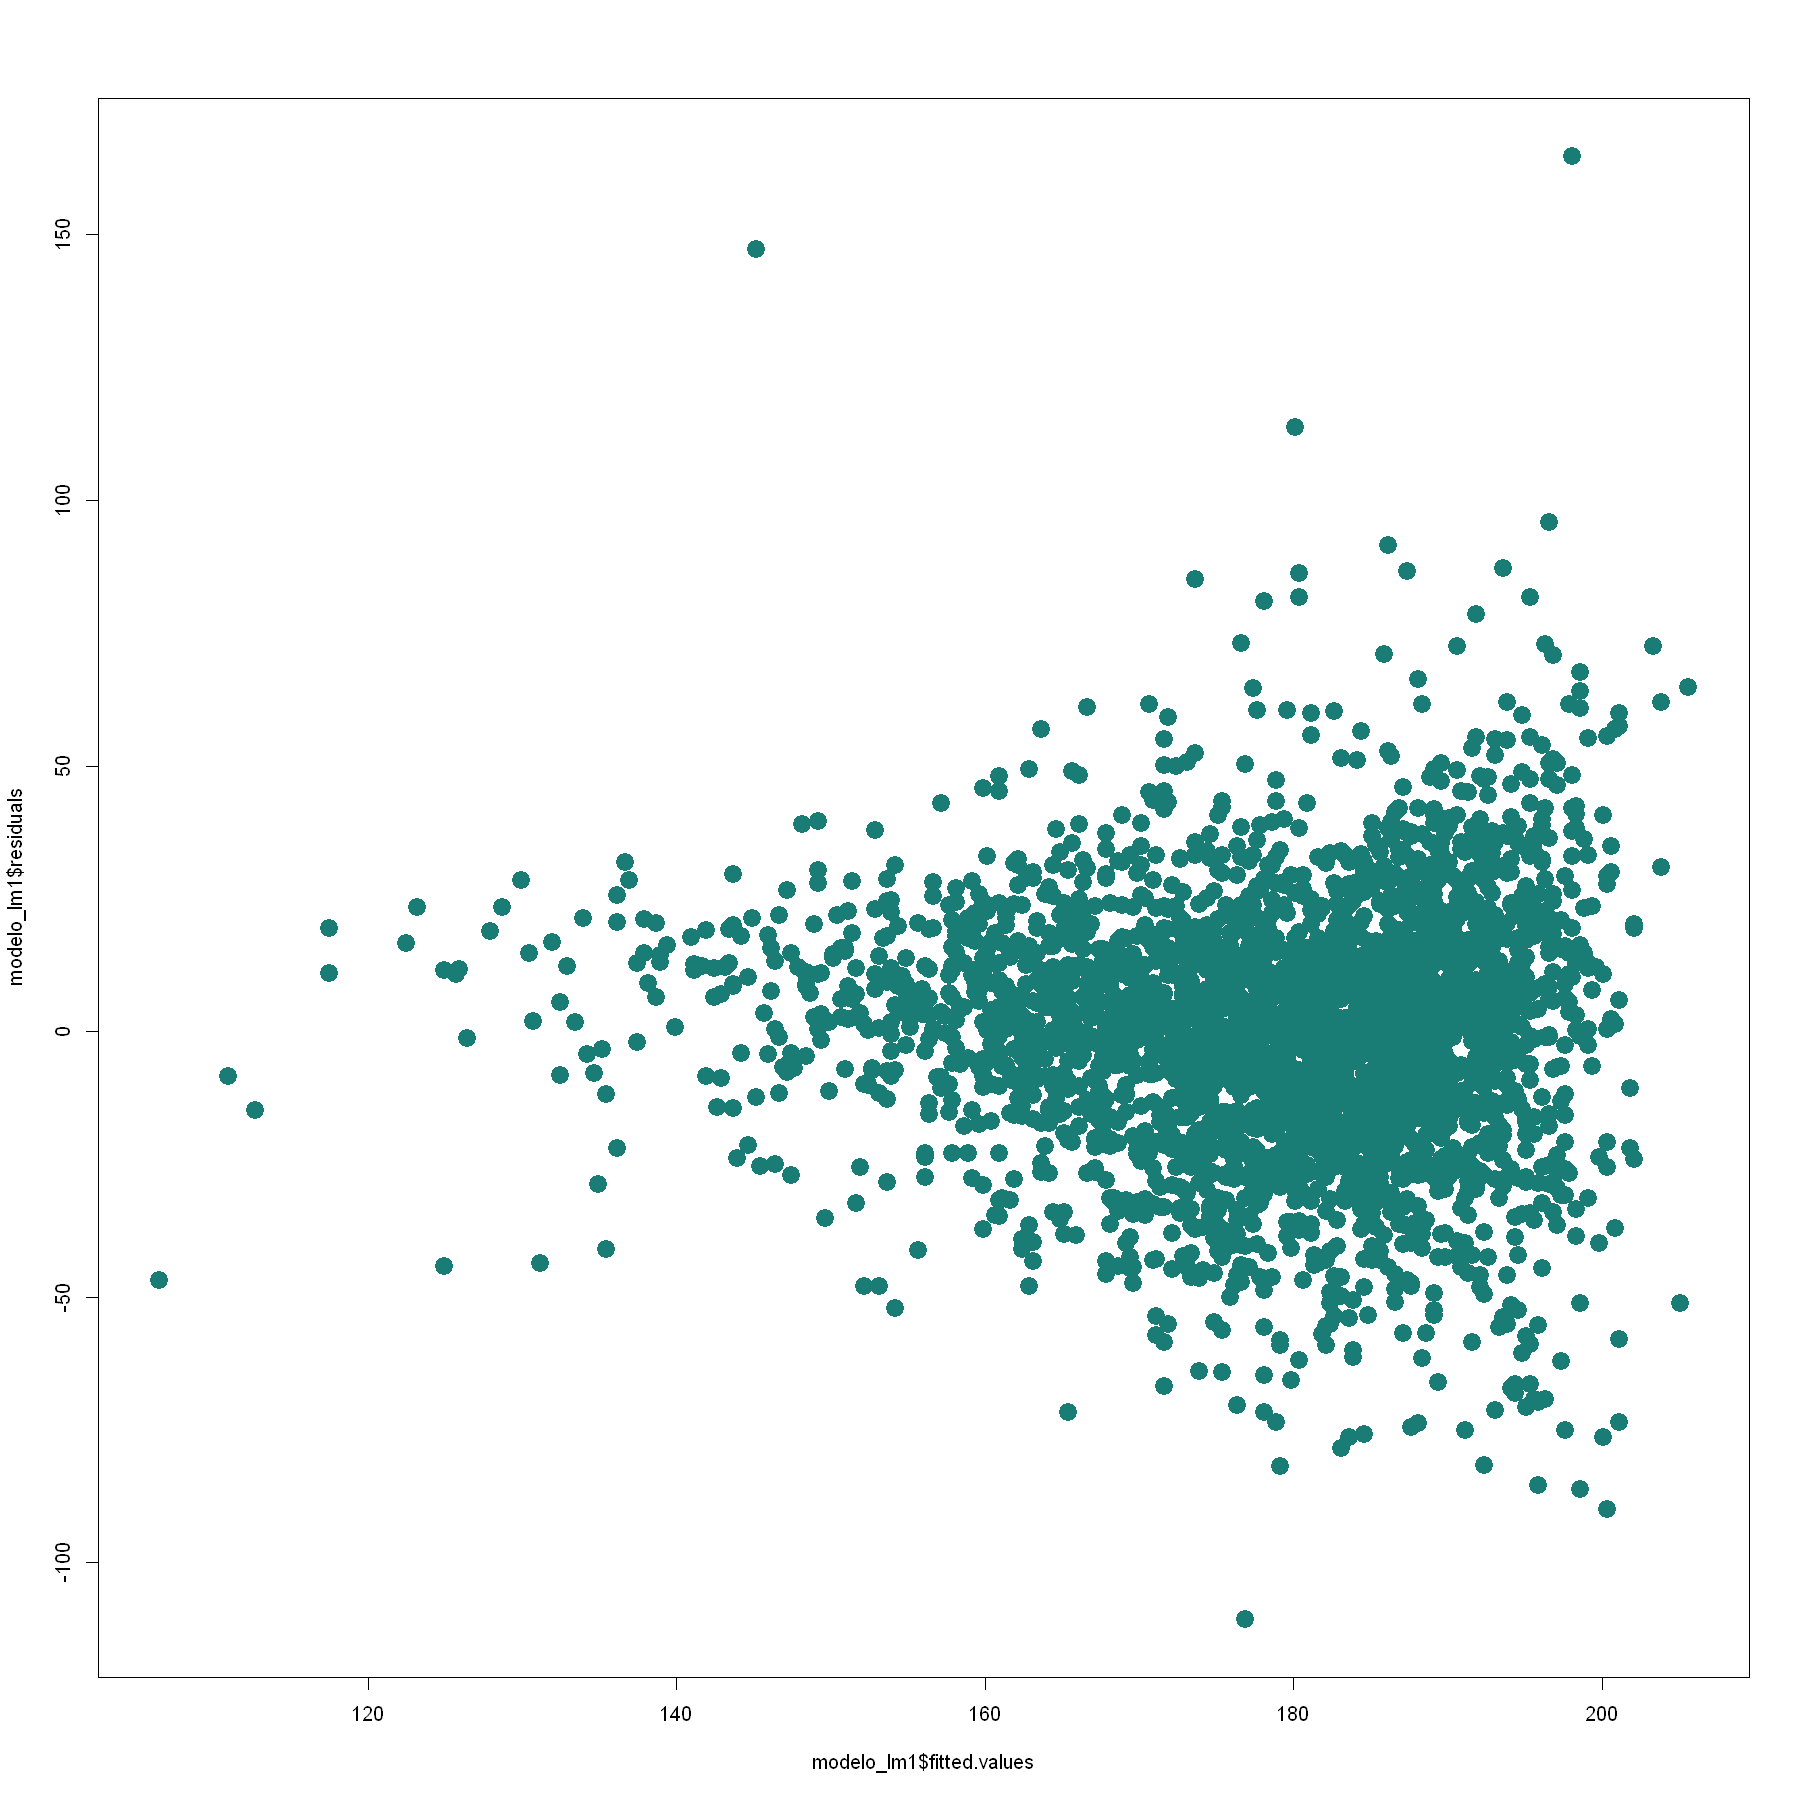

In [45]:
# Visualization
plot(modelo_lm1$fitted.values , modelo_lm1$residuals , pch =19,col ="#197D75", cex=2 )

# Test Breusch-Pagan
bptest(modelo_lm1)

####
El pvalor menor a 0,05 nos hace rechazar la hipotesis nula de homocedasticidad en residuos. La variable pctbachdeg25_over no cumple con este supuesto. Con lo cual aplicaremos una transformacion en dicha variable, pasandola a logaritmos, y volveremos a comprobar su homocedasticidad.


	studentized Breusch-Pagan test

data:  modelo_lm1
BP = 57.46, df = 1, p-value = 3.449e-14


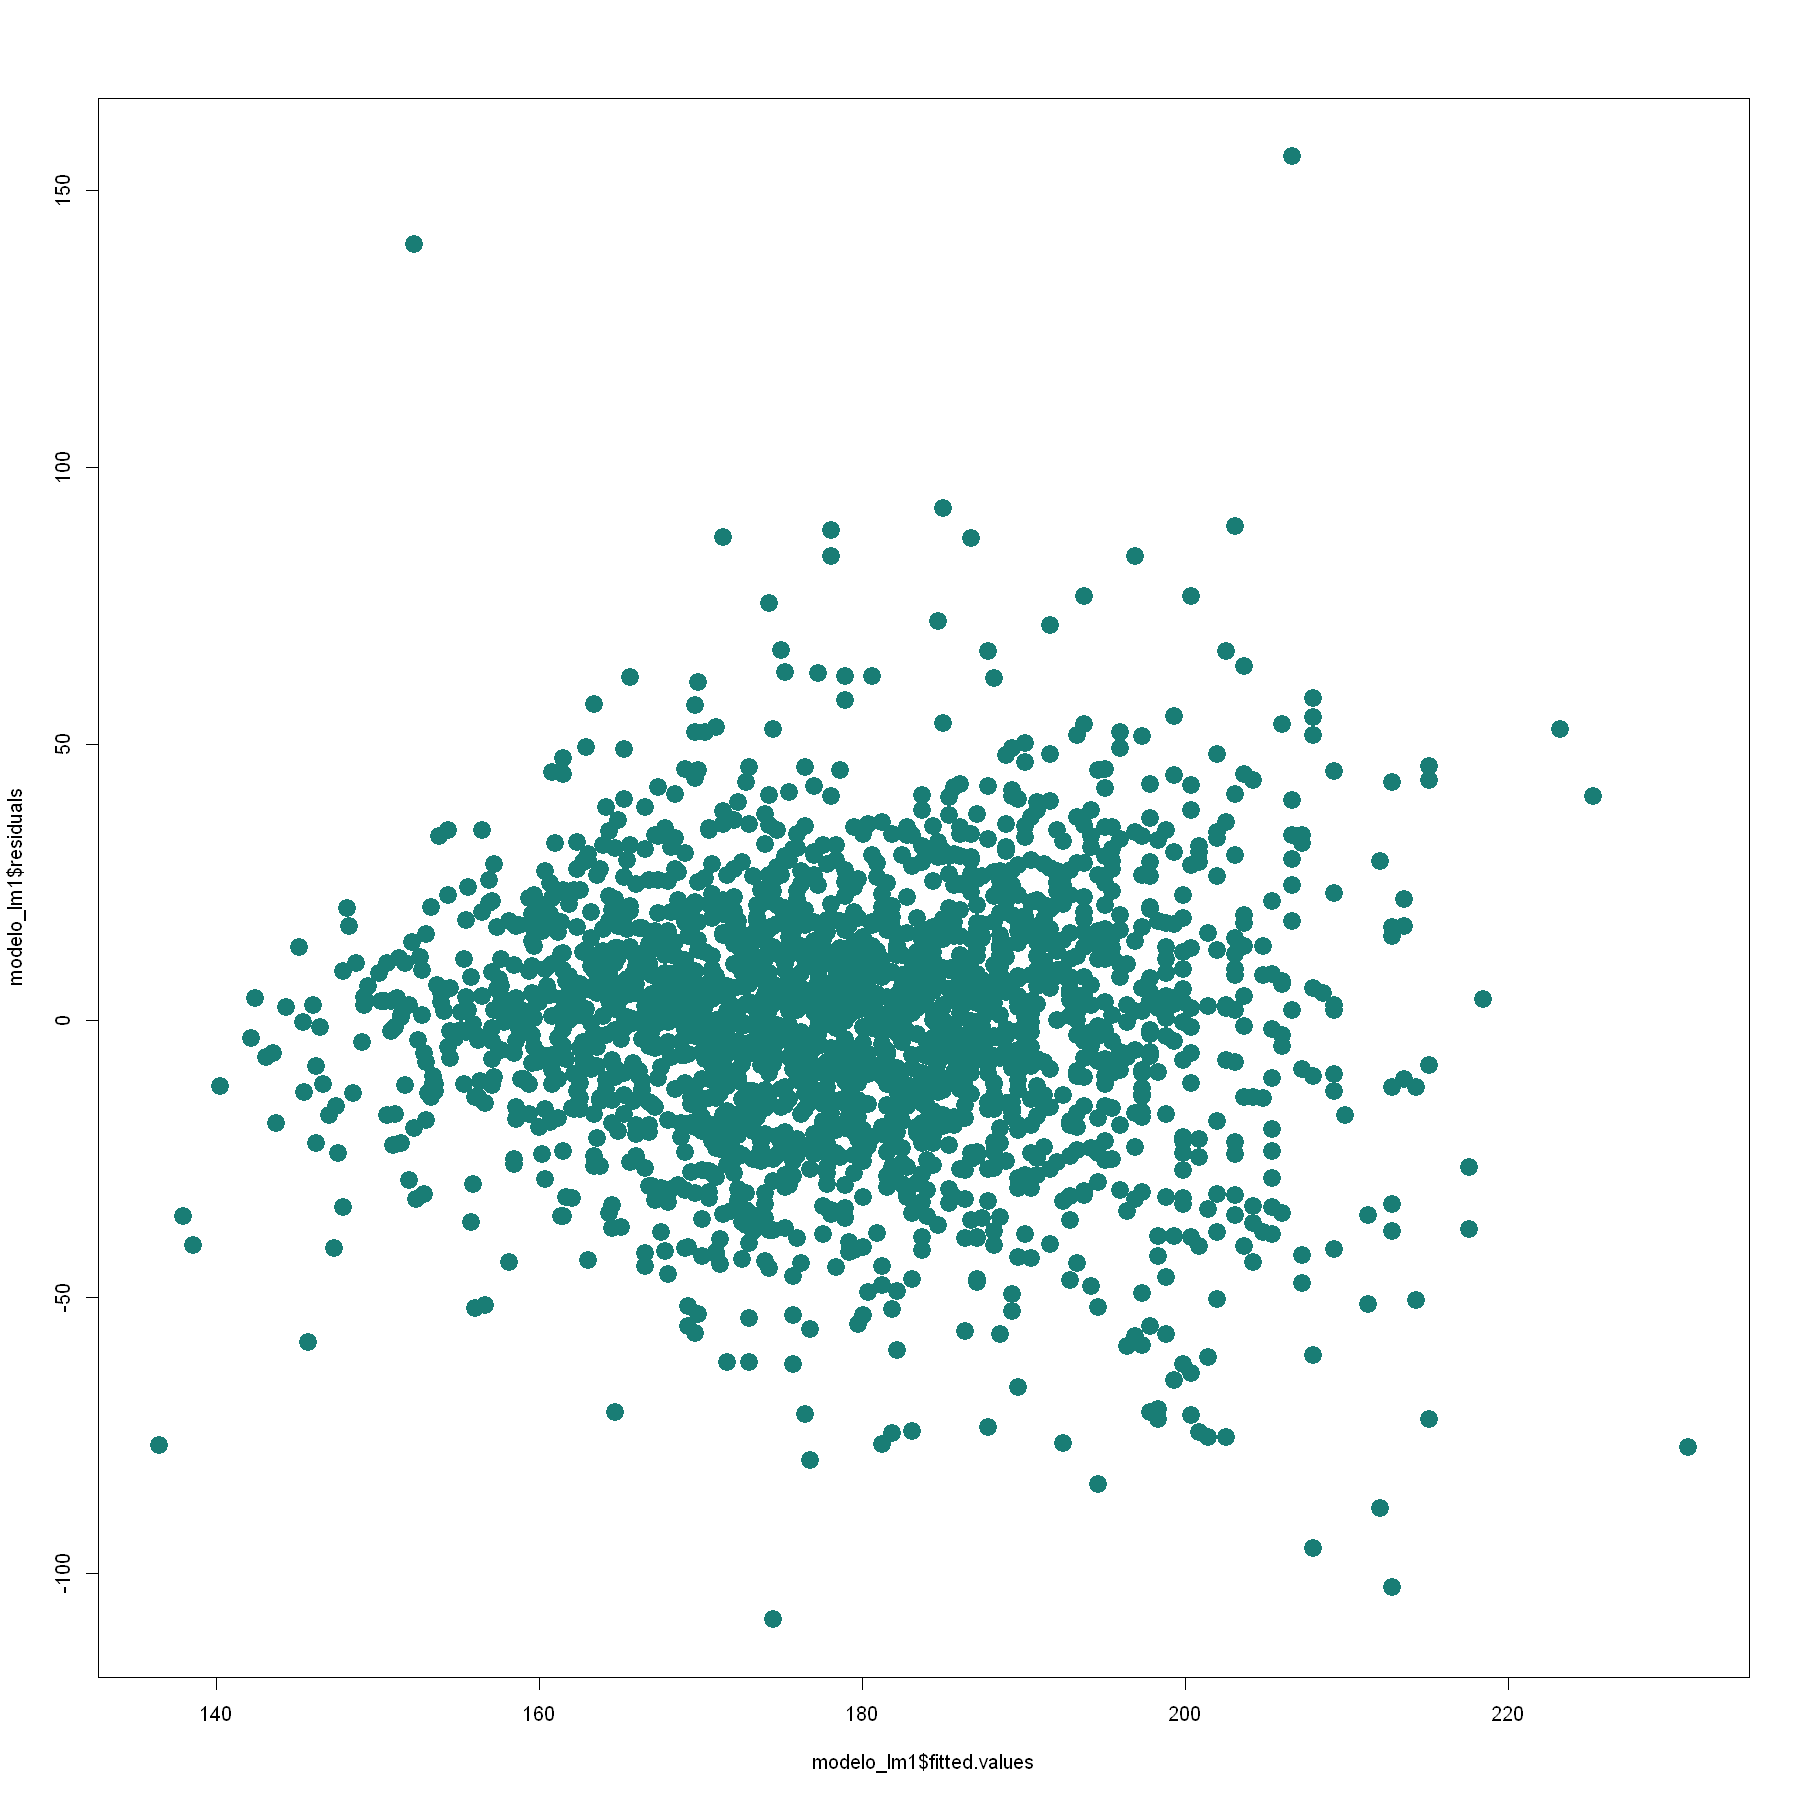

In [64]:
set.seed(21)

data_modelo_1 <- data3[, c("pctbachdeg25_over", "target_deathrate")]

# Conversión y Transformación
data_modelo_1$pctbachdeg25_over <- as.numeric(data_modelo_1$pctbachdeg25_over)
data_modelo_1$ln_pctbachdeg25_over <- log(data_modelo_1$pctbachdeg25_over)

# Creamos el data partition de la función caret con un 70-30 split
inTrain1 = createDataPartition(y = data_modelo_1$target_deathrate
                              ,p = 0.7
                              , list = FALSE
                              , times = 1)

data_train1  = data_modelo_1[inTrain1, ]
data_test1 = data_modelo_1[-inTrain1, ]

# Creamos el modelo solo con los datos de entrenamiento
modelo_lm1 <- lm(target_deathrate ~ ln_pctbachdeg25_over, data = data_train1)

# Visualization
plot(modelo_lm1$fitted.values , modelo_lm1$residuals , pch =19,col ="#197D75", cex=2 )

# Test Breusch-Pagan
bptest(modelo_lm1)


####
Nos da todavia peor, el modelo no cumple con el supuesto de homocedasticidad.


	studentized Breusch-Pagan test

data:  modelo_lm2
BP = 3.5756, df = 1, p-value = 0.05863


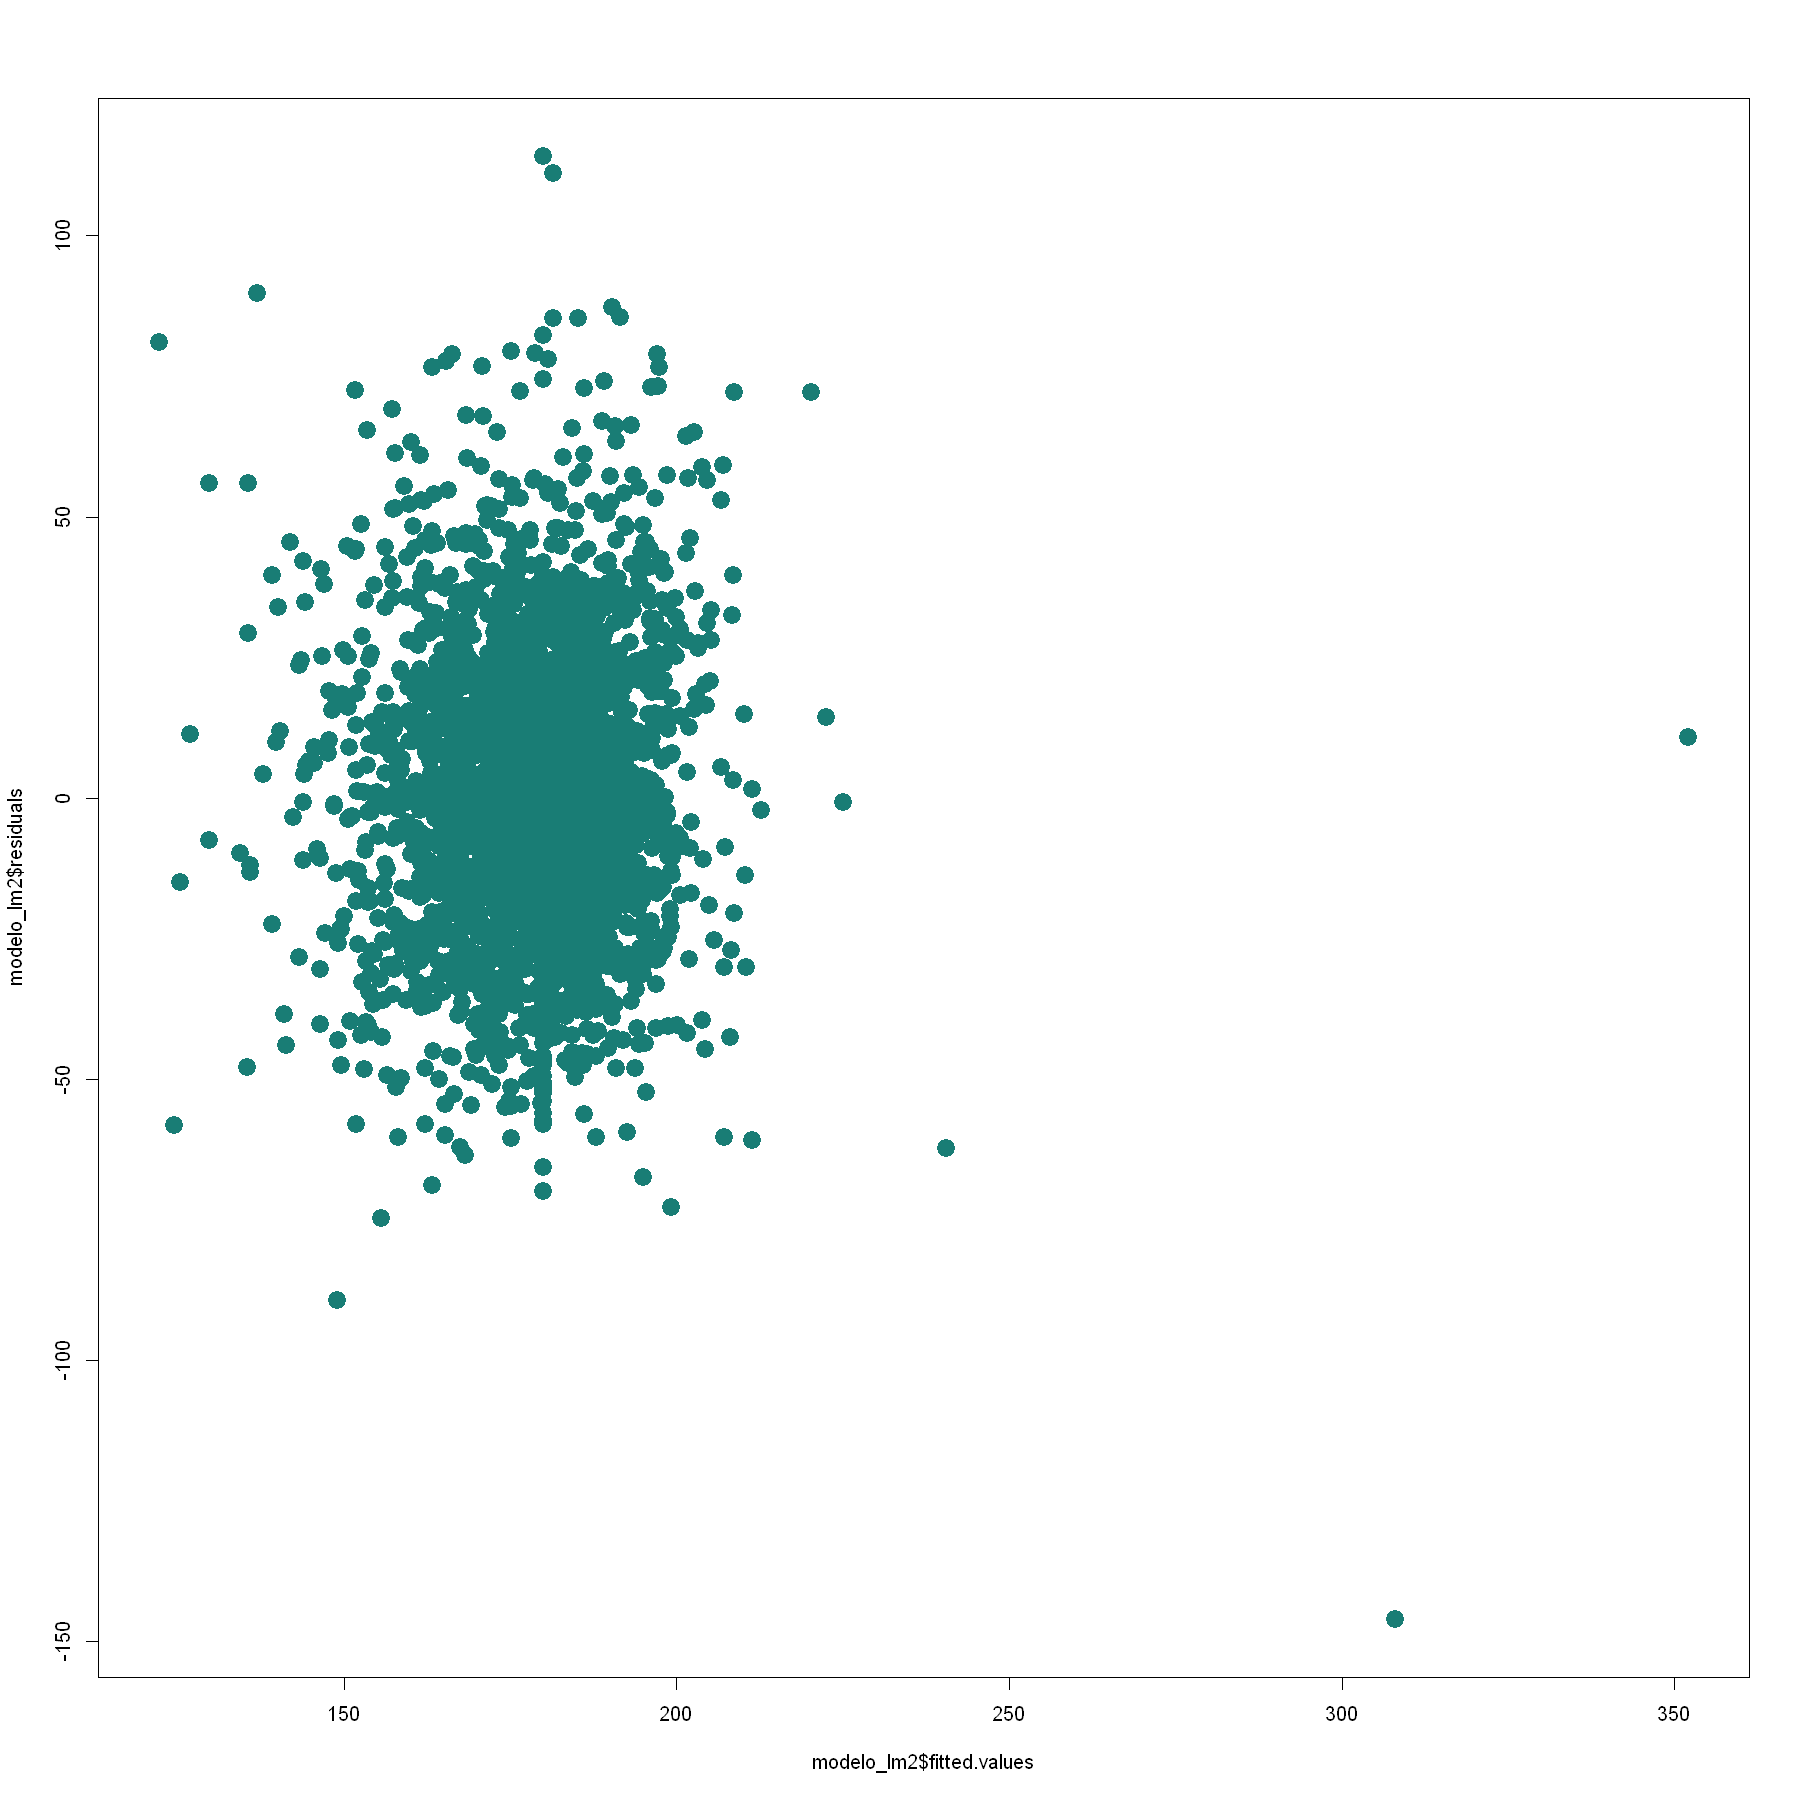

In [65]:
# Veamos que sucede para nuestro otro modelo:
# Visualization
plot(modelo_lm2$fitted.values , modelo_lm2$residuals , pch =19,col ="#197D75", cex=2 )

# Test Breusch-Pagan
bptest(modelo_lm2)

####
El pvalor es casi igual a 0,05, podriamos aceptar la hipotesis nula de homocedasticidad en residuos. La variable incidencerate cumple con este supuesto

#### <font color='#197D75'>  2.3 Analisis de autocorrelacion </font>

La autocorrelación de errores nos ayuda a identificar ciertos patrones temporales en los residuos del modelo, lo que podría indicar que el modelo no está capturando completamente la estructura temporal de los datos. Para comprobar la autocorrelacion haremos dos cosas. La primera, generaremos una visualizacion de los residuos en comparacion con la orden de toma de decisiones. En segundo lugar, haremos un test estadistico llamado prueba de Durbin-Watso, quien nos confiramara la presencia o no de autocorrelacion en los errores de cada modelo.


	Durbin-Watson test

data:  modelo_lm1
DW = 1.5616, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


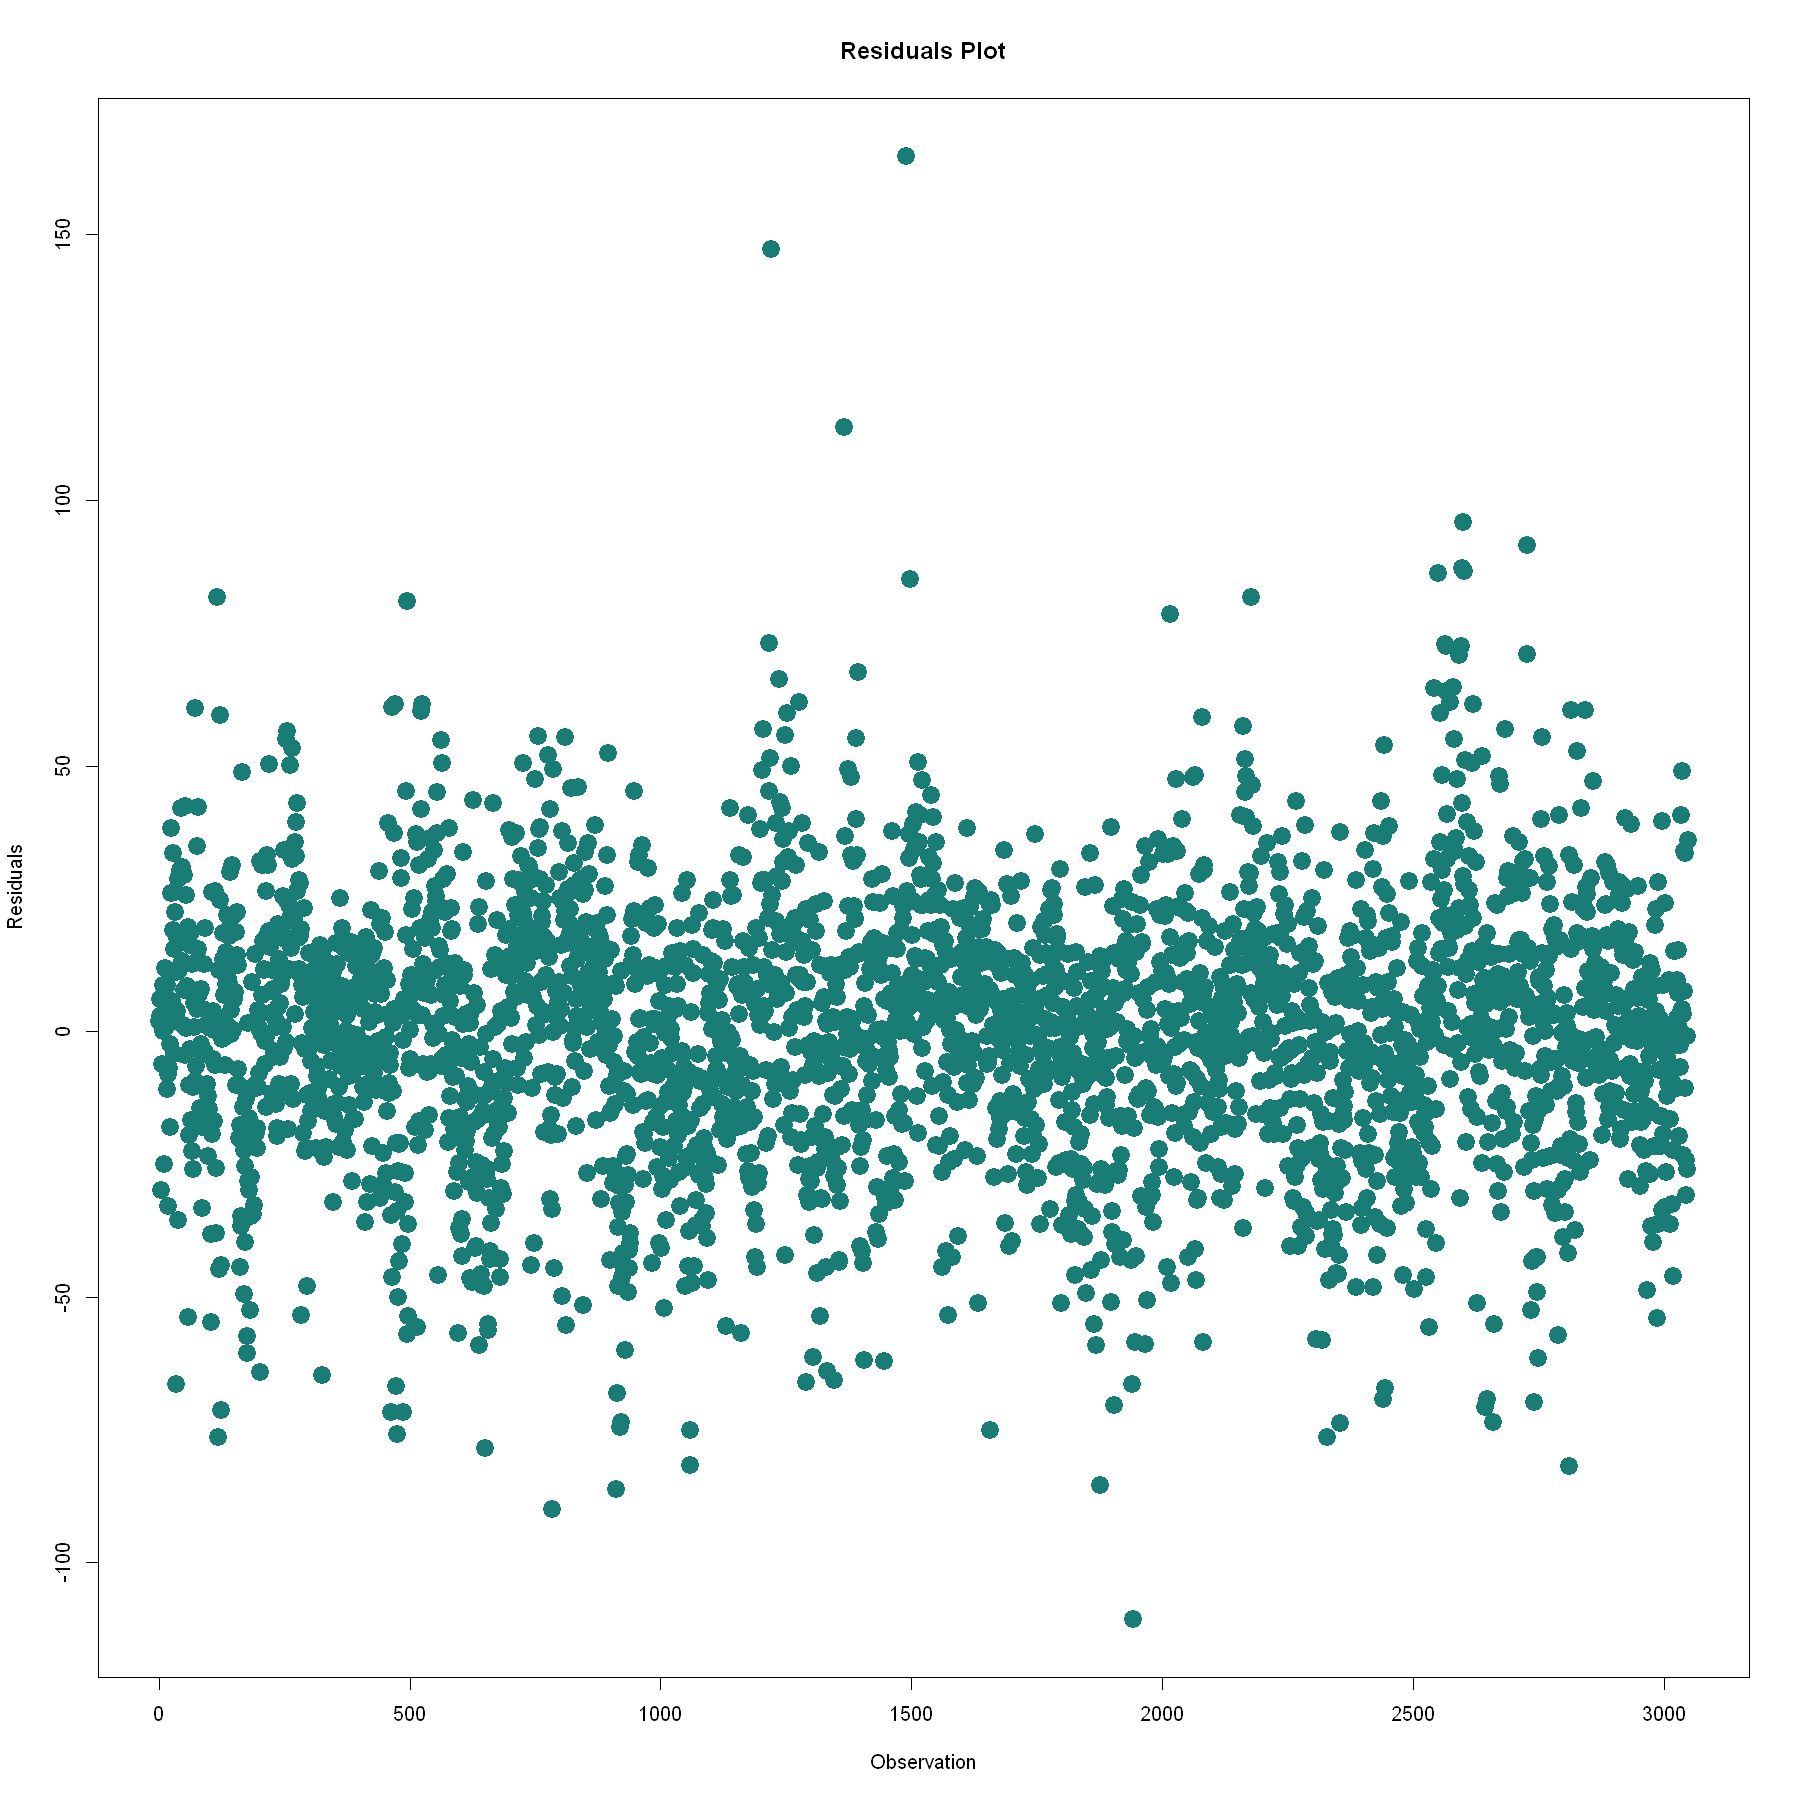

In [38]:
# Visualization
plot(modelo_lm1$residuals, pch = 19, col = "#197D75", cex = 2,
     xlab = "Observation", ylab = "Residuals", main = "Residuals Plot")

# Statistical Test
dwtest(modelo_lm1,  alternative = c("two.sided"))


####
El pvalor menor a 0.05, hace que rechacemos la hipótesis nula, es decir, los errores no tienen varianza constante. Los errores estan correlacionados.


	Durbin-Watson test

data:  modelo_lm2
DW = 1.4441, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


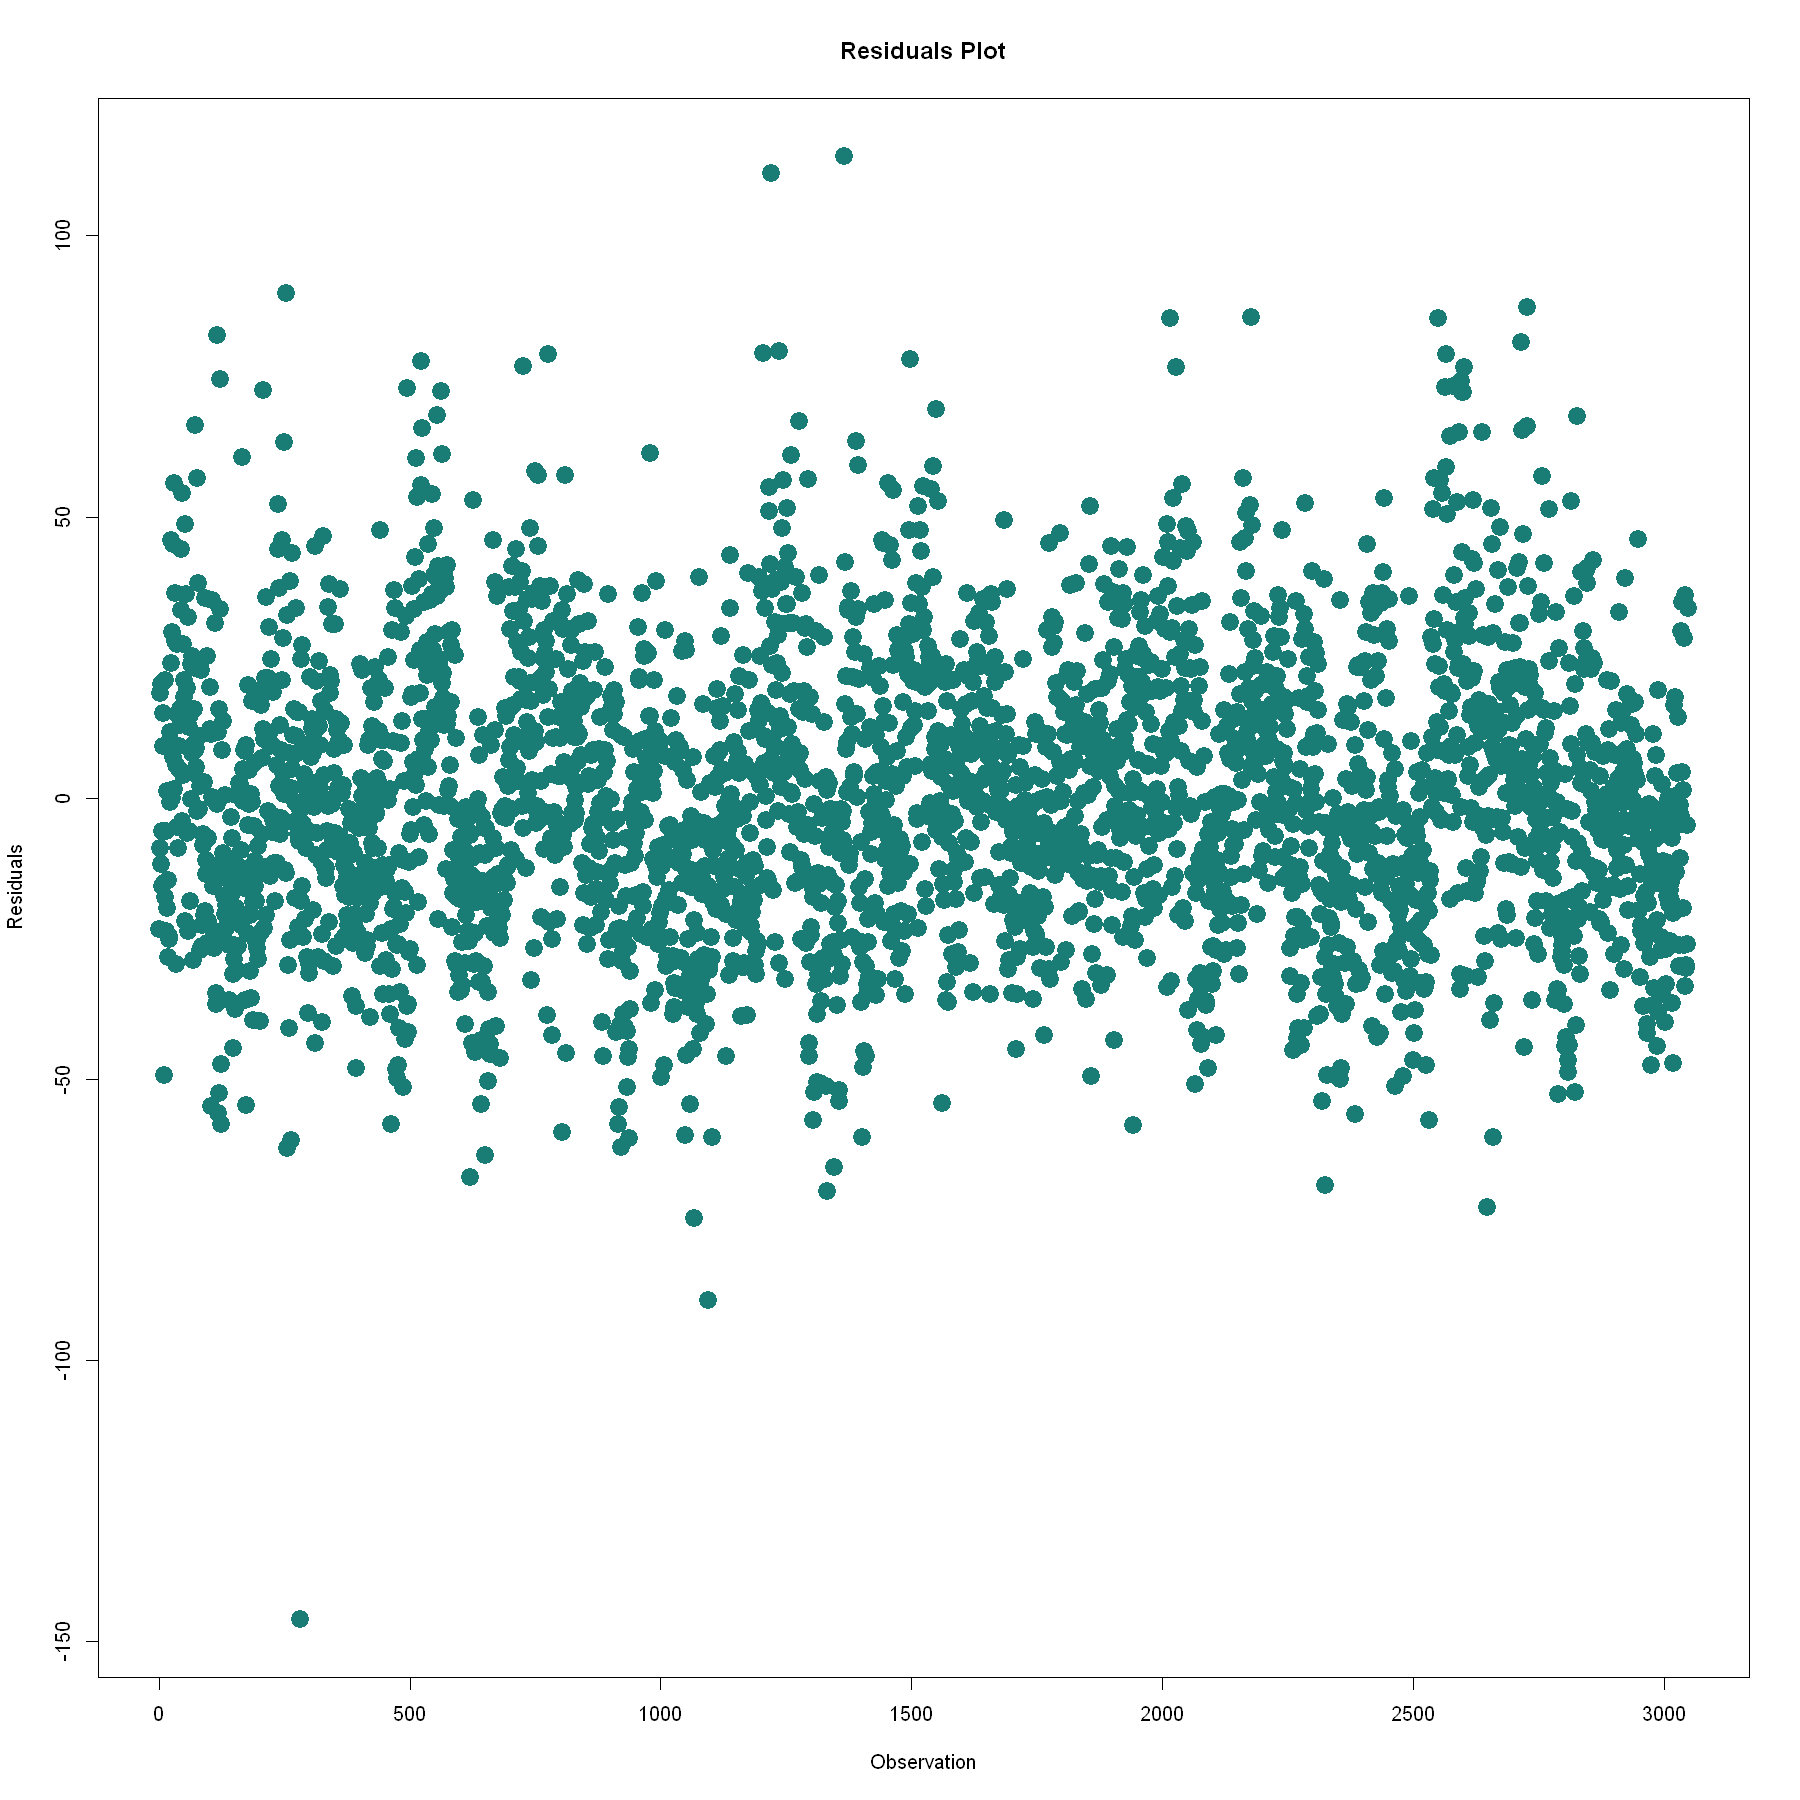

In [39]:
# Visualization
plot(modelo_lm2$residuals, pch = 19, col = "#197D75", cex = 2,
     xlab = "Observation", ylab = "Residuals", main = "Residuals Plot")

# Statistical Test
dwtest(modelo_lm2,  alternative = c("two.sided"))

####
El pvalor menor a 0.05, hace que rechacemos la hipótesis nula, es decir, los errores no tienen varianza constante. Los errores estan correlacionados.

#### <font color='#197D75'> 2.4 Media de los errores: </font>

In [68]:
# Calcular la media de errores
media_residuos1 = mean(modelo_lm1$residuals)
media_residuos2 = mean(modelo_lm2$residuals)

print(media_residuos1)
print(media_residuos2)

[1] -7.083019e-17
[1] -1.556091e-15


####
El resultado nos dice que la media de los errores es aproximadamente cero.

#### <font color='#197D75'> 2.5 Detección de Outliers: </font>

La presencia de outliers es muy importante ya que puede repercutir con la estimacion de nuestro modelo, sobre todo con el supuesto de homocedasticidad en el termino de error de nuestro modelo. Ya habiamos visto que las variables presentaban ciertos valores inusuales o por fuera del rango intercuartilico. Sobre todo es importante esto para el primer modelo donde el supuesto de homocedasticidad estaba totalmente incumplido.

[1] 0.0436984
[1] 5.73658e-05


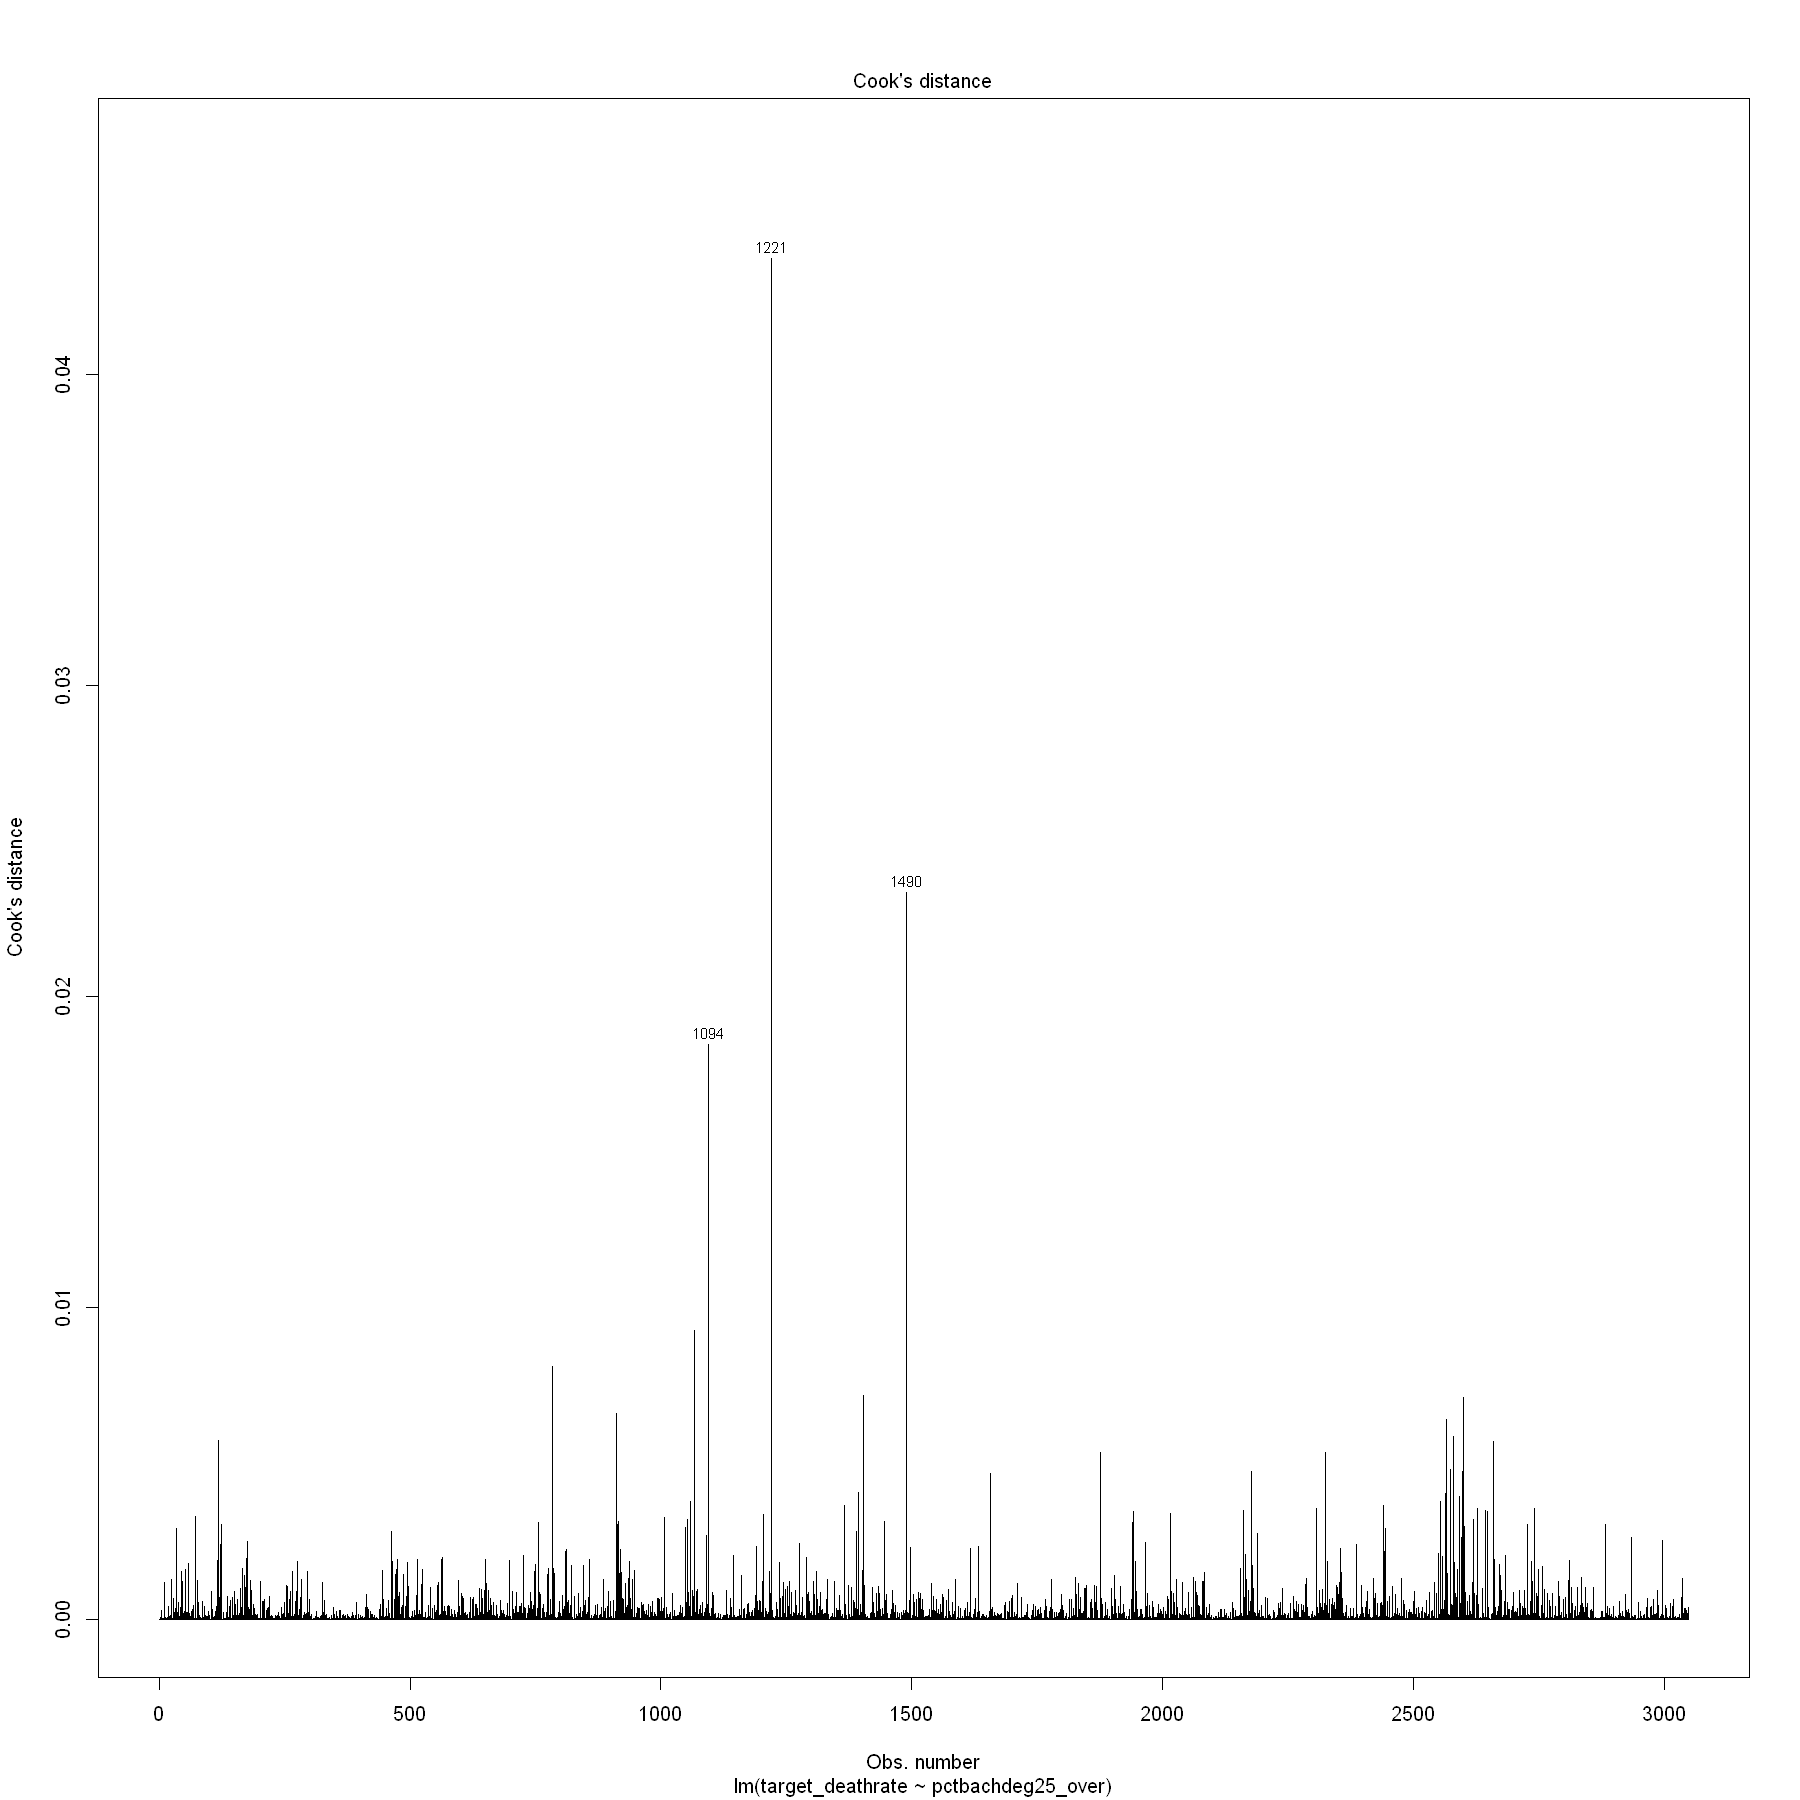

In [40]:
# Visualization (Cook's distance plot)
plot(modelo_lm1 , 4)
# Statistical Measure: 
model_dm1 = augment(modelo_lm1)

# Checking Highest Cook's distance
Cook_distance = max(model_dm1$.cooksd)
Cook_distance_critic = 4 * Cook_distance / n_distinct(data3)

print(Cook_distance)
print(Cook_distance_critic)

[1] 0.6639622
[1] 0.0008716274


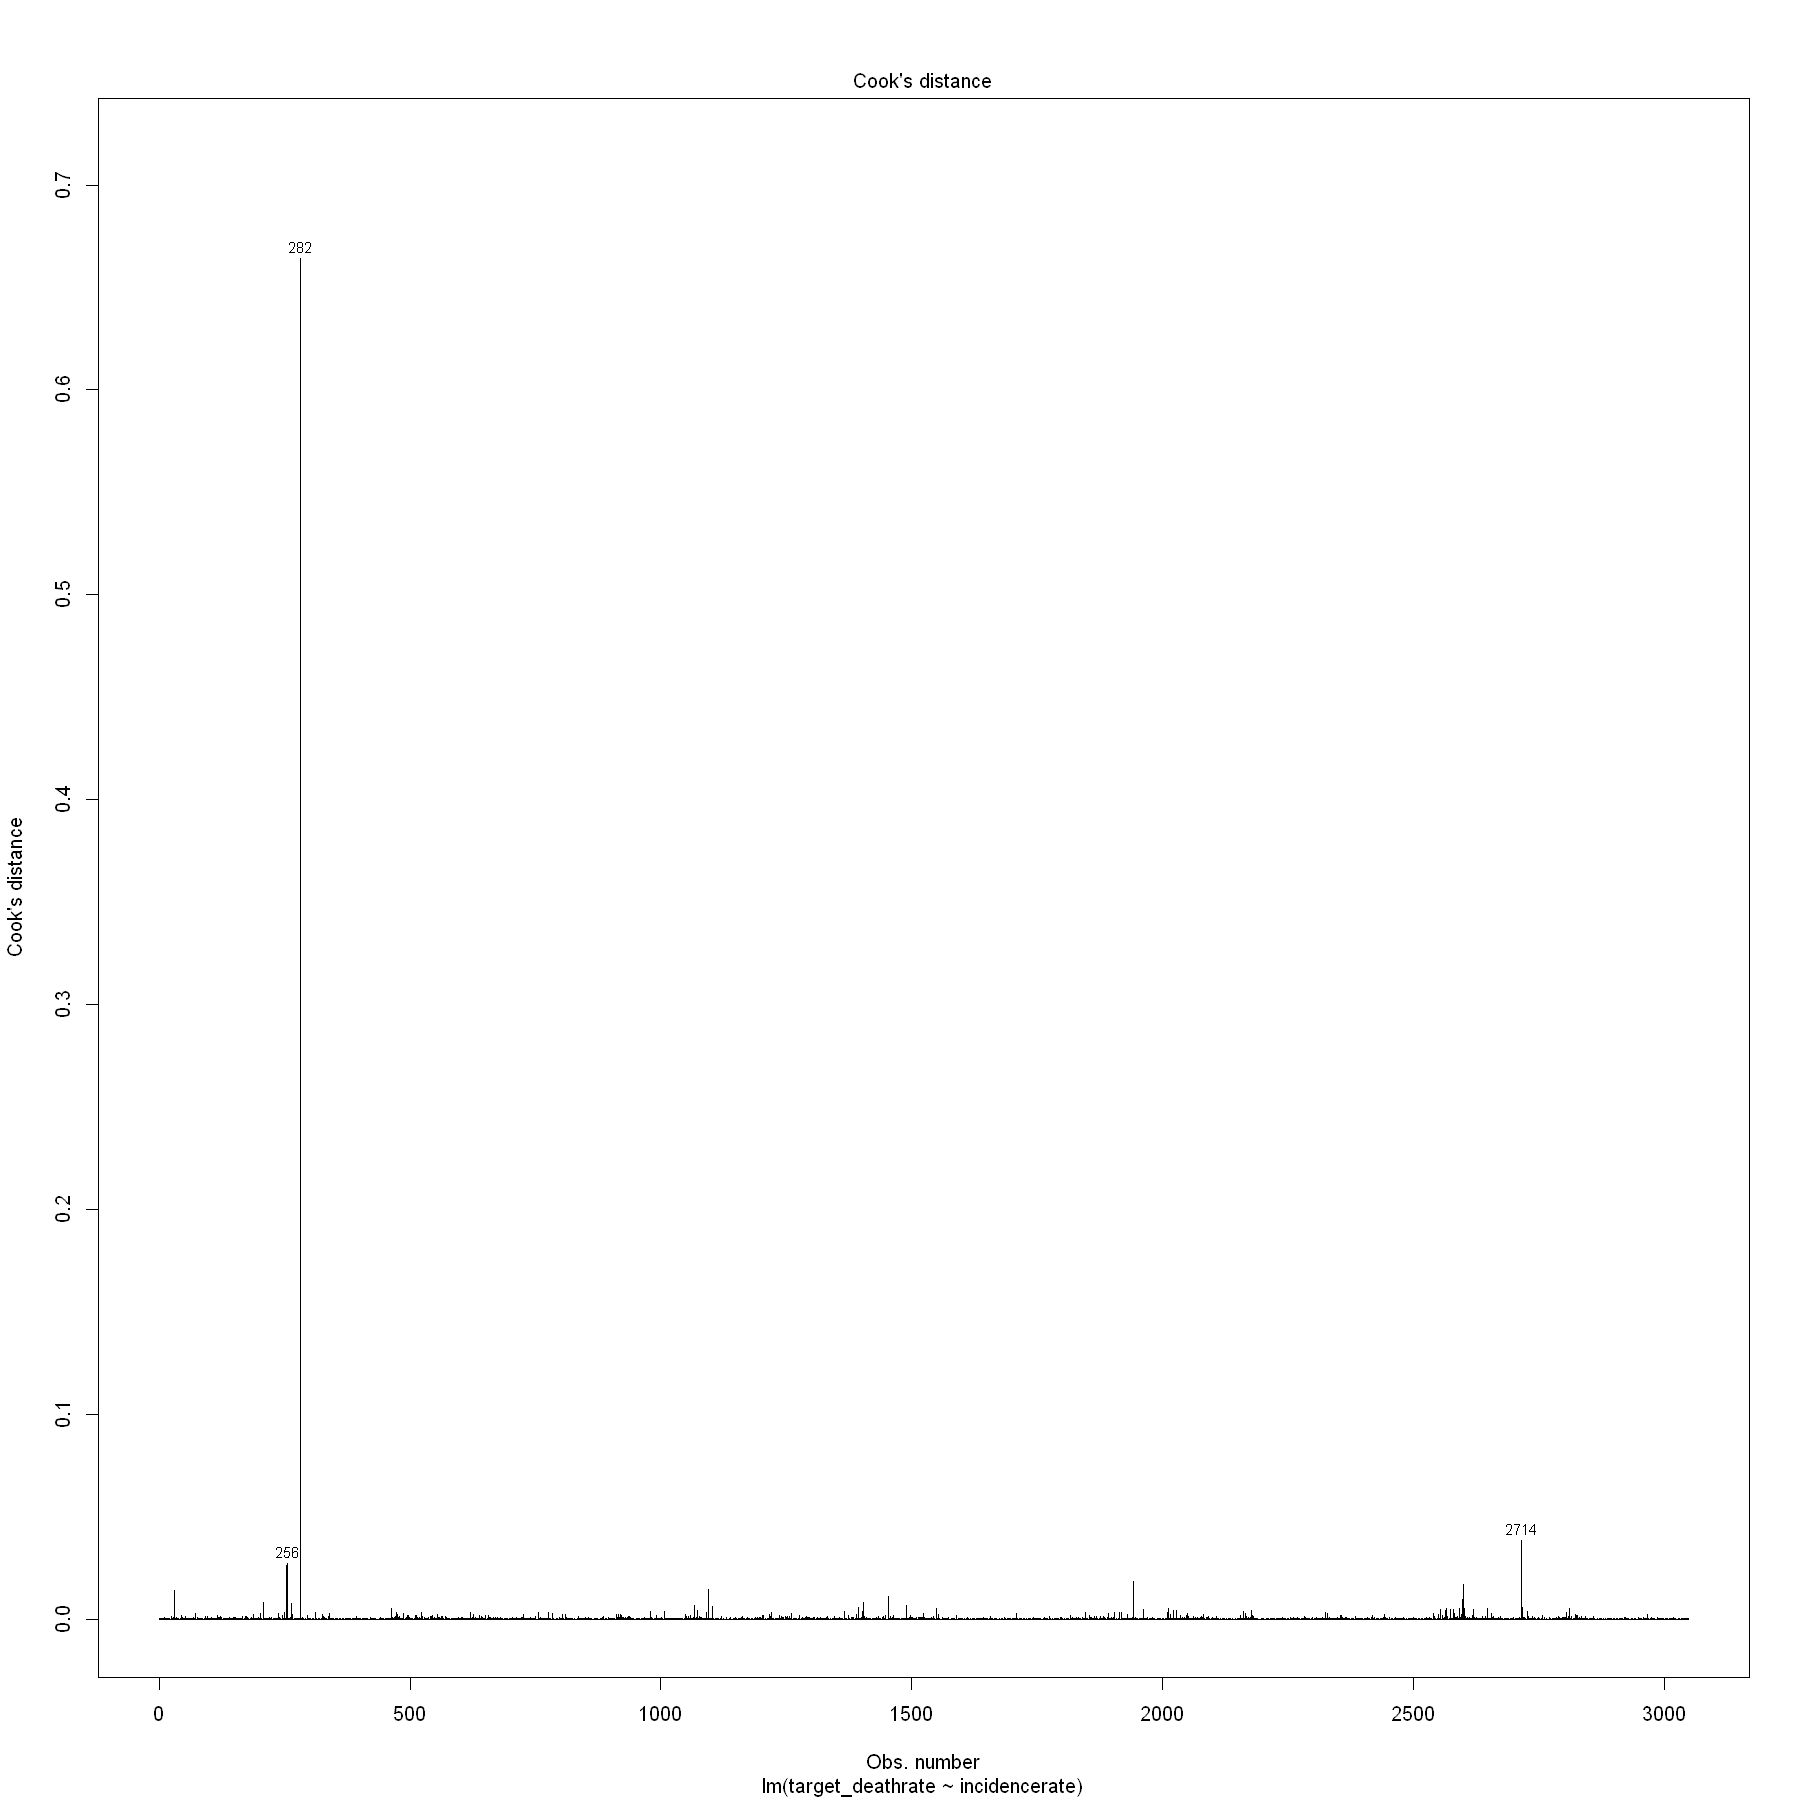

In [69]:
# Visualization (Cook's distance plot)
plot(modelo_lm2 , 4)
# Statistical Measure: 
model_dm2 = augment(modelo_lm2)

# Checking Highest Cook's distance
Cook_distance = max(model_dm2$.cooksd)
Cook_distance_critic = 4 * Cook_distance / n_distinct(data3)

print(Cook_distance)
print(Cook_distance_critic)

####
En el modelo 1 vemos una mayor presencia de outliers, esto es logico con el resultado obtenido de heterocedasticidad en los terminos de errores. Es muy probable que los outliers se esten cargando este supuesto. En el modelo 2 habiamos aceptado homocedasticidad, aunque por un margen de significatividad muy pequenio, aqui vemos tambien la presencia de algunos outliers que pueden estar elevando el pvalor de dicho test. Con el test de la distancia de Cook confirmamos la presencia de outliers, ya que es mayor que 4/N en ambos casos, por lo tanto, hay Outliers en el conjunto de datos dado.

En ambos casos Cook_distance > Cook_distance_critic -> HAY OUTLIERS

#### <font color='#197D75'>  **Conclusion de nuestros supuestos** </font>

El modelo numero 1 de pctbachdeg25_over cumple con normalidad en la distribucion del termino de error, y en una media del termino de error cercana a cero. Pero viola los supuestos de homocedasticidad y autocorrelacion del termino de error. Esto puede ser por la presencia de outliers que se esten cargando la varianza inconstante del termino de error, repercutiendo directamente sobre la homocedasticidad.

El modelo numero 2 de incidencerate cumple con normalidad en la distribucion del termino de error, en una media del termino de error cercana a cero y podemos aceptar de manera muy justa la presencia de homocedasticidad (recordemos que por muy poco el pvalue del test da por encima de 0,05). Aunque viola el supuesto autocorrelacion del termino de error. La presencia de autocorrelación puede afectar la validez de las pruebas estadísticas y llevar a estimaciones sesgadas de los parámetros del modelo. 

### <font color='#197D75'>  Validamos nuestro modelo </font>

Escogemos para validar el modelo numero 2. Sabemos que al no cumplir con el supuesto de autocorrelacion los términos de errores no son independientes entre sí y que hay alguna estructura de correlación sistematica en los residuos del modelo. En otras palabras, los errores no son aleatorios y muestran algun patrón de dependencia temporal. Esto nos determina que no hay resultado predictivo que sea significativo. Utilizamos el conjunto de datos para evaluar el rendimiento del modelo. Este conjunto de datos "ciego" nos permite entender qué tan bien el modelo se desempeña en datos que no ha visto previamente.

R2,RMSE,MAE
<dbl>,<dbl>,<dbl>
0.1681902,25.06698,19.64907


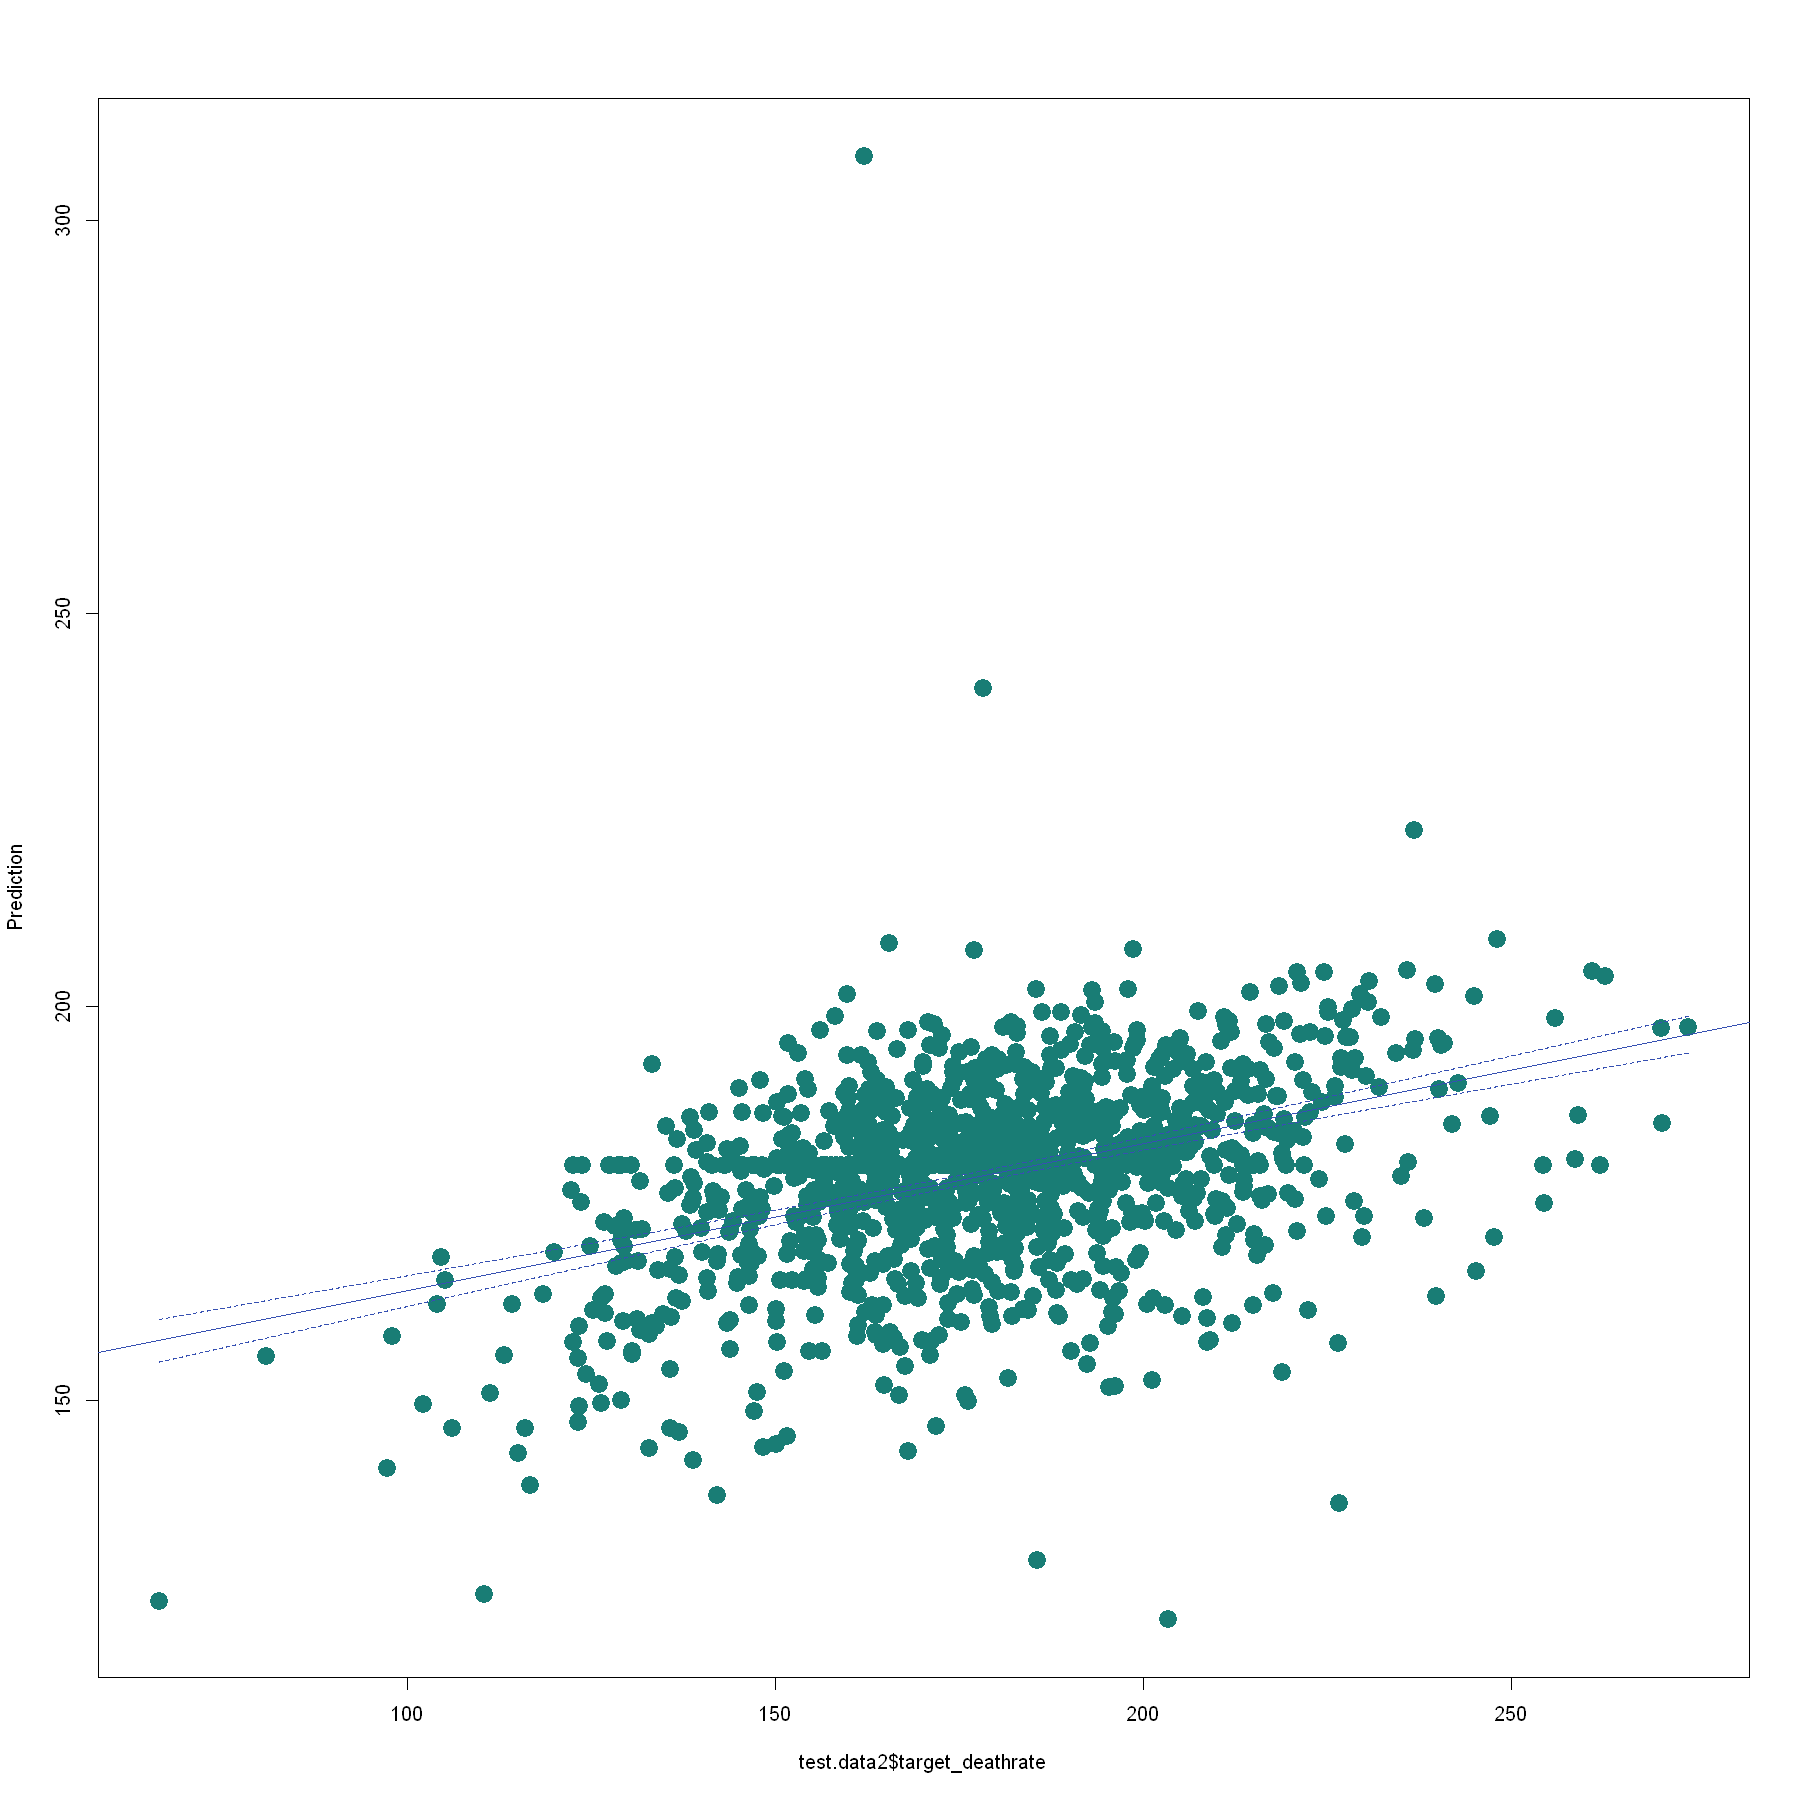

In [71]:
# Making prediction
prediction = predict(modelo_lm2, data_test2)

### Visualization
plot(data_test2$target_deathrate, prediction, xlab="test.data2$target_deathrate", ylab="Prediction", pch =19,col ="#197D75", cex=2)

#add fitted regression line
lm.out = lm(prediction ~ target_deathrate, data = data_test2)
newx = seq(min(data_test2$target_deathrate),max(data_test2$target_deathrate),by = 0.05)
conf_interval = predict(lm.out, newdata=data.frame(target_deathrate=newx), interval="confidence", level = 0.95)
abline(lm.out, col = "#3650b2")

#add conf_interval lines
lines(newx, conf_interval[,2], col="#3650b2", lty=2)
lines(newx, conf_interval[,3], col="#3650b2", lty=2)

# Statistical Measure
data.frame( R2 = R2(prediction, data_test2$target_deathrate),
            RMSE = RMSE(prediction, data_test2$target_deathrate),
            MAE = MAE(prediction, data_test2$target_deathrate))

####
<font color='#197D75'>**R2:**</font> se obtiene un 0.1681902	, aproximadamente 17% de la variabilidad de mi variable respuesta target_deathrate es explicada por el modelo. Al ser un valor cercano a 1 nos indica un buen ajuste del modelo

<font color='#197D75'>**RMSE - Error Cuadrático Medio:**</font> en promedio, las predicciones difieren alrededor de 25 unidades de la variable de respuesta

<font color='#197D75'>**MAE - Error Absoluto Medio:**</font> este indicador es la media de las diferencias absolutas entre las predicciones y los valores reales. Inferior al RMSE, la diferencia media entre variable respuesta y predicción es de aproximadamente 20

### <font color='#197D75'>  **Conclusion** </font>

En la construcción de un modelo predictivo, es esencial tener un profundo conocimiento del dominio específico en el que se está trabajando. Este entendimiento proporciona la base para seleccionar cuidadosamente las variables predictoras, asegurándonos de que estén registradas con precisión y reflejen de manera representativa las relaciones en el fenómeno que estamos modelando.

La calidad de la registración de las variables es crucial, ya que datos incorrectos o incompletos pueden afectar negativamente la precisión del modelo. Además, es fundamental identificar y comprender las correlaciones entre las variables, buscando aquellas que aporten información valiosa para la predicción.

Un error común es simplificar excesivamente el modelo con el único propósito de obtener resultados estadísticos favorables. Es crucial evitar esta trampa y, en su lugar, construir un modelo parsimonioso que equilibre la complejidad con la capacidad de generalización.

Además, la inclusión de variables redundantes o irrelevantes puede perjudicar la eficiencia del modelo. Es fundamental seleccionar aquellas que contribuyan significativamente a la predicción sin introducir complejidad innecesaria.

Una vez construido el modelo, es imperativo asegurarse de que cumple con los supuestos fundamentales de los términos de error. La normalidad, homocedasticidad y ausencia de autocorrelación en los residuos son aspectos críticos para la validez y precisión de las inferencias y predicciones del modelo.

En resumen, la construcción de un modelo predictivo exitoso implica un equilibrio entre la comprensión del dominio, la selección de variables de calidad, la construcción de un modelo parsimonioso y la validación de los supuestos de los términos de error. Este enfoque integral garantiza predictores efectivos y resultados confiables en situaciones del mundo real.


### <font color='#197D75'> Extra </font>

#### <font color='#197D75'>  Analisis de correlacion entre "target_deathrate" y Xi: </font>

#### <font color='#197D75'> Fuentes de sesgos: </font>
La primera es la utilidad de la variable en el objetivo de nuestro modelo, es decir, debemos incluir todas las variables que sean relevantes para nuestra investigacion.

In [38]:
#Dadas las conclusiones anteriores sacamos medianage2
data4 <- data3[, !colnames(data3) %in% "medianage2", drop = FALSE]

In [37]:
# Crear el modelo lineal
modelo <- lm(target_deathrate ~ ., data = data4)

# Obtener el resumen del modelo
resumen_modelo <- summary(modelo)

print (resumen_modelo)


Call:
lm(formula = target_deathrate ~ ., data = data4)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.421 -10.399  -0.508  10.581 111.297 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            63.2758284 24.7791160   2.554 0.010861 *  
avganncount            -0.0035157  0.0015113  -2.326 0.020272 *  
avgdeathsperyear        0.0094743  0.0042962   2.205 0.027739 *  
incidencerate           0.1817147  0.0143984  12.620  < 2e-16 ***
medincome               0.0003171  0.0001629   1.947 0.051954 .  
povertypercent          0.6866357  0.3108356   2.209 0.027480 *  
percentmarried          0.7967717  0.2778618   2.868 0.004255 ** 
pcths18_24              0.2880556  0.1342182   2.146 0.032183 *  
pctsomecol18_24         0.1419819  0.1125287   1.262 0.207440    
pctbachdeg18_24        -0.6194682  0.2388614  -2.593 0.009690 ** 
pcths25_over            0.6337928  0.1938460   3.270 0.001127 ** 
pctbachdeg25_over      -1.0758309  0.314602

####
Aqui vemos que al regresar nuestro modelo con todas las variables, nuestro R cuadrado es igual a 0.50, es decir, nuestro modelo tiene un poder explicativo de 50%. El R cuadrado ajustado es de 48.68%. Sin embargo, observamos la inclusion de muchas variables que no son significativas. Debemos limpiar el modelo para aumentar nuestra precision. No haremos el analisis que se debe llevar a cabo con el armado de un modelo de multivariables independientes, pero deberiamos ajustar nuestro modelo en base a las fuentes de sesgo y las fuentes de impresicion mencionadas previamente. Quiero resaltar la importancia del conocimiento del dominio a la hora de disenar un modelo de regresion, en paralelo a hacer un profundo analisis de nuestra base de datos, conociendo los outliers y NAs.

####
Aqui quiero analizar la posible existencia de correlacion entre variables independientes incluidas, lo que puede dar alta multicolinealidad afectando a la estimacion de nuestro modelo. Miremos el siguiente grafico:

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 152 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 152 rows containing missing values (`geom_point()`)."
`geom_smooth()` using formula = 'y ~ x'


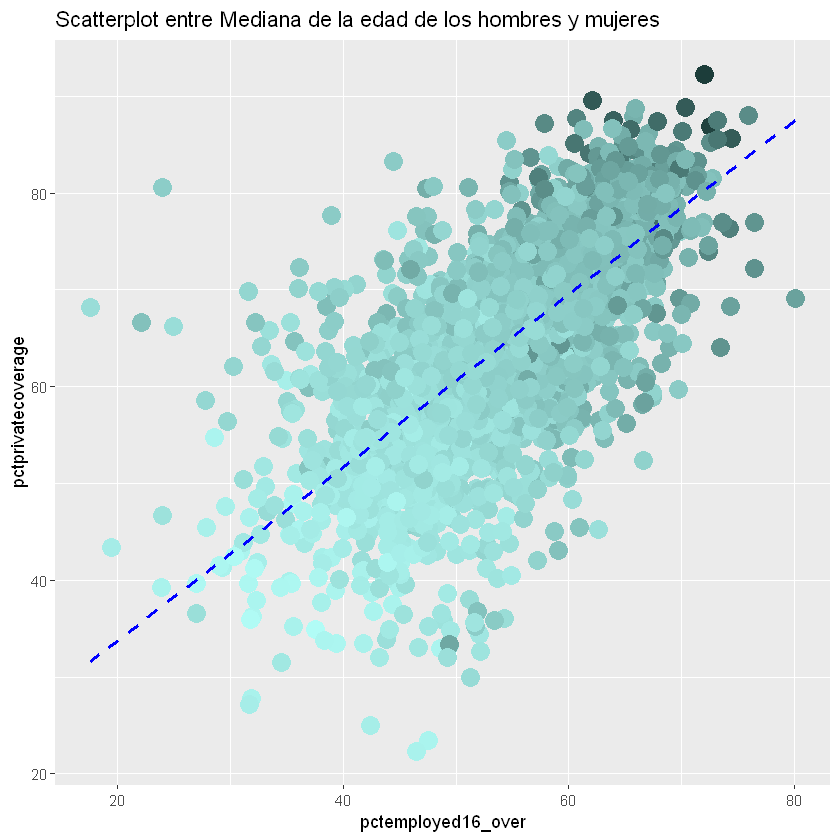

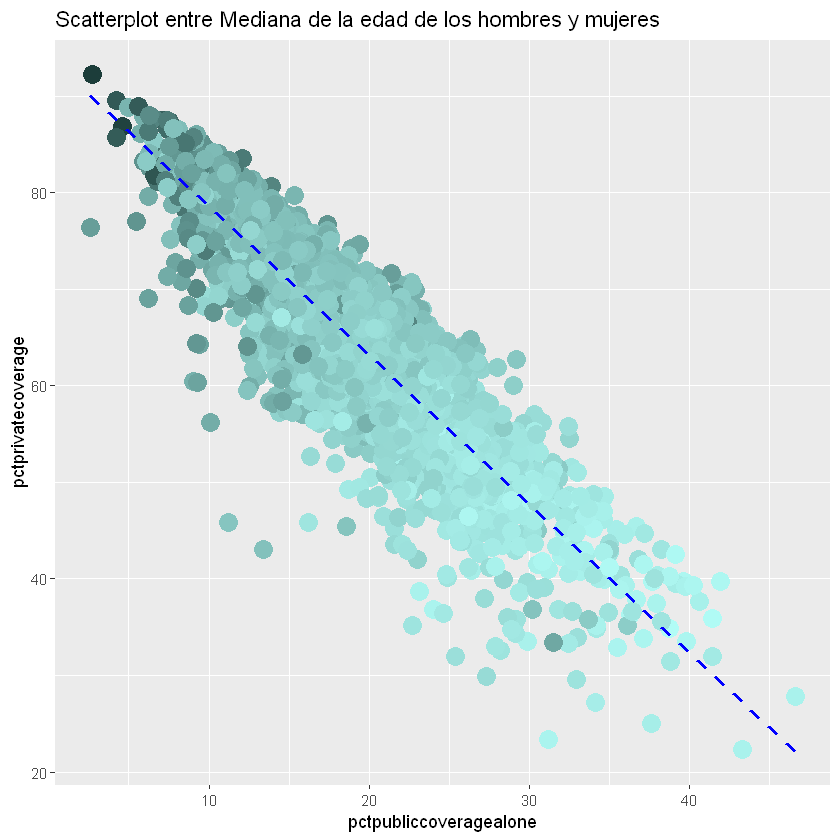

In [48]:
ggplot(data) +
  aes(x = pctemployed16_over
      ,y = pctprivatecoverage
      ,color = medincome) +
   geom_point(size = 5
             ,show.legend = FALSE) +
geom_smooth(method = "lm", se = FALSE, color = "blue", linetype = "dashed") +  # Añadimos la línea de tendencia
   scale_color_gradient(low = "#B1FCF6", high = "#1C3D3A") +
   labs(title = "Scatterplot entre Mediana de la edad de los hombres y mujeres" )

ggplot(data) +
  aes(x = pctpubliccoveragealone
      ,y = pctprivatecoverage
      ,color = medincome) +
   geom_point(size = 5
             ,show.legend = FALSE) +
geom_smooth(method = "lm", se = FALSE, color = "blue", linetype = "dashed") +  # Añadimos la línea de tendencia
   scale_color_gradient(low = "#B1FCF6", high = "#1C3D3A") +
   labs(title = "Scatterplot entre Mediana de la edad de los hombres y mujeres" )

####
Deberiamos armar una matriz de correlacion y covarianzas entre todas las variables para ver cual es el modelo de mayor parsimonia posible en base a sus relaciones entre si, tanto la variable dependiente con las independientes (correlacion), analisis entre variables independientes (covarianza).